<a href="https://colab.research.google.com/github/omanofx/entregable_1/blob/Proyecto_final_Omar_Fernandez/Proyecto_final_Omar_Fernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Alumno: Omar Fernández**

https://www.linkedin.com/in/omarfernandez/

Curso: Data Science

Comisión: 46275

Profesores: Francisco Azzollini / Daniel Galeano

Tutor: Luciano Lisachi

Fecha: Agosto 2023

---





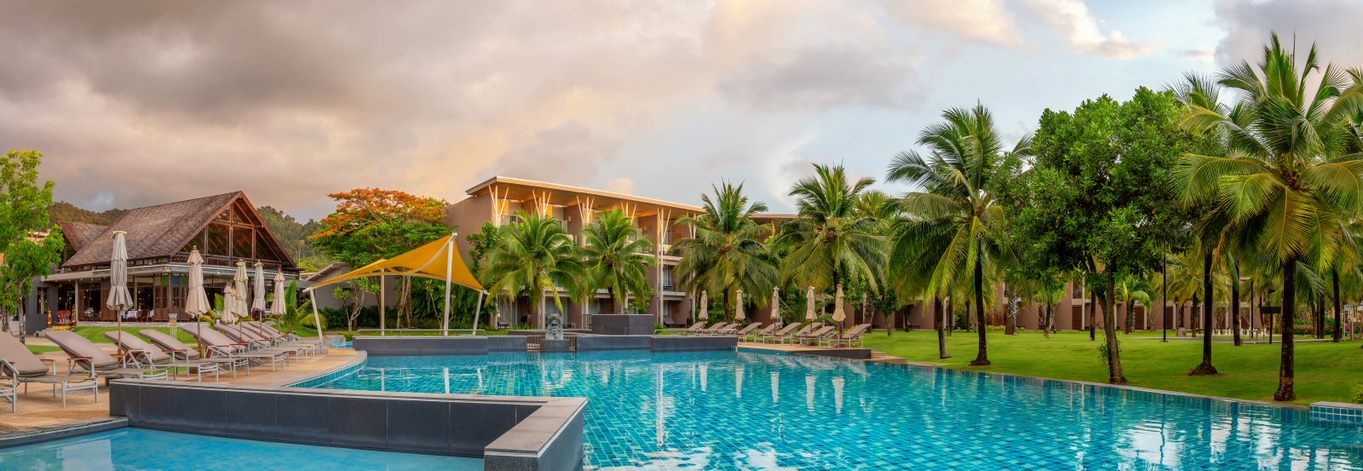

# **Proyecto final: Reservas de hoteles**


---





# Tabla de contenido

1.   Resumen ejecutivo
2.   Introducción
  1.   Objetivo del proyecto
  1.   Stakeholders
  1.   Alcance del proyecto
  1.   Suposiciones y limitaciones
  1.   Análisis a realizar
  1.   Solución
3.   Contexto análitico
  1.   Requisitos
  1.   El Data set
  1.   Estructura del data set
  1.   El ADR
  1.   Dimensiones de los datos
  1.   Librerías utilizadas
  1.   Configuración
  1.   Funciones propias
2.   Obtención de los datos (data acquisition)
  1.   Github
  1.   Datos externos (API)
  1.   Backup
2.   Depuración de datos (Data wrangling)
  1.   Data set principal (reservas)
  1.   Variable objetivo
  1.   Reducción de características
  1.   Valores duplicados
  1.   Valores NaN
  1.   Valores erroneos
  1.   Transformación de los tipos de datos
  1.   Etiquetado de variables categóricas
  2.   Ingeniería de atributos
  1.   Data set secundario (países)
1.   Análisis exploratorio de datos (EDA)
  1. Reservas confirmadas
  2. Reservas canceladas
  1. Tiempo de demora
  1. Distribución de adultos-mes de reserva
  1. Relación ADR-Mes/Año de arribo
  1. Noches de estadía y servicio de comida
2.   Selección de características
  1.   Matriz de correlación
  1.   Forward selection
  1.   Linear regression
  1.   Backward selection
  1.   Stepwise
2.   Entrenamiento de modelos
2.   Resultados finales del proyecto
2.   Conclusiones y recomendaciones finales
2.   Referencias
2.   Change log












# Resumen ejecutivo
---




Este documento presenta el tema seleccionado para el proyecto final del autor, Omar Fernández, junto con las hipótesis que se pretenden validar. El proyecto se enfoca en el análisis de reservas de hoteles, abarcando tanto resorts como hoteles de ciudad, realizadas a través de diversas plataformas de reserva electrónica durante el período comprendido entre el 1 de enero de 2015 y el 31 de agosto de 2017. Cada entrada en el conjunto de datos representa una reserva, incluyendo tanto las que se completaron como las que se cancelaron.

Los registros comprenden reservas efectuadas de múltiples maneras, incluyendo reservas directas, en línea y a través de agentes de viajes. Estos registros proporcionan información detallada sobre las condiciones de la habitación, el número de adultos, niños y bebés, el país de origen, la fecha de llegada y la duración de la reserva, entre otros datos. Además, se ofrece información sobre el depósito en caso de cancelación.

Para garantizar la calidad de los datos y eliminar información irrelevante, se lleva a cabo un proceso de limpieza de registros que implica la eliminación de columnas que contienen información innecesaria, como nombres de personas, números de teléfono y números de tarjetas de crédito que se utilizaron para las reservas. Este paso de limpieza permite enfocarse en los aspectos clave del análisis de las reservas de hoteles.

# Introducción

---




* **Contexto comercial**: A través del progreso en las nuevas tecnologías y las refinadas técnicas de análisis de datos, los competidores tienen la capacidad de lanzar campañas de marketing directo dirigidas a nuestros clientes. Esto conlleva el peligro de que las reservas realizadas sean canceladas de manera anticipada, aún en presencia de posibles penalizaciones económicas por dicha cancelación. Para nosotros, implica un doble perjuicio, la perdida de una reserva y a su vez, una habitación disponible sin ocupar, la cual tiene costos fijos de mantemiento.

* **Problema comercial**: ¿Existen patrones particulares en las reservas que puedan ser indicativos de una futura cancelación?

* **Contexto analítico**: Se logró obtener un data set con más de 119.000 registros de reservas/cancelaciones durante el período comprendido entre el 1 de enero de 2015 y el 31 de agosto de 2017, realizadas por más de 50.000 clientes únicos. Los datos estarán etiquetados, es decir, hay una variable que nos indica cuáles reservas fueron canceladas o no. Utilizaremos modelos de agrupamiento para abordar este problema con aprendizaje supervisado.

## Objetivo del proyecto

Lograr predecir cuales reservas se cancelarán y cuales no, para así lograr optimizar la disponibilidad de las habitaciones en los distintos tipos de hoteles analizados, de este modo, las gerencias correspondientes podrán realizar campañas comerciales de acción directa, generar propuestas de mejora y proyectar a futuro mejores ingresos economicos para la compañia.

Esta visión clara sobre qué reservas se cancelarán mejora significativamente la precisión en las proyecciones de ocupación. Además, permite tomar decisiones de negocio respaldadas por datos internos de la organización, en lugar de depender de intuiciones o estadísticas globales generales. Al poner a la venta habitaciones con alta probabilidad de cancelación, se logra maximizar los ingresos de la compañía.

Es relevante destacar que los riesgos se gestionan eficazmente al aprovechar la confiabilidad matemática de estas previsiones para enfocarse en las reservas con mayor probabilidad de cancelación.

## Stakeholders


Este proyecto está dirigido principalmente a las empresas del sector turístico, específicamente aquellas involucradas en la gestión hotelera, agencias de viajes, plataformas de reserva de hoteles y cámaras que representan la industria.

## Alcance del proyecto


Para asegurar el éxito del proyecto y completar los análisis previstos junto con el entrenamiento del modelo de aprendizaje automático, se planea utilizar un conjunto de datos que contenga reservas de hoteles recopiladas durante un período de tiempo específico, sin información sobre la ubicación de los hoteles. Para enriquecer estos datos, se integrarán datos adicionales utilizando una API (application programming interface) de la empresa Amadeus. Esta API nos proporcionará información adicional que ayudará a mejorar los análisis delineados en este documento.

## Suposiciones y limitaciones

* No se dispone de información sobre la ubicación geográfica de los hoteles ni sobre su cantidad en el conjunto de datos.
* Se presume que los montos expresados en la columna 'ADR' están en dólares estadounidenses y no se consideran devoluciones en ningún caso.

## Análisis a realizar (insights)

Como parte de este proyecto de data science, se realizarán una serie de pruebas y análisis con el fin de poder conocer más en profundidad como se comportan los pasajeros en cuanto a las reservas que realizan.
A continuación se enumeran los puntos de interés que se desean analizar del conjunto de datos:


  1. Establecer el país con el mayor número de reservas confirmadas y generar un ranking de los 10 principales países de origen de las reservas confirmadas.
  1. Investigar la relación entre el promedio mensual de cancelaciones y el mes de reserva.
  1. Analizar la relación entre el tiempo de espera y la cantidad de reservas confirmadas.
  1. Determinar la distribución de la cantidad total de adultos por mes de reserva.
  1. Explorar la relación entre las tarifas promedio y el mes y año de llegada al hotel.
  1. Identificar el tipo de servicio de comida contratado y las noches de estadía por tipo de hotel.
  1. Analizar la composición de las reservas según el tipo de hotel y los pasajeros que las integran.


## Solución

Los algoritmos basados en Ciencia de Datos brindan una herramienta fundamental para la Analítica Predictiva. Gracias a esta tecnología, la empresa puede anticipar con precisión las cancelaciones y ajustar su oferta en el momento adecuado, evitando así cualquier riesgo de **Overbooking**.


Se plantea realizar el análisis de los mejores algoritmos de 'machine learning' para determinar y aplicar el que mejor se adapte a nuestra pregunta inicial.

La variable objetivo es un booleano, es decir, tiene solo dos posibles valores (verdadero/falso, sí/no, 0/1), esto se trata de un problema de **clasificación binaria**. Hay varios algoritmos de machine learning que son adecuados para este tipo de problema.


Estos son algunos de los modelos que se implementarán con el data set propuesto:


1. **Regresión Logística**: Este modelo es especialmente adecuado para problemas de clasificación binaria, donde la variable objetivo es un booleano. La regresión logística estima la probabilidad de que un ejemplo pertenezca a una clase particular (verdadero o falso) dadas las características de entrada.
2. **Support Vector Machines (SVM)**: Las SVM son otro modelo popular para la clasificación binaria. Buscan encontrar el hiperplano que mejor separa las clases en el espacio de características, maximizando el margen entre las clases.
3. **Árboles de Decisión**: Los árboles de decisión son modelos versátiles que pueden manejar tanto problemas de clasificación como de regresión. Para la clasificación binaria, un árbol de decisión divide el espacio de características en regiones que corresponden a diferentes clases.
4. **Random Forests**: Este es un ensemble de árboles de decisión donde múltiples árboles se entrenan en diferentes subconjuntos de datos y características. Luego, las predicciones de todos los árboles se promedian para producir una predicción final.
5. **Gradient Boosting Machines (GBM)**: Similar a Random Forests, GBM es otro método de ensemble que combina múltiples modelos de aprendizaje débiles para formar un modelo más fuerte. A menudo, se utiliza el algoritmo de boosting para mejorar gradualmente el rendimiento del modelo.
6. **Redes Neuronales Artificiales (ANN)**: Las redes neuronales son modelos muy potentes que pueden manejar una variedad de problemas, incluidos los de clasificación binaria. Con suficientes datos y capacidad de computación, las redes neuronales pueden aprender patrones complejos en los datos.

La elección del modelo dependerá de varios factores, como la cantidad y la calidad de los datos, la complejidad del problema, el tiempo de entrenamiento y las restricciones computacionales.

Para probar varios modelos y evaluar su rendimiento, se utilizan técnicas como la validación cruzada y las curvas de aprendizaje para seleccionar el modelo más adecuado a la problematica dada.

# **Contexto analítico**


---



### Requisitos

Este proyecto de data science fue desarrollado utilizando el lenguaje de programación Python. El mismo se ejecuta en Google Colab (es la implementación de Jupyter Notebook de Google) con el backend de Google Compute Engine en Python 3.

Las principales bibliotecas utilizadas son: pandas, numpy, skikit-learn, matplotlib, seaborn, plotly, squarify, statsmodels, xgboost, mlxtend y requests .

### El Data set

Los datos provienen originalmente del artículo "Conjuntos de datos de demanda de reservas de hoteles, escrito por Nuno Antonio, Ana Almeida y Luis Nunes para Data in Brief, volumen 22, febrero de 2019".

Origen de los datos: https://www.kaggle.com/datasets/mojtaba142/hotel-booking (25.11 MB)

### Estructura del data set

A continuación se muestra una breve descripción de cada columna:

1.   **hotel**: (object) tipo de hotel de la reserva.
2.   **is_canceled**: (int64) 0 o 1 si la reserva fue una cancelación.
3.   **lead_time**: (int64) número de días que transcurrieron entre la fecha de entrada de la reserva en el sistema y la fecha de llegada al hotel.
4.   **arrival_date_year**: (int64) año de arribo al hotel.
5.   **arrival_date_month**: (object) mes de arribo al hotel.
6.   **arrival_date_week_number**: (int64) número de semana de arribo al hotel.
7.   **arrival_date_day_of_month**: (int64) día del mes en arribar al hotel.
8.   **stays_in_weekend_nights**: (int64) noches en fin de semana.
9.   **stays_in_week_nights**: (int64) noches en semana.
10.  **adults**: (int64) total de adultos que componen la reserva.
11.  **children**: (float64) total de menores que componen la reserva.
12.  **babies**: (int64) total de bebes que componen la reserva.
13.  **meal**: (object) tipo de servicio de comida contratado.
14.  **country**: (object) país de origen de la reserva.
15.  **market_segment**: (object) segmento de mercado al que pertenece la reserva.
16.  **distribution_channel**: (object) canal de distribución por donde se efectuó la reserva.
17.  **is_repeated_guest**: (int64) indica si la reserva era de un huésped repetido (1) o no (0).
18.  **previous_cancellations**: (int64) número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual.
19.  **previous_bookings_not_canceled**: (int64) reservas previas no canceladas por el cliente.
20.  **reserved_room_type**: (object) tipo de habitación solicitada.
21.  **assigned_room_type**: (object) tipo de habitación asignada.
22.  **booking_changes**: (int64) número de cambios/modificaciones realizadas en la reserva desde el momento en que se introdujo la reserva en el sistema.
23.  **deposit_type**: (object) tipo de depósito.
24.  **agent**: (float64) agencia que realizó la reserva.
25.  **company**: (float64) compañía que contrato la reserva.
26.  **days_in_waiting_list**: (int64) número de días que la reserva estuvo en lista de espera antes de ser confirmada al cliente.
27.  **customer_type**: (object) tipo de cliente.
28.  **adr**: (float64) tarifa diaria promedio definida dividiendo la suma de todas las transacciones de alojamiento por el número total de noches de estadía.
29.  **required_car_parking_spaces**: (int64) cantidad de espacios de estacionamiento requeridos.
30.  **total_of_special_requests**: (int64) número de solicitudes especiales realizadas por el cliente (por ejemplo, cama doble o piso alto)
31.  **reservation_status**: (object) estado de la reserva.
32.  **reservation_status_date**: (object) fecha del último cambio en la reserva.
33.  **name**: (object) nombre de la persona que realizó la reserva.
34.  **email**: (object) email de la persona que realizó la reserva.
35.  **phone-number**: (object) teléfono de la persona que realizó la reserva.
36.  **credit_card**: (object) tarjeta de crédito de la persona que realizó la reserva.

**Nota**: Los valores expresados en la característica 'ADR' se presuponen que son dólares americanos, siendo esta la moneda comúnmente utilizada para turismo internacional.


### El ADR

Los propietarios u operadores de hoteles utilizan el término "Tarifa Promedio Diaria" o ADR en inglés (Average Daily Rate) que representa el precio promedio por el cual se vende una habitación de hotel por día.

La formula:

> ADR = Ingresos Totales de las Habitaciones / Número de Habitaciones Vendidas


Aspectos clave:

* La tarifa promedio diaria (ADR) es el precio promedio por el que se vende una habitación de hotel por día.
* El ADR es una métrica crucial en la industria hotelera, ya que impacta directamente en los ingresos y la rentabilidad de un hotel.
* Un ADR alto indica que un hotel está cobrando precios más altos por sus habitaciones, mientras que un ADR bajo puede indicar la necesidad de ajustes de precios o estrategias de gestión de ingresos.

Los factores que influyen en el ADR son:

* Internos
  * Estacionalidad
  * Tipo de habitación y servicios asociados
  * Disponibilidad

* Externos
  * Competencia
  * Ubicación
  * Condiciones ecónomicas

Según nuestra investigación, se puede tomar como referencia, las siguientes escalas de valores por tipo de hotel:

* El ADR promedio para un hotel de lujo ronda los €250 a €300 por noche.
* El ADR promedio para los hoteles económicos varía de €40 a €60 por noche, con habitaciones y servicios sencillos.
* El ADR promedio para los hoteles de gama media oscila entre €70 y €120 por noche. Estos hoteles se dirigen a viajeros que buscan una estancia cómoda y conveniente sin gastar una fortuna.
* Hoteles boutique, a menudo fijan sus tarifas de habitación más altas que los hoteles de gama media, con un ADR promedio que varía de €100 a €200 por noche.

### Dimensiones de los datos

Posibles valores.

**Nota**: TA significa "agente de viajes" y TO "operador de turismo"

* **hotel**:
  * 'hotel resort'
  * 'city hotel'
  
* **is_canceled**:
  * 0 (no es cancelación)
  * 1 (es cancelación)

* **deposit_type**:
  *   No Deposit (sin depósito)
  *   Non Refund (No Reembolsable)
  *   Refundable (reembolsable)
  

* **reservation_status**:

  * Check-Out (verificado)
  * Canceled (cancelado)
  * No-Show (no mostrar)


* **customer_type**:
  * Transient (transitorio)
  * Contract (contrato)
  * Transient-Party (fiesta transitoria)
  * Group (grupo)

* **meal**:
  * BB (Cama y desayuno)
  * FB (Pensión completa)
  * HB (Media pensión)
  * SC (Sin servicio de comidas)
  * Undefined (Indefinido)

* **market_segment**:
  * Direct (directo)
  * Corporate (corporativo)
  * TA/TO (TA/TO)
  * Undefined (indefinido)
  * GDS (GDS)

* **market_segment**:
  * Direct (directo)
  * Corporate (corporativo)
  * Online TA (TA on-line)
  * Offline TA/TO (TA/TO fuera de línea)
  * Complementary (complementario)
  * Groups (grupos)
  * Aviation (aviación)
  * Undefined (indefinido)

* **reserved_room_type | assigned_room_type**:
  * A: Suite Presidencial
  * B: Suite
  * C: Habitación de Lujo
  * D: Habitación Superior
  * E: Habitación Estándar
  * F: Habitación Económica
  * G: Habitación Individual
  * H: Habitación Doble
  * I: Habitación Triple
  * J: Habitación Cuádruple
  * K: Habitación Estándar cama doble y cocina.
  * L: Habitación Estándar cama doble y baño adaptado para personas con discapacidad.

### Librerías utilizadas


Instalación de librerías requeridas para ejecutar el notebook.

In [1]:
!pip install squarify

Agrupa todas las libererías utilizadas durante el análisis y procesamiento del data set.

In [2]:
# Visualización de datos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify

# Manipulación y análisis de datos
import numpy as np
import pandas as pd

# Otros
import datetime
import pytz
import requests
import gc
import warnings

from datetime import datetime, timedelta
from requests.exceptions import HTTPError

# Configuración adicional
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
# Machine learning y estadísticas
import statsmodels.api as sm
import xgboost as xgb

from xgboost.sklearn import XGBClassifier
from mlxtend.plotting import plot_decision_regions
from imblearn.over_sampling import SMOTE

from sklearn import neighbors, metrics
# sklearn.neighbors contiene implementaciones de algoritmos de vecinos más cercanos (k-NN).
# sklearn.metrics proporciona diversas métricas para evaluar modelos de aprendizaje automático.

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier
# sklearn.ensemble contiene implementaciones de algoritmos de ensamble,
# como RandomForestClassifier y RandomForestRegressor, que utilizan múltiples modelos base para mejorar la predicción.
# GradientBoostingClassifier implementa el algoritmo de aumento de gradiente.

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest
# sklearn.feature_selection proporciona herramientas para la selección de características,
# y SelectKBest es una técnica que selecciona las mejores características basándose en estadísticas univariadas.

from sklearn.impute import SimpleImputer
# sklearn.impute ofrece herramientas para el manejo de valores perdidos (imputación) en los datos,
# y SimpleImputer es una clase que se utiliza para rellenar valores faltantes de manera simple.

from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
# sklearn.linear_model contiene implementaciones de modelos lineales,
# como LogisticRegression para clasificación y LinearRegression para regresión lineal.
# SGDClassifier es el clasificador de descenso de gradiente estocástico.

from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
# sklearn.metrics proporciona varias métricas para evaluar el rendimiento de los modelos,
# como accuracy_score para clasificación, confusion_matrix para matrices de confusión,
# classification_report para informes detallados, mean_squared_error para regresión y r2_score para la bondad de ajuste.

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
# sklearn.model_selection ofrece herramientas para la selección y evaluación de modelos,
# como train_test_split para dividir conjuntos de datos, KFold para validación cruzada,
# cross_val_score para puntuaciones de validación cruzada y GridSearchCV para búsqueda de hiperparámetros.

from sklearn.naive_bayes import MultinomialNB, GaussianNB
# sklearn.naive_bayes contiene implementaciones de clasificadores ingenuos de Bayes,
# como MultinomialNB para datos discretos y GaussianNB para datos continuos.

from sklearn.neighbors import KNeighborsClassifier
# sklearn.neighbors contiene implementaciones del clasificador de vecinos más cercanos (k-NN).

from sklearn.neural_network import MLPClassifier
# sklearn.neural_network contiene implementaciones de redes neuronales, y MLPClassifier es
# un clasificador basado en perceptrones multicapa (MLP).

from sklearn.preprocessing import LabelEncoder, StandardScaler
# sklearn.preprocessing proporciona herramientas para el preprocesamiento de datos,
# como LabelEncoder para codificación de etiquetas y StandardScaler para estandarización de características.

from sklearn.tree import DecisionTreeClassifier
# sklearn.tree contiene implementaciones de árboles de decisión, y DecisionTreeClassifier es
# un clasificador basado en árboles de decisión.

from sklearn.svm import SVC
# sklearn.svm contiene implementaciones de máquinas de soporte vectorial (SVM),
# y SVC (Support Vector Classification) es una implementación para problemas de clasificación con SVM.

### Configuración

Configuraciones que se utilizan durante el proyecto en forma general para evitar redundancia de código.

In [4]:
# Visualizaciones
# Estilo principal para todas las visualizaciónes en gráficos.
mpl.style.use('Solarize_Light2')
color_barra_city = '#2d557f'
color_barra_resort = '#7ea2c7'

# Define el esquema de colores para gráficos binarios
colores_no_si = { 'No': 'green', 'Si': 'red'}

# Valor por defecto para las visualizaciones de gráficos
figsize_default=(9, 5)

# Configuración genérica para los gráficos
configuracion_graficos = {
    'figure.figsize': (9, 5),   # Tamaño de la figura (ancho, alto)
    'axes.titlesize': 12,       # Tamaño de la fuente del título
    'axes.labelsize': 11,       # Tamaño de la fuente de las etiquetas de los ejes
    'xtick.labelsize': 10,      # Tamaño de la fuente de las etiquetas del eje x
    'ytick.labelsize': 10,      # Tamaño de la fuente de las etiquetas del eje y
    'legend.fontsize': 10,      # Tamaño de la fuente de la leyenda
    'lines.linewidth': 2,       # Grosor de las líneas
    'grid.linestyle': '--',     # Estilo de las líneas de la cuadrícula
    'grid.alpha': 0.5,          # Transparencia de la cuadrícula
    'axes.labelweight': 'bold',
}

# Aplicar la configuración de los gráficos
plt.rcParams.update(configuracion_graficos)

In [5]:
# Utiliza esta configuración sirve cuando se quiere utilizar la API para obtener los datos actualizados
# 0, carga un archivo .cvs previamente generado para agilizar el procesamiento.
# 1, consume la API
utilizar_api = 0

# Configura la zona horaria local
time_zone = pytz.timezone('America/Argentina/Buenos_Aires')
formato_fecha_hora = '%Y-%m-%d %H:%M:%S'

# Para el entrenamiento de todos los modelos, utilizamos un valor por defecto de semilla.
my_random_state = 42

# Diccionario tipo de hotel
tipo_hotel = {
    'Resort hotel',
    'City hotel'
}

# Diccionario para establecer el orden de los meses
orden_meses = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Diccionario con los tipos de habitaciones
room_type = {
  'A': 'Suite Presidencial',
  'B': 'Suite',
  'C': 'De Lujo',
  'D': 'Superior',
  'E': 'Estándar',
  'F': 'Económica',
  'G': 'Individual',
  'H': 'Doble',
  'I': 'Triple',
  'J': 'Cuádruple',
  'K': 'Estándar cama doble',
  'L': 'Estándar baño disc.'
}

# Diccionario con los tipo de servicio de comida
foodservice_type = {
  'BB': 'Cama y desayuno',
  'FB': 'Pensión completa',
  'HB': 'Media pensión',
  'SC': 'Sin servicio de comidas',
  'Undefined': 'Indefinido'
}

## Funciones propias

Aquí se encuentran detalladas las funciones que se programaron para gestionar tareas especificas y reducir la cantidad de código requerido.

* **fecha_hora_local**: se invoca para obtener y formatear la fecha y hora actual de la Republica Argentina.
* **obtener_coordenadas**: al invocarse, se obtienen los principales datos de los países, según el listado que se pase como parametro de entrada.
* **analizar_dataframe**: esta función sirve para tener un analisis estandarizado de los dataframe que se utilizan en el proyecto.  Evita reiteración de código. Muestra tipo de dato, total de valores No nulos, porcentaje de nulos y si se recomienda borrar la característica según el porcentaje de tolerancia indicado como parametro de entrada.
* **principales_datos_dataframe**: se utiliza para conocer los pricipales datos del dataframe principal. Se obtienen totales y promedios que son utilizados durante el DW y el EDA, a fin de comprar dichos resultados.
* **grabar_csv**: permite grabar un dataframe en un archivo con extensión .csv
* **graficar_matriz_confusion**: realiza el grafico de una matriz de confución a partir de un dataframe de entrada.
* **calcular_matriz_correlacion**: calcula y grafica la matriz de correlación de un DataFrame utilizando alguno de los tres metodos permitidos (Pearson, Spearman o Kendall).
* **graficar_scatter_plot**: realiza un grafica scatter plot con dos columnas como parametros de entrada.
* **entrenar_y_evaluar_modelo_svm**:  realiza el entrenamiento y evaluación utilizando SVM y devuelve el porcentaje de aciertos con el conjunto de prueba.
* **tiene_espacios_en_blanco**: se utiliza desde la función 'analizar_dataframe' para complementar el análisis del dataframe indicando si la característica tiene espacios en blanco en el nombre.
* **entrenar_y_evaluar_modelo**: función general para entrenamiento de modelos.
* **calcular_precision_modelo**:
* **cross_validation_random_forest**: realiza validación cruzada con random forest classifier y devuelve las puntuaciones de validación cruzada y la precisión en el conjunto de prueba.

In [6]:
def fecha_hora_local(local_timezone: pytz.timezone = pytz.timezone('America/Argentina/Buenos_Aires')):
    '''
    Esta función muestra la fecha y hora local cada vez que es invocada.
    :param local_timezone: La zona horaria local deseada (por defecto, 'America/Argentina/Buenos_Aires').
    :return: La fecha y hora local en el formato especificado.
    '''
    try:
        # Obtiene la hora local actual en UTC
        utc_now = datetime.utcnow()

        # Convierte la hora actual a la hora local
        local_time = utc_now.replace(tzinfo=pytz.utc).astimezone(local_timezone)

        # Formato de salida para la fecha y hora local
        formato_fecha_hora = "%Y-%m-%d %H:%M:%S"

        # Retorna la fecha y hora local formateada
        return local_time.strftime(formato_fecha_hora)

    except Exception as e:
        # En caso de error, imprime el error y retorna None
        print("Error al obtener la fecha y hora local:", str(e))
        return None

In [7]:
def obtener_coordenadas(paises_iso: pd.DataFrame):
    '''
    ## Desde esta función obtenemos datos de los países via una API de restcountries.com
    ### Descripción de los campos en https://gitlab.com/restcountries/restcountries/-/blob/master/FIELDS.md
    '''
    df_coordenadas = pd.DataFrame(columns=['country', 'name', 'region', 'lat', 'lon'])

    for pais_iso in paises_iso:
        # Intentar obtener la ubicación, manejar excepciones y reintentar
        for intento in range(3):
            try:
                # Obtenemos los datos del país
                data = requests.get(
                    "https://restcountries.com/v3.1/alpha/{iso}".format(iso=pais_iso)
                ).json()

                # Extraer la lista de hoteles de la respuesta
                datos_pais = data

                # Crear una lista de diccionarios con las columnas específicas
                data_list = []
                for datos in datos_pais:
                    data_list.append({
                        'nombre': datos.get('name', {}).get('common', ''),
                        'region': datos.get('region', ''),
                        'latitud': datos.get('latlng', [0, 0])[0],
                        'longitud': datos.get('latlng', [0, 0])[1]
                    })

                if datos_pais:
                    # Obtener las coordenadas del primer hotel (si existen)
                    latitud = data_list[0].get('latitud', 0)
                    longitud = data_list[0].get('longitud', 0)
                    nombre = data_list[0].get('nombre', 0)
                    region = data_list[0].get('region', 0)
                    #seguir sumando datos, de ser necesarios

                    df_coordenadas = pd.concat([df_coordenadas, pd.DataFrame({'country': [pais_iso],
                                                                              'name': [nombre],
                                                                              'region': [region] ,
                                                                              'lat': [latitud],
                                                                              'lon': [longitud]})],
                                               ignore_index=True)
                else:
                    print(f"No se encontró la ubicación para {pais_iso}")
            except requests.RequestException as e:
                print(f"Error en la solicitud para {pais_iso}: {e}")
                continue
            except Exception as e:
                print(f"Error desconocido para {pais_iso}: {e}")
                break
            else:
                break

    return df_coordenadas

In [8]:
def tiene_espacios_en_blanco(columna: str) -> bool:
    '''
    Verifica si una columna contiene espacios en blanco.
    :param columna: La columna a ser verificada (str).
    :return: True si la columna contiene al menos un espacio en blanco, False de lo contrario.
    '''
    try:
        # Utiliza una expresión generadora y la función any para verificar si
        # alguno de los caracteres es un espacio en blanco
        return any(caracter.isspace() for caracter in columna)

    except Exception as e:
        # En caso de error, imprime el error y retorna False
        print("Error al verificar espacios en blanco en la columna:", str(e))
        return False

In [9]:
def analizar_dataframe(df1: pd.DataFrame, porcentaje_tolerancia: float):
    '''
    ## Esta función se utiliza para comprobar la consistencia de los datos de un DataFrame
    ### evita invocar a .info(), .isnull()
    #### Porcentaje de tolerancia: valor porcentual que se tolera para los valores nulos de
    #### cada caracteristica del DataFrame. Si el valor se encuentra por sobre la tolerancia,
    #### se indica como 'BORRAR' la caracteristica.
    #### Version 2.0
    '''
    # Validar que porcentaje_tolerancia esté entre 0 y 100
    if not (0 <= porcentaje_tolerancia <= 100):
        print("Error: El porcentaje de tolerancia debe estar entre 0 y 100.")
        return

    porcentaje_perdidos = df1.isnull().sum() * 100 / len(df1)
    total_nulos = df1.isnull().sum()
    tipo_dato = df1.dtypes
    valores_no_nulos_por_columna = df1.count()
    descripcion = df1.describe().transpose()
    es_categorica = [True if tipo == 'object' else False for tipo in tipo_dato]
    total_ceros_por_columna = [(columna, (df1[columna] == 0).sum()) for columna in df1.columns]

    resultado_analisis = pd.DataFrame({
        'Tipo de dato': tipo_dato,
        'Total No Nulos': valores_no_nulos_por_columna,
        'Total Nulos': total_nulos,
        '% Nulos': round(porcentaje_perdidos, 2),
        'Borrar?': np.where(porcentaje_perdidos > porcentaje_tolerancia, 'BORRAR', ''),
        'Total Ceros': [total for columna, total in total_ceros_por_columna],
        'Columna con Espacios': df1.columns.to_series().apply(lambda x: tiene_espacios_en_blanco(x))
    })

    # Agregar las columnas de la descripción al resultado_analisis
    resultado_analisis = pd.concat([resultado_analisis, round(descripcion, 2)], axis=1)

    estilo_resultado = (
        resultado_analisis.style
        .applymap(lambda x: 'background-color: green' if x == 'object' else '',
                  subset=['Tipo de dato'])
        .applymap(lambda x: 'background-color: red' if x > porcentaje_tolerancia else '',
                  subset=pd.IndexSlice[resultado_analisis[resultado_analisis['% Nulos'] > porcentaje_tolerancia].index, '% Nulos'])
        .background_gradient(cmap='Reds', subset=['% Nulos'])
        .applymap(lambda x: 'background-color: red' if x else '',
                  subset=pd.IndexSlice[resultado_analisis[resultado_analisis['Columna con Espacios']].index, 'Columna con Espacios'])
        .background_gradient(cmap='Reds', subset=['Columna con Espacios'])
    )

    return estilo_resultado

In [10]:
def principales_datos_dataset():
  '''
  ## Esta función muestra los principales datos del DataFrame principal
  '''

  total_rows, total_cols = df_reservas.shape

  total_adultos = int(df_reservas['adults'].sum())
  total_bebes = int(df_reservas['babies'].sum())
  total_menores = int(df_reservas['children'].sum())

  count_confirmadas = int(df_reservas[df_reservas['is_canceled'] == 0]['is_canceled'].value_counts())
  count_canceladas = int(df_reservas[df_reservas['is_canceled'] == 1]['is_canceled'].value_counts())
  count_resort = int(df_reservas[df_reservas['hotel'] == 'Resort Hotel']['hotel'].value_counts())
  count_city_hotel = int(total_rows - count_resort)

  promedio_pasajeros = (total_adultos + total_bebes + total_menores) / total_rows
  promedio_adr = df_reservas['adr'].mean()

  print('El dataframe contiene un total de', total_cols, 'características y', total_rows, 'observaciones.''\n')
  print('Los principales datos de interés son:''\n')

  print(f"Total de reservas confirmadas: {count_confirmadas}")
  print(f"Total de reservas canceladas: {count_canceladas}"'\n')

  print(f"Total observaciones del tipo hotel resort: {count_resort}")
  print(f"Total observaciones del tipo hotel de ciudad: {count_city_hotel}"'\n')

  print('Distribución poblacional:''\n')
  print('Total adultos:', total_adultos)
  print('Total bebes:', total_bebes)
  print('Total menores:', total_menores)

  print('\n''El promedio de pasajeros por observación es:', round(promedio_pasajeros, 2))
  print('El valor promedio de ADR por observación es:', round(promedio_adr,2))

In [11]:
def grabar_csv(nombre_archivo: str, df: pd.DataFrame):
    '''
    Almacena físicamente los datos obtenidos en un archivo CSV.
    :param nombre_archivo: El nombre base del archivo CSV.
    :param df: El DataFrame que se desea guardar en el archivo CSV.
    '''
    try:
        # Obtiene la fecha y hora actual para agregarla al nombre del archivo
        fecha_y_hora_actual = fecha_hora_local(time_zone)

        # Especifica la ruta y el nombre del archivo CSV
        ruta_archivo_csv = f"{nombre_archivo}_{fecha_y_hora_actual}.csv"

        # Guarda el DataFrame en un archivo CSV sin incluir el índice
        df.to_csv(ruta_archivo_csv, index=False)

        # Imprime la fecha y hora de guardado y la ruta del archivo
        print("Fecha y hora:", fecha_y_hora_actual)
        print(f"Los datos se han guardado en el archivo CSV: {ruta_archivo_csv}")

    except Exception as error:
        # Maneja cualquier error que pueda ocurrir durante el proceso de guardado
        print(f"Ocurrió un error al guardar los datos en el archivo CSV: {error}")

In [12]:
def graficar_matriz_confusion(y_test, pred_y, style: str = 'Blues', labels=None):
    '''
    Grafica la matriz de confusión utilizando la librería Seaborn.

    :param y_test: Valores reales.
    :param pred_y: Valores predichos.
    :param style: Estilo de la paleta de colores para la visualización de la matriz de confusión (por defecto, 'Blues').
    :param labels: Etiquetas para los ejes x e y de la matriz de confusión (opcional).
    '''
    try:
        # Calcula la matriz de confusión
        conf_matrix = confusion_matrix(y_test, pred_y)

        # Crea el gráfico de la matriz de confusión utilizando Seaborn
        ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=style)

        # Añade título y etiquetas a los ejes
        ax.set_title('Matriz de confusión con etiquetas\n\n')
        ax.set_xlabel('Valores predichos')
        ax.set_ylabel('Valores reales')

        # Si se proporcionan etiquetas personalizadas, las establece en los ejes
        if labels is not None:
            ax.xaxis.set_ticklabels(labels)
            ax.yaxis.set_ticklabels(labels)

        # Muestra el gráfico de la matriz de confusión
        plt.show()

        # Muestra el reporte de clasificación
        print('\n')
        print(classification_report(y_test, pred_y))

    except Exception as error:
        # Maneja cualquier excepción que ocurra durante el proceso
        print(f"Ocurrió un error: {error}")

In [13]:
def calcular_matriz_correlacion(df_matriz: pd.DataFrame,  metodo: str={'pearson','kendall','spearman'}, tamano_grafico=(20, 20)):
    '''
    ## Calcula y grafica la matriz de correlación utilizando alguno de los tres métodos: Pearson, Kendall o Spearman.

    Args:
        metodo (str): Método de correlación a utilizar. Puede ser 'pearson', 'kendall' o 'spearman'.
    '''
    df = df_matriz

    # Calcula la matriz de correlación según el método proporcionado
    if metodo == 'pearson':
        df = df.corr(method='pearson')
    elif metodo == 'kendall':
        df = df.corr(method='kendall')
    elif metodo == 'spearman':
        df = df.corr(method='spearman')

    # Grafica la matriz de correlación
    f, ax = plt.subplots(figsize=(tamano_grafico))
    sns.heatmap(df, annot=True)
    ax.set_title(f"Matriz de correlación con método {metodo}")

    plt.show()

In [14]:
def graficar_scatter_plot(df: pd.DataFrame, columna1: str, columna2: str, tamano_grafico=(10, 6)):
  '''
    ## Realiza un grafica scatter plot con dos columnas como parametros de entrada.

    Args:
        pd (Dataframe): un dataframe que contenga los datos a graficar.
        columna1 (str): columna del dataframe.
        columna2 (str): columna del dataframa.
    '''

  if columna1 in df.columns and columna2 in df.columns:
      # Crea un gráfico de dispersión
      plt.figure(figsize=(tamano_grafico))
      plt.scatter(df[columna1], df[columna2], alpha=0.5)
      plt.title('Gráfico de Dispersión entre {} y {}'.format(columna1, columna2))
      plt.xlabel(columna1)
      plt.ylabel(columna2)
      plt.show()
  else:
      print("Al menos una de las columnas especificadas no existe en el DataFrame.")

In [15]:
def entrenar_y_evaluar_modelo(X, y, model, train_size=0.25, random_state=42):
    """
    ## Entrena un modelo, realiza predicciones y evalúa la exactitud y la puntuación de sobreajuste.

    Parameters:
    - X: Características del conjunto de datos.
    - y: Variable objetivo del conjunto de datos.
    - model: Modelo de machine learning.
    - train_size: Proporción del conjunto de entrenamiento (por defecto, 0.25).
    - random_state: Semilla aleatoria para reproducibilidad (por defecto, 42).

    Returns:
    - accuracy: Exactitud del modelo en el conjunto de prueba.
    - overfitting_score: Puntuación de sobreajuste.
    """
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size= train_size,
                                                        random_state= random_state)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    print("Exactitud: {:.2f}%".format(accuracy * 100))

    # Calculate the overfitting score
    overfitting_score = accuracy - model.score(X_train, y_train)

    print("Puntuación de sobreajuste:", round(overfitting_score, 4))

    return accuracy, overfitting_score

In [16]:
def calcular_precision_modelo(y_test, y_pred):
  '''
  ## Calcula la precisión del modelo
  '''
  accuracy_puntaje = accuracy_score(y_test, y_pred)

  print("Precisión del modelo: {:.4f}".format(accuracy_puntaje))

  if accuracy_puntaje > 0.9:
      print("El modelo tiene un alto rendimiento en la clasificación.")
  else:
      print("El modelo podría necesitar mejoras para lograr un rendimiento más alto.")

In [17]:
def outlier_euclideano(df: pd.DataFrame, cutoff=3):
    """
    Identifica outliers en un DataFrame utilizando la distancia euclidiana como métrica.

    Parámetros:
    - df (pd.DataFrame): DataFrame que contiene los datos a analizar.
    - cutoff (float): Umbral para identificar outliers. Los valores por encima de este umbral serán considerados outliers. Por defecto es 3.

    Devuelve:
    - pd.Series: Una serie booleana que indica si cada fila es un outlier (True) o no (False).
    """
    resultado = pd.Series([0] * len(df))
    data_mean = df.mean()  # Media de los datos

    dist = np.sqrt(np.sum(((df - data_mean) ** 2), axis=1))  # Distancia euclidiana
    dist_mean = dist.mean()  # Media de las distancias
    dist_zscore = np.abs((dist - dist_mean) / dist.std())  # Z-score para las distancias
    resultado[(dist_zscore > cutoff)] = 1

    return resultado

In [18]:
def scatterplot_outliers(data: pd.DataFrame, x_vars, y_var, outlier_var, palette, my_figsize):
    """
    Genera subtramas de dispersión para cada variable en x_vars en relación a y_var, coloreando los outliers según outlier_var.

    Parámetros:
    - data (pd.DataFrame): DataFrame que contiene los datos a visualizar.
    - x_vars (list): Lista de nombres de variables en el eje x.
    - y_var (str): Nombre de la variable en el eje y.
    - outlier_var (str): Nombre de la columna que indica si un punto es un outlier o no.
    - palette (dict or list): Paleta de colores para los outliers.
    - figsize: tamaño del gráfico

    Devuelve:
    - None: Visualiza las subtramas de dispersión.
    """
    num_plots = len(x_vars)
    rows = (num_plots + 2) // 3
    cols = min(num_plots, 3)

    plt.figure(figsize = my_figsize)
    #plt.figure(figsize=(5 * cols, 5 * rows))
    for i, var in enumerate(x_vars, start=1):
        plt.subplot(rows, cols, i)
        sns.scatterplot(x= var, y= y_var, data= data, hue= outlier_var, palette= palette)
    plt.tight_layout()
    plt.show()

In [19]:
def reemplazar_atipicos(data: pd.DataFrame, estrategia='moda', factor: float = 1.5):
    """
    Reemplaza los valores atípicos en un DataFrame utilizando diferentes estrategias.

    Parámetros:
    - data (pd.DataFrame): DataFrame que contiene los datos a procesar.
    - estrategia (str): Estrategia de reemplazo para los valores atípicos. Puede ser 'moda', 'promedio' o 'mediana'. Por defecto es 'moda'.
    - factor (float): Factor para determinar los límites de los valores atípicos utilizando el rango intercuartílico. Por defecto es 1.5.

    Devuelve:
    - None: Modifica el DataFrame original reemplazando los valores atípicos según la estrategia especificada.
    """
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - factor * iqr
    limite_superior = q3 + factor * iqr
    atipicos = (data < limite_inferior) | (data > limite_superior)

    if estrategia == 'moda':
        valor_reemplazo = data.mode()[0]
    elif estrategia == 'promedio':
        valor_reemplazo = data.mean()
    elif estrategia == 'mediana':
        valor_reemplazo = data.median()
    else:
        raise ValueError("Estrategia de datos no válida. Las opciones válidas son 'moda', 'promedio' y 'mediana'.")

    data[atipicos] = valor_reemplazo

In [20]:
def calcular_num_bins(data: pd.DataFrame):
    """
    Calcula el número óptimo de bins para un histograma utilizando la regla de Sturges.

    Parámetros:
    data (array-like): Los datos para los cuales se calcularán los bins.

    Retorna:
    int: El número óptimo de bins según la regla de Sturges.
    """
    num_data = len(data)
    num_bins = int(np.log2(num_data)) + 1
    return num_bins

In [21]:
def validar_rango_datos(df, column_name, min_value, max_value):
    """
    Función para verificar si hay valores fuera de un rango especificado en una columna de un DataFrame.

    Parámetros:
    - df: DataFrame de pandas.
    - column_name: Nombre de la columna que se va a verificar.
    - min_value: Valor mínimo permitido en la columna.
    - max_value: Valor máximo permitido en la columna.

    Retorna:
    - filtered_values: DataFrame que contiene las filas con valores fuera del rango especificado.
    """
    # Filtrar los valores que están fuera del rango especificado
    filtered_values = df[(df[column_name] < min_value) | (df[column_name] > max_value)]

    # Verificar si no hay errores
    if filtered_values.empty:
        print('Esta característica no presenta errores')
        return None
    else:
        print('Se detectaron errores:')
        return filtered_values

In [22]:
def calcular_porcentage(df: pd.DataFrame, column_name: str):
    """
    Calcula el porcentaje de cada valor único en una columna de un DataFrame.

    Parámetros:
    df (pandas.DataFrame): El DataFrame que contiene los datos.
    column_name (str): El nombre de la columna para la cual se calcularán los porcentajes.

    Retorna:
    pandas.Series: Una serie que contiene los porcentajes de cada valor único en la columna.
    """
    # Verificar si la columna existe en el DataFrame
    if column_name not in df.columns:
        print(f"La columna '{column_name}' no existe en el DataFrame.")
        return None

    # Obtener recuentos de valores únicos en la columna
    value_counts = df[column_name].value_counts()

    # Calcular los porcentajes
    percentages = (value_counts / len(df[column_name])) * 100

    # Asignar un nombre al índice para mayor claridad
    percentages = percentages.rename_axis(column_name)

    return percentages

In [23]:
def cross_validation_random_forest(X, y, n_estimators=100, cv=5):
    """
    Realiza validación cruzada con Random Forest Classifier.

    Parámetros:
    X : array-like o matriz de forma (n_samples, n_features)
        Las muestras de entrenamiento.
    y : array-like de forma (n_samples,)
        Las etiquetas de clase para cada muestra de entrenamiento.
    n_estimators : int, opcional (predeterminado=100)
        El número de árboles en el bosque.
    cv : int, cross-validation generator o iterador, opcional (predeterminado=5)
        Determina la estrategia de división de validación cruzada.
        Consulta la documentación de sklearn.model_selection.cross_val_score para más detalles.

    Devuelve:
    scores : array de forma (cv,)
        Precisión de la prueba para cada pliegue.
    """
    # Crear el clasificador Random Forest
    rf_classifier = RandomForestClassifier(n_estimators = n_estimators)

    # Realizar validación cruzada
    scores = cross_val_score(rf_classifier, X, y, cv = cv)

    # Imprimir los resultados
#    print("Precisión media:", round(scores.mean(), 4))
#    print("Precisión media:", np.round(scores.mean(), 4))

    # Imprimir los resultados
    rounded_scores = [round(score, 4) for score in scores]
    print("Precisión de la validación cruzada:", rounded_scores)
    print("Precisión media:", np.round(scores.mean(), 4))
    return scores


# **Obtención de los datos (Data Acquisition)**

---

## Github

* Obtiene el dataset desde Github.
* Se carga el dataset de reservas de hoteles en un DataFrame de Pandas para analizarlo y visualizarlo.
* El DataFrame '**df_reservas**' será el punto de partida para cada sección de este proyecto.

In [24]:
try:
    df_reservas_raw = pd.read_csv('https://raw.githubusercontent.com/omanofx/entregable_1/Proyecto_final_Omar_Fernandez/hotel_booking.csv', sep =",")
    print("El archivo CSV se ha cargado correctamente.")
except Exception as e:
    print("Ocurrió un error al cargar el archivo CSV:", e)


El archivo CSV se ha cargado correctamente.


## Datos externos (API)

Obtiene datos para complementar el dataset con:
* coordenadas geograficas de cada país.
* nombre común del país en ingles.
* región del país.




Obtiene los datos de coordenadas de los países, según la configuración inicial de la variable '**utilizar_api**'.

In [25]:
try:
    if utilizar_api:
        df_paises_coordenadas_raw = obtener_coordenadas(df_reservas_raw['country'].dropna().unique())
    else:
        df_paises_coordenadas_raw = pd.read_csv('https://raw.githubusercontent.com/omanofx/entregable_1/Proyecto_final_Omar_Fernandez/coordenadas_paises.csv')
    print("El archivo de coordenadas se ha cargado correctamente.")
except Exception as e:
    print("Ocurrió un error al cargar el archivo de coordenadas:", e)

print(fecha_hora_local(time_zone))

El archivo de coordenadas se ha cargado correctamente.
2024-03-14 10:29:26


## Backup

Realizamos una copia de resguardo de los datasets para comenzar a trabajar con ellos.



In [26]:
# DataFrames para trabajar
df_paises_coordenadas = df_paises_coordenadas_raw.copy()
df_reservas = df_reservas_raw.copy()

# Graba los datos obtenidos desde la API en un archivo CSV.
if utilizar_api == 1:
  grabar_csv('coordenadas_paises',df_paises_coordenadas_raw)

print(fecha_hora_local(time_zone))

2024-03-14 10:29:26


# **Depuración de datos (Data wrangling)**


---

Esta sección presenta las técnicas empleadas para llevar a cabo la limpieza y transformación de los datos, con el propósito de prepararlos para análisis subsiguientes.

Este proceso incluye:

* **Data Cleaning**: También se conoce como scrubbing (depuramiento), consiste en rellenar valores nulos, suavizamiento y remoción de datos con ruido y outliers con inconsistencias
* **Data Integration**: integración de datos con múltiples bases de  datos (relacional y no relacional), cubos de datos, etc. Los datos pueden ser estructurados, semi-estructurados y no estructurados.
* **Data Transformation**: Consiste en la normalización y agregación de acuerdo con las necesidades
* **Data reduction**: Se pueden reducir la cantidad de instancias y features (variables)
* **Data Discretization**: Se considera parte de Data reduction. Valores categóricos se pueden reemplazar por números con técnicas como One Hot Encoding o LabelEncoder.

Para evitar utilizar reiteradas veces las mismas instrucciónes que ayudan a comprender los datos de un DataFrame de Pandas, se desarrollo la función **analizar_dataframe**, la cual permite un detallado análisis de los mismos, permitiendo determinar si una característica debe ser eliminada según nuestro valor de tolerancia indicado como parametro de entrada.

### Data set principal (Reservas)

Analiza el contenido original del dataset y lo dispone en un dataframe de nombre '**df_reservas**'.

In [27]:
df_reservas.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


Notamos que el dataframe esta ordenado por el tipo de hotel (**hotel**). Lo desordenamos para que a futuro las pruebas esten menos condicionadas por esta característica.


In [28]:
# Desordenar el DataFrame y recontruye el indice
df_reservas = df_reservas.sample(frac=1).reset_index(drop=True)

Comenzamos con una tolerancia del 0% para los valores perdidos por característica con el fin de detectar el mínimo valor perdido. Esta función proporcionará una indicación sobre si se recomienda eliminar la característica afectada; sin embargo, esta recomendación es puramente informativa. Además, utilizaremos un esquema de color rojo degradado para resaltar el porcentaje de valores nulos en comparación con el resto de las características del DataFrame.
También se indicará si la característica tiene valores en cero (0), lo cual puede ser un posible error, dependiendo de la naturaleza de los datos analizados.

In [29]:
analizar_dataframe(df_reservas, porcentaje_tolerancia= 0)

,Tipo de dato,Total No Nulos,Total Nulos,% Nulos,Borrar?,Total Ceros,Columna con Espacios,count,mean,std,min,25%,50%,75%,max
hotel,object,119390,0,0.000000,,0,False,nan,nan,nan,nan,nan,nan,nan,nan
is_canceled,int64,119390,0,0.000000,,75166,False,119390.000000,0.370000,0.480000,0.000000,0.000000,0.000000,1.000000,1.000000
lead_time,int64,119390,0,0.000000,,6345,False,119390.000000,104.010000,106.860000,0.000000,18.000000,69.000000,160.000000,737.000000
arrival_date_year,int64,119390,0,0.000000,,0,False,119390.000000,2016.160000,0.710000,2015.000000,2016.000000,2016.000000,2017.000000,2017.000000
arrival_date_month,object,119390,0,0.000000,,0,False,nan,nan,nan,nan,nan,nan,nan,nan
arrival_date_week_number,int64,119390,0,0.000000,,0,False,119390.000000,27.170000,13.610000,1.000000,16.000000,28.000000,38.000000,53.000000
arrival_date_day_of_month,int64,119390,0,0.000000,,0,False,119390.000000,15.800000,8.780000,1.000000,8.000000,16.000000,23.000000,31.000000
stays_in_weekend_nights,int64,119390,0,0.000000,,51998,False,119390.000000,0.930000,1.000000,0.000000,0.000000,1.000000,2.000000,19.000000
stays_in_week_nights,int64,119390,0,0.000000,,7645,False,119390.000000,2.500000,1.910000,0.000000,1.000000,2.000000,3.000000,50.000000
adults,int64,119390,0,0.000000,,403,False,119390.000000,1.860000,0.580000,0.000000,2.000000,2.000000,2.000000,55.000000


El análisis del DataFrame revela la presencia de características con valores faltantes (NaN) y valores iguales a cero, como se observa en las columnas 'adults' y 'adr'. Estos valores pueden afectar significativamente cualquier análisis subsiguiente, especialmente en modelos de data science, ya que pueden distorsionar los resultados y sesgar las conclusiones.

Aquí están los principales datos del dataframe antes de cualquier manipulación que se realizará durante el proceso de depuración.

In [30]:
principales_datos_dataset()

El dataframe contiene un total de 36 características y 119390 observaciones.

Los principales datos de interés son:

Total de reservas confirmadas: 75166
Total de reservas canceladas: 44224

Total observaciones del tipo hotel resort: 40060
Total observaciones del tipo hotel de ciudad: 79330

Distribución poblacional:

Total adultos: 221636
Total bebes: 949
Total menores: 12403

El promedio de pasajeros por observación es: 1.97
El valor promedio de ADR por observación es: 101.83


## Variable Objetivo

Durante la fase inicial del cuaderno de trabajo, se define la variable objetivo que se análizara en el proyecto, la cual debe contener exclusivamente valores binarios, es decir, 0 o 1. Este proceso es fundamental en el contexto de análisis de datos, ya que establece la base para la modelización y la predicción en el marco de la ciencia de datos.

In [31]:
# Esta variable se utilizará como objetivo de predicción
variable_objetivo = 'is_canceled'
# Validar datos
df_reservas[variable_objetivo].unique()

array([0, 1])

Gráfica la distribución original de la característia objetivo **'is_canceled'**.

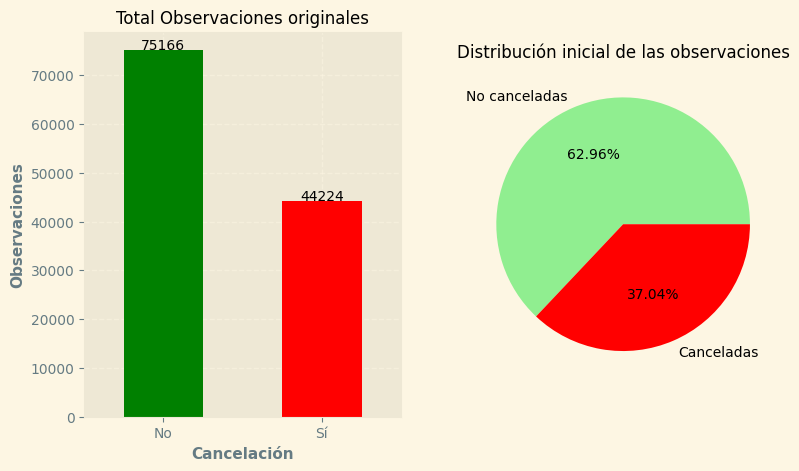

In [32]:
# Crea una figura y dos subplots
plt.figure(figsize=(figsize_default))

plt.subplot(1, 2, 1)  # Subplot 1: Gráfico de barras
cancel_counts = df_reservas['is_canceled'].value_counts()
cancel_counts.plot.bar(color=['green', 'red'])
plt.title('Total Observaciones originales')
plt.xlabel('Cancelación')
plt.ylabel('Observaciones')

# Modifica las etiquetas del eje x
plt.xticks([0, 1], ['No', 'Sí'], rotation=0)

# Agrega etiquetas a las barras
for i, count in enumerate(cancel_counts):
    plt.text(i, count + 100, str(count), ha='center')

# Subplot 2: Gráfico de torta
colores = ['lightgreen', 'red']
plt.subplot(1, 2, 2)
plt.pie(df_reservas['is_canceled'].value_counts(), labels=["No canceladas", "Canceladas"], colors= colores, autopct='%1.2f%%')
plt.title('Distribución inicial de las observaciones')

plt.show()

Inicialmente en este análisis ~63 % de las observaciones corresponden a reservas no canceladas. Esto sugiere un desbalanceo inicial en la variable objetivo, lo que podría influir en el rendimiento de ciertos modelos de análisis predictivo. Será importante considerar estrategias de manejo de desbalanceo para garantizar resultados precisos y equilibrados en el análisis y modelado de datos.

## Reducción de características

El primer paso consistirá en realizar una limpieza de datos, eliminando aquellas características que no aporten valor significativo al análisis subsiguiente. Este proceso optimizará la eficiencia del procesamiento de datos y minimizará el consumo de recursos computacionales durante las fases posteriores del proyecto.

Se procederá a eliminar las siguientes columnas del DataFrame, con la excepción de '**company**', dado que fueron generadas artificialmente por el autor del conjunto de datos para brindar contexto adicional. Sin embargo, la característica '**company**' será eliminada del DataFrame debido a que más del 94% de sus observaciones contienen valores NaN, lo que restringe su utilidad para el análisis ulterior.

In [33]:
try:
    df_reservas.drop(columns=['email','phone-number','credit_card', 'name','company'], inplace=True)
    print("Se eliminaron las características solicitadas.")
except KeyError as e:
    print(f"Error: {e} - Una o varias columnas no existen en el DataFrame.")

Se eliminaron las características solicitadas.


La característica '**reservation_status**' parece ser redundante con '**is_canceled**'. Busca agrupar las observaciones para determinar si se conserva dicha columna.

In [34]:
try:
    print(df_reservas.groupby('is_canceled')['reservation_status'].value_counts())
except KeyError as e:
    print(f"Error: {e} - Una o ambas columnas 'is_canceled' y 'reservation_status' no existen en el DataFrame.")

is_canceled  reservation_status
0            Check-Out             75166
1            Canceled              43017
             No-Show                1207
Name: reservation_status, dtype: int64


Se elimina la característica '**reservation_status**' por se un dato que se puede obtener con '**is_canceled**'.

In [35]:
try:
    df_reservas.drop(columns=['reservation_status'], inplace=True)
    print("Se eliminaron las características solicitadas.")
except KeyError as e:
    print(f"Error: {e} - La columna 'reservation_status' no existe en el DataFrame.")

Se eliminaron las características solicitadas.


La característica '**previous_bookings_not_canceled**' se análiza si la distribución de las observaciones puede resultar util al modelo.

In [36]:
calcular_porcentage(df_reservas, 'previous_bookings_not_canceled').head(10)

previous_bookings_not_canceled
0    96.967920
1     1.291565
2     0.485803
3     0.278918
4     0.191808
5     0.151604
6     0.096323
7     0.073708
8     0.058631
9     0.050255
Name: previous_bookings_not_canceled, dtype: float64

El ~97 % de las observaciones corresponden a un único valor (cero), la característica se eliminará del dataframe.

## Valores Duplicados

Busca las observaciones duplicadas en el dataframe y si las encuentra, procede a eliminarlas. Se decide eliminarlas, dado que no pueden existir observaciones completamente iguales. Eso se debe a un error durante la generación inicial del dataset original. Este procesamiento agilizará los subsiguientes procesos.

In [37]:
total_duplicados = df_reservas.duplicated().sum()

if total_duplicados > 0:
    print("En total de observaciones duplicadas en el DataFrame:", total_duplicados)
    df_reservas.drop_duplicates(inplace=True)
    print("Se eliminaron las observaciones duplicadas.")
else:
    print("El DataFrame no tiene observaciones duplicadas.")

En total de observaciones duplicadas en el DataFrame: 32003
Se eliminaron las observaciones duplicadas.


## Valores NaN

Durante el análisis del DataFrame, se han identificado observaciones que contienen valores NaN (Not a Number). En esta etapa, se implementarán estrategias para manejar estos valores faltantes con el objetivo de mejorar la integridad y calidad de los datos.

Para las características '**agent**' y '**children**', se ha decidido completar las observaciones con la moda y el valor cero (0), respectivamente.

In [38]:
# Los códigos faltantes de las agencias de turismo se reemplazan con el valor de la MODA
df_reservas["agent"].fillna(df_reservas["agent"].mode()[0], inplace=True)

# Reemplaza los Nan por 0 en la característica 'children'
df_reservas['children'].replace(np.nan, 0, inplace=True)

# Reemplaza los Nan por la MODA en la característica 'country'
df_reservas['country'].fillna(df_reservas['country'].mode()[0], inplace=True)

## Valores erroneos

Durante el análisis, se identificarán y tratarán los valores considerados incorrectos según las normativas del negocio o la lógica inherente a los datos.

Comprueba que únicamente existan dos tipos de hoteles para la característica '**hotel**'.

In [39]:
# Convertir valores del diccionario a minúsculas
dicc_hoteles = {v.lower() for v in tipo_hotel}

# Obtener hoteles únicos del DataFrame en minúsculas
hoteles = df_reservas['hotel'].astype(str).str.lower().unique()

# Validar la integridad de la característica 'hotel' con el diccionario 'tipo_hotel'
for hotel in hoteles:
    if hotel not in dicc_hoteles:
        print(f"Valor '{hotel}' no válido para la característica 'hotel'.")

if len(hoteles) == len(dicc_hoteles):
    print("La integridad de la característica 'hotel' ha sido validada correctamente.")

La integridad de la característica 'hotel' ha sido validada correctamente.


In [40]:
calcular_porcentage(df_reservas, 'babies')

babies
0     98.954078
1      1.026468
2      0.017165
10     0.001144
9      0.001144
Name: babies, dtype: float64

In [41]:
# Elimina el valor mayor o igual a 9 por ser un outlier dentro de la muestra
df_reservas = df_reservas[~(df_reservas.babies >= 9)]

Analiza la característica '**children**', la cual contiene valores NaN. Identificando los valores unicos.

In [42]:
calcular_porcentage(df_reservas, 'children')

children
0.0     90.428563
1.0      5.372776
2.0      4.111690
3.0      0.085827
10.0     0.001144
Name: children, dtype: float64

In [43]:
# Elimina el valor mayor o igual a 10 por ser un outlier dentro de la muestra
df_reservas = df_reservas[~(df_reservas['children'] >= 10)]

 Borra las observaciones cuando adultos, niños y bebés son todos cero (0), lo cual resulta en un error al capturar los datos para constituir el dataset original.

In [44]:
total_registros_con_cero = (
    (df_reservas['children'] + df_reservas['adults'] + df_reservas['babies']) == 0
).sum()

total_registros_sin_adultos = ((df_reservas['adults'] == 0)).sum()

if total_registros_con_cero:
    print("Total registros con suma de niños, adultos y bebés igual a 0:", total_registros_con_cero)
    print("Total registros sin adultos:", total_registros_sin_adultos)

    # Tratamiento de los registros con error
    df_reservas = df_reservas[~((df_reservas['children'] + df_reservas['adults'] + df_reservas['babies']) == 0)]
    print("\nSe eliminaron del DataFrame", total_registros_con_cero, "observaciones con error.")
    df_reservas['adults'].replace(0, df_reservas['adults'].mode()[0], inplace=True)
    print("Se reemplazaron con el valor MODA", total_registros_sin_adultos, "observaciones sin adultos")
else:
    print("No se encontraron registros con errores.")

Total registros con suma de niños, adultos y bebés igual a 0: 166
Total registros sin adultos: 385

Se eliminaron del DataFrame 166 observaciones con error.
Se reemplazaron con el valor MODA 385 observaciones sin adultos


Analiza la característica '**country**', en busca de códigos incorrectos. El código de país debe tener 3 caracteres alfabéticos.

In [45]:
# Filtrar las filas con códigos de país incorrectos
# El código de la característica debe ser de 3 letras
invalid_country_codes = df_reservas[~df_reservas['country'].str.match('[A-Za-z]{3}$')]
invalid_country_codes.country.unique()

array(['CN'], dtype=object)

Este error lo manejaremos más adelante con el conjunto de datos externos obtenidos mediante el consumo de una API externa.

Valida la característica '**ADR**', la cúal es muy importante como métrica. En la sección "El ADR", se destacan los valores promedio que se impusieron en la industria durante el año 2016, para tomar como referencia en este análisis.

In [46]:
df_reservas.adr.describe()

count    87218.000000
mean       106.520216
std         54.891628
min         -6.380000
25%         72.250000
50%         98.200000
75%        134.100000
max       5400.000000
Name: adr, dtype: float64

Reemplaza los valores mayores a 1.000 de la característica '**adr**'y les asigna el valor de la desviación estándar, ya que se encuentran muy lejos de los valores detectados como refencia de la industria en el período analizado. Durante el análisis del dataframe se detectaron 1959 valores en cero (0).


In [47]:
# Calcular el total de registros con 'adr' menor o igual a cero
total_registros_adr_cero = (df_reservas['adr'] <= 0).sum()

# Imprimir el total de registros con 'adr' menor o igual a cero
print("Total de registros con ADR menor o igual a cero (0):", total_registros_adr_cero)

# Aplicar condición para valores de 'adr' mayores a 1000 y menores a la desviación estándar
adr_std = df_reservas['adr'].std()
df_reservas['adr'] = np.where(df_reservas['adr'] > 1000, adr_std, df_reservas['adr'])
df_reservas['adr'] = np.where(df_reservas['adr'] < adr_std, adr_std, df_reservas['adr'])
print("Se aplicó la desviación estándar a los registros detectados.")

Total de registros con ADR menor o igual a cero (0): 1644
Se aplicó la desviación estándar a los registros detectados.


Realiza un histograma para gráficar la distribución de los valores 'adr' según la cantidad total de observaciones.

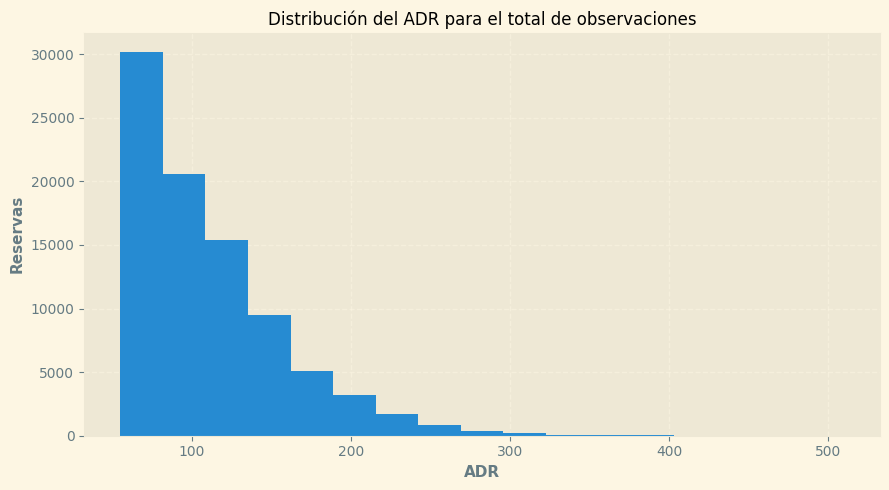

In [48]:
# La regla de Sturges para calcular el número óptimo de bins para un histograma
num_bins_optimo = calcular_num_bins(df_reservas['adr'])

# Crear el histograma
fig, ax = plt.subplots(figsize=(figsize_default))
ax.hist(x= df_reservas.adr, bins = num_bins_optimo, density=False, orientation='vertical')
ax.set_xlabel('ADR')
ax.set_ylabel('Reservas')
ax.set_title('Distribución del ADR para el total de observaciones')
plt.tight_layout()
plt.show()

La característica sigue mostrando una distribución donde pueden tratarse de valores atípicos. Esto será validado apropiadamente en la sección correspondiente en este proyecto.

Valida la coherencia en la característica que representa el número de día del mes de arribo al hotel ('**arrival_date_day_of_month**'). Valores correctos posibles: 1 a 31.

In [49]:
# Llamamos a la función de validación de rangos de datos
errores = validar_rango_datos(df_reservas, 'arrival_date_day_of_month', 1, 31)
if isinstance(errores, pd.DataFrame):
    print(errores.shape[0])
    display(errores.sample(5))

Esta característica no presenta errores


Trabaja con la característica '**arrival_date_month**' para detectar posibles valores que no sean meses escritos en ingles.

In [50]:
# Validamos que solamente existan los meses validos
df_reservas['arrival_date_month'].unique()

array(['February', 'November', 'June', 'March', 'July', 'December',
       'April', 'May', 'October', 'August', 'January', 'September'],
      dtype=object)

La característica '**arrival_date_year**' debe estar integrada por los años: 2015, 2016 y 2017.

In [51]:
# Llamamos a la función de validación de rangos de datos
errores = validar_rango_datos(df_reservas, 'arrival_date_year', 2015, 2017)
if isinstance(errores, pd.DataFrame):
    print(errores.shape[0])
    display(errores.sample(5))

Esta característica no presenta errores


Repite el procedimiento ahora con la característica que representa el número de semana de arribo al hotel, '**arrival_date_week_number**', para validar el número de semana según "The Mathematics of the ISO 8601 Calendar".

In [52]:
# Obtener los años únicos presentes en la columna 'arrival_date_year'
years_data = df_reservas['arrival_date_year'].unique()

# Valida el número de semana según "The Mathematics of the ISO 8601 Calendar"
# Iterar sobre cada año único y calcular el número de semanas
for year in years_data:
    ultimo_dia = f"{year}-12-31"
    weeks_year = pd.to_datetime(ultimo_dia).isocalendar()[1]
    print(f"Número de semanas en el año {year}: {weeks_year}")

    # Llamamos a la función de validación de rangos de datos
    errores = validar_rango_datos(df_reservas[df_reservas['arrival_date_year']== year],
                              'arrival_date_week_number', 1, weeks_year)

    if isinstance(errores, pd.DataFrame):
      print(errores.shape[0])
      #display(errores.sample(5))
    print("\n")

Número de semanas en el año 2017: 52
Esta característica no presenta errores


Número de semanas en el año 2016: 52
Se detectaron errores:
888


Número de semanas en el año 2015: 53
Esta característica no presenta errores




In [53]:
# Es posible que algunos valores sean coherentes dentro del rango análizado, pero esten mal calculados, por ello para asegurarnos
# Corregimos el número de semana con el valor correcto para cada observación. Deja correcto el total de los registros.

# Calcular el número de semana para cada fecha de llegada y reemplazar los valores en 'arrival_date_week_number'
df_reservas['arrival_date_week_number'] = pd.to_datetime(df_reservas['arrival_date_year'].astype(str) + '-' +
                                                         df_reservas['arrival_date_month'].astype(str) + '-' +
                                                         df_reservas['arrival_date_day_of_month'].astype(str)).dt.isocalendar().week


Valida las características '**stays_in_week_nights**' y '**stays_in_weekend_nights**' en busca de valores erroneos.

In [54]:
# Identifica cuando la suma de stays_in_week_nights y stays_in_weekend_nights sea igual a cero
df_reservas[df_reservas['stays_in_week_nights'] + df_reservas['stays_in_weekend_nights'] == 0].shape

(591, 30)

In [55]:
# Toma el valor de la STD y la transforma en entero para asignarlo a los valores cero en stays_in_week_nights
std = int(df_reservas['stays_in_week_nights'].std())

# Reemplaza el valor cero
df_reservas.loc[df_reservas['stays_in_week_nights'] + df_reservas['stays_in_weekend_nights'] == 0, 'stays_in_week_nights'] = std

In [56]:
calcular_porcentage(df_reservas, 'stays_in_week_nights').head(10)

stays_in_week_nights
1     25.414479
2     24.444495
3     18.622303
5     11.068816
4      9.008462
0      6.326676
6      1.576509
10     1.106423
7      1.102983
8      0.700543
Name: stays_in_week_nights, dtype: float64

In [57]:
# Reemplaza los valores mayores a 5 por la moda
df_reservas['stays_in_week_nights'].where(df_reservas['stays_in_week_nights'] <= 6,
    df_reservas['stays_in_week_nights'].mode()[0],
    inplace=True
)

In [58]:
calcular_porcentage(df_reservas, 'stays_in_weekend_nights').head(10)

stays_in_weekend_nights
0    40.188952
2    30.239171
1    25.961384
4     1.977803
3     1.310509
6     0.128414
5     0.077966
8     0.066500
7     0.017198
9     0.010319
Name: stays_in_weekend_nights, dtype: float64

In [59]:
# Reemplaza los valores mayores a 2 por la moda
df_reservas['stays_in_weekend_nights'].where(
    df_reservas['stays_in_weekend_nights'] <= 2,
    df_reservas['stays_in_weekend_nights'].mode()[0],
    inplace=True
)

Valida la característica '**is_repeated_guest**' en busca de valores no booleanos, cualquier otro valor es un error.

In [60]:
# Llamamos a la función de validación de rangos de datos
errores = validar_rango_datos(df_reservas, 'is_repeated_guest', 0, 1)
if isinstance(errores, pd.DataFrame):
    print(errores.shape[0])
    display(errores.sample(5))

Esta característica no presenta errores


In [61]:
calcular_porcentage(df_reservas, 'is_repeated_guest').head(10)

is_repeated_guest
0    96.142998
1     3.857002
Name: is_repeated_guest, dtype: float64

Analiza la característica '**booking_changes**', que corresponde al total de cambios aplicados a la reserva.

In [62]:
# Calcula el procentaje por cada valor
calcular_porcentage(df_reservas,'booking_changes').head(10)

booking_changes
0    81.884473
1    12.456144
2     3.992295
3     0.988328
4     0.397854
5     0.129560
6     0.065353
7     0.033250
8     0.016052
9     0.009172
Name: booking_changes, dtype: float64

El 95 % de los valores se encuentran entre 0 y 2 cambios por observación. Se reemplaza el resto de los valores por el valor de la moda.

In [63]:
df_reservas['booking_changes'].where(
    df_reservas['booking_changes'] <= 2,
    df_reservas['booking_changes'].mode()[0],
    inplace=True
)

Analiza la característica '**previous_cancellations**' para determinar si es de utilidad al proceso.

In [64]:
# Calcula el procentaje por cada valor
calcular_porcentage(df_reservas,'previous_cancellations').head(10)

previous_cancellations
0     98.072646
1      1.610906
2      0.126121
3      0.069940
4      0.034397
11     0.030957
5      0.021784
6      0.019491
13     0.004586
24     0.002293
Name: previous_cancellations, dtype: float64

Se eliminará la característica debido a estar muy sesgada, donde ~98% de los datos corresponden a un mismo valor.

Característica '**required_car_parking_spaces**'.

In [65]:
# Calcula el porcentaje de observaciones por valor.
calcular_porcentage(df_reservas, 'required_car_parking_spaces').head(10)

required_car_parking_spaces
0    91.623289
1     8.338875
2     0.032103
3     0.003440
8     0.002293
Name: required_car_parking_spaces, dtype: float64

In [66]:
# Reemplaza los valores mayores a 1 por la moda.
df_reservas['required_car_parking_spaces'].where(
    df_reservas['required_car_parking_spaces'] <= 1,
    df_reservas['required_car_parking_spaces'].mode()[0],
    inplace=True
)

Característica '**total_of_special_requests**'.

In [67]:
# Calcula el porcentaje de observaciones por valor.
calcular_porcentage(df_reservas, 'total_of_special_requests').head(10)

total_of_special_requests
0    50.197207
1    33.219060
2    13.522438
3     2.653122
4     0.366897
5     0.041276
Name: total_of_special_requests, dtype: float64

In [68]:
# Reemplaza los valores mayores a 2 por la moda.
df_reservas['total_of_special_requests'].where(
    df_reservas['total_of_special_requests'] <= 2,
    df_reservas['total_of_special_requests'].mode()[0],
    inplace=True
)

Se busca comprender el valor de la característica '**deposit_type**'.

In [69]:
calcular_porcentage(df_reservas, 'deposit_type')

deposit_type
No Deposit    98.687198
Non Refund     1.190121
Refundable     0.122681
Name: deposit_type, dtype: float64

La característica presenta mucho sesgo hacia un único valor. Será eliminada del dataframe.

Característica '**days_in_waiting_list**'.

In [70]:
calcular_porcentage(df_reservas, 'days_in_waiting_list').head(10)

days_in_waiting_list
0      99.019698
63      0.060767
87      0.028664
44      0.026371
15      0.025224
58      0.024078
48      0.024078
38      0.021784
122     0.021784
27      0.019491
Name: days_in_waiting_list, dtype: float64

La caraterística se eliminará del dataframe, 99% de las observaciones se representan un único valor.

In [71]:
calcular_porcentage(df_reservas, 'market_segment').head(10)

market_segment
Online TA        59.103625
Offline TA/TO    15.882043
Direct           13.506386
Groups            5.643331
Corporate         4.809787
Complementary     0.793414
Aviation          0.259121
Undefined         0.002293
Name: market_segment, dtype: float64

In [72]:
# Borra las observaciones con muy baja representatividad
df_reservas = df_reservas[~df_reservas['market_segment'].isin(["Undefined", "Complementary", "Aviation"])]

Elimina del dataframe las características que no serán utilizadas en el entrenamiento de los modelos de ML.

In [73]:
# Se borran todas las características que ya fueron analizadas y no serán utilizadas.
try:
    df_reservas.drop(columns=['deposit_type','previous_cancellations',
                              'previous_bookings_not_canceled', 'previous_cancellations',
                              'days_in_waiting_list'
                              ], inplace=True)
    print("Se eliminaron las características solicitadas.")
except KeyError as e:
    print(f"Error: {e} - Una o varias columnas no existen en el DataFrame.")

Se eliminaron las características solicitadas.


In [74]:
# BORRAR
df_backup = df_reservas.copy()

In [75]:
df_reservas = df_backup.copy()

## Transformación de los tipos de datos.

En el proceso de preparación de datos para análisis, es esencial convertir características a tipos numéricos para facilitar su procesamiento y análisis subsiguiente. Este paso asegura la coherencia y precisión de los cálculos y modelos que se aplicarán más adelante. Para lograr esto, empleamos herramientas de bibliotecas como Pandas en Python.

In [76]:
# Transforma el tipo de dato float a int64
df_reservas['children'] = df_reservas['children'].astype('int64')
df_reservas['agent'] = df_reservas['agent'].astype('int64')
df_reservas['arrival_date_week_number'] = df_reservas['arrival_date_week_number'].astype('int64')

Realiza un mapeo de las características referidas al tipo de habitación reservada por el huesped y la asignada por la plataforma de reservas.

In [77]:
# Mapea los tipos de habitaciones con el diccionario
df_reservas['reserved_room_type'] = df_reservas['reserved_room_type'].replace(room_type)
df_reservas['assigned_room_type'] = df_reservas['assigned_room_type'].replace(room_type)
# Mapea los tipos de servicio de comida contratados
df_reservas['meal'] = df_reservas['meal'].replace(foodservice_type)

# Muestra el resultado del mapeo de los diccionarios
df_reservas[['reserved_room_type','assigned_room_type', 'meal']].sample(5)

,reserved_room_type,assigned_room_type,meal
43611,Suite Presidencial,Suite Presidencial,Cama y desayuno
105466,Suite Presidencial,Suite Presidencial,Sin servicio de comidas
8207,Suite Presidencial,Suite Presidencial,Cama y desayuno
54461,Económica,Económica,Cama y desayuno
3551,Suite Presidencial,Suite Presidencial,Cama y desayuno


## Etiquetado de variables

En el proceso de preparación de datos para el análisis y modelado, nos encontrarnos con características categóricas que necesitan ser transformadas en un formato numérico para ser procesadas por algoritmos de machine learning. Para lograr esto, utilizamos la técnica de etiquetado de variables categóricas utilizando **LabelEncoder**.


In [78]:
# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Lista de columnas categóricas
columnas_categoricas = ['hotel', 'country', 'meal', 'distribution_channel',
                        'market_segment', 'reserved_room_type',
                        'assigned_room_type', 'customer_type']

# Iterar sobre cada columna categórica
for columna in columnas_categoricas:
    # Aplicar el etiquetado de la variable categórica y agregar una nueva columna al DataFrame con el sufijo "_le"
    df_reservas[columna + '_le'] = label_encoder.fit_transform(df_reservas[columna])


## Ingeniería de atributos

Introducimos nuevas características que enriquecerán nuestra comprensión de los datos y potenciarán el rendimiento de nuestros modelos de aprendizaje automático. Estas características están diseñadas para capturar aspectos específicos y relevantes de nuestros datos, permitiendo una exploración más profunda y una modelización más precisa. Al incorporar estas nuevas variables, fortalecemos nuestro enfoque de análisis de datos desde una perspectiva de ciencia de datos, lo que nos capacita para descubrir patrones más sutiles, identificar relaciones ocultas y tomar decisiones más informadas en el proceso de modelado predictivo y análisis exploratorio.

Crea el campo '**fecha_arribo**' para futuras operaciones, tomando los datos de las columnas '**arrival_date_year**', '**arrival_date_month**' y '**arrival_date__day_of_month**'.

In [79]:
df_reservas['mes_arribo_numero'] = df_reservas["arrival_date_month"].map(orden_meses)

df_reservas['fecha_arribo'] = pd.to_datetime(df_reservas['arrival_date_year'].astype(str) + '-'
                                             + df_reservas['arrival_date_month'].astype(str) + '-'
                                             + df_reservas['arrival_date_day_of_month'].astype(str))

Crea la nueva característica '**total_pasajeros**', que suma el total de pasajeros adultos y menores de edad, por observación.

In [80]:
df_reservas['total_pasajeros'] = df_reservas[['adults', 'children', 'babies']].sum(axis=1).astype(int)
calcular_porcentage(df_reservas, 'total_pasajeros').head(10)

total_pasajeros
2     65.535702
1     17.970289
3     11.614406
4      4.691882
5      0.171499
26     0.005794
27     0.002318
20     0.002318
10     0.001159
50     0.001159
Name: total_pasajeros, dtype: float64

In [81]:
# cuando total_pasajeros > 4 reemplazar por el valor de la moda
df_reservas['total_pasajeros'].where(df_reservas['total_pasajeros'] <= 4, df_reservas['total_pasajeros'].mode()[0], inplace=True)
calcular_porcentage(df_reservas, 'total_pasajeros').head(10)

total_pasajeros
2    65.723423
1    17.970289
3    11.614406
4     4.691882
Name: total_pasajeros, dtype: float64

Agrega la nueva característica '**total_estadia**', la cual se calcula sumando el total de noches por observación, sean en semana y/o en fin de semana.

In [82]:
df_reservas['total_estadia'] = df_reservas[['stays_in_week_nights', 'stays_in_weekend_nights']].sum(axis=1).astype(int)
# borra los registros cuando el total de estadias se 0
df_reservas = df_reservas[~(df_reservas.total_estadia == 0)]

calcular_porcentage(df_reservas, 'total_estadia').head(10)

total_estadia
1    21.866092
3    21.608844
2    18.582122
4    15.673596
7     8.704721
5     8.198336
6     4.464762
8     0.901527
Name: total_estadia, dtype: float64

Se crea la nueva característica '**grupo_pasajeros**' para segmentar a los pasajeros, asignándoles una categoría según las siguientes clasificaciones para grupos de pasajeros:


* '**solteros**': 1 adulto, sin hijos ni bebes,
* '**solteros_con_hijos**': 1 adulto, con hijos/bebes,
* '**parejas**': 2 adultos, sin hijos ni bebes,
* '**familia_chica**': 2 adultos con 1 hijo o bebe,
* '**familia_mediana**': 2 adultos con 2 hijo o bebe,
* '**familia_grande**': 2 adultos con mas de 2 hijos o bebes
* '**grupos**': mas de 2 adultos

In [83]:
# Definir una función lambda para segmentar las reservas por grupos de pasajeros
categorizar_pasajeros = lambda row: (
    'solteros' if row['adults'] == 1 and row['babies'] == 0 and row['children'] == 0
    else 'solteros_con_hijos' if row['adults'] == 1 and (row['babies'] + row['children']) >= 1
    else 'parejas' if row['adults'] == 2 and row['babies'] == 0 and row['children'] == 0
    else 'familia_chica' if row['adults'] == 2 and (row['babies'] + row['children']) == 1
    else 'familia_mediana' if row['adults'] == 2 and (row['babies'] + row['children']) == 2
    else 'familia_grande' if row['adults'] == 2 and (row['babies'] + row['children']) > 2
    else 'grupos' if row['adults'] > 2
    else 'indefinidos'
)

df_reservas['grupo_pasajeros'] = df_reservas.apply(categorizar_pasajeros, axis=1)
# Validamos el resultado obtenido
df_reservas[['adults','children','babies', 'total_pasajeros', 'grupo_pasajeros']].sample(5)

,adults,children,babies,total_pasajeros,grupo_pasajeros
58611,2,0,0,2,parejas
61817,1,0,0,1,solteros
86476,1,0,0,1,solteros
69886,2,0,0,2,parejas
12178,2,0,0,2,parejas


Determina si una observación es un grupo familiar basandose en la ingeniería realizada previamente en la calificación de los pasajeros. Para ello, creamos la nueva característica **'es_grupo_familiar'**, cuyo valor será un 1 cuando sea verdadero y 0 para falso.

In [84]:
df_reservas['es_grupo_familiar'] = (
    (df_reservas['grupo_pasajeros'].isin(['solteros_con_hijos','familia_chica', 'familia_mediana', 'familia_grande'])).astype(int)
)
# Vemos el resultado obtenido
df_reservas[['grupo_pasajeros','es_grupo_familiar', 'total_pasajeros']].sample(5)

,grupo_pasajeros,es_grupo_familiar,total_pasajeros
16967,parejas,0,2
59583,parejas,0,2
35190,parejas,0,2
112354,parejas,0,2
37319,parejas,0,2


Con la '**fecha_arribo**' y la cantidad total de noches de la estadia ('**total_estadia**'), se calcula la fecha de check-out del pasajero, creando la nueva característica '**fecha_check_out**'.

In [85]:
df_reservas['fecha_check_out'] = df_reservas['fecha_arribo'] + pd.to_timedelta(df_reservas['total_estadia'], unit='D')
df_reservas['fecha_check_out'].sample(5)

3126    2016-10-25
18689   2015-09-06
92038   2017-01-09
32671   2016-10-11
20143   2017-07-24
Name: fecha_check_out, dtype: datetime64[ns]

Utiliza la nueva característica '**total_estadia**', que representa la duración total de la estadía, para calcular el importe total de la reserva en combinación con el Valor Promedio Diario (ADR), es una práctica común y útil en la industria hotelera. Este simple cálculo proporciona una estimación del costo total de la estadía del cliente en el hotel, basado en la tarifa promedio diaria y la duración de la misma.


In [86]:
df_reservas['importe_total'] = (df_reservas.adr) * (df_reservas.total_estadia)
df_reservas.importe_total.sample(5)

98704      54.891628
1058     3410.000000
7277     1230.000000
32067      84.800000
99920     237.200000
Name: importe_total, dtype: float64

In [87]:
# Volvemos a comprobar duplicados dado que se han modificado datos
total_duplicados = df_reservas.duplicated().sum()

if total_duplicados > 0:
    print("En total de observaciones duplicadas en el DataFrame:", total_duplicados)
    df_reservas.drop_duplicates(inplace=True)
    print("Se eliminaron las observaciones duplicadas.")
else:
    print("El DataFrame no tiene observaciones duplicadas.")

En total de observaciones duplicadas en el DataFrame: 363
Se eliminaron las observaciones duplicadas.


## Valores atípicos (outliers)

Los valores atípicos, o outliers, son datos inusuales que difieren significativamente del resto del conjunto. Pueden surgir por errores, variaciones naturales o eventos raros. Identificarlos es esencial en ciencia de datos para evitar distorsiones en análisis y modelos. Se emplean técnicas como el rango intercuartílico o diagramas de caja para detectarlos. Tratarlos adecuadamente mejora la precisión de los modelos y la fiabilidad de las conclusiones.

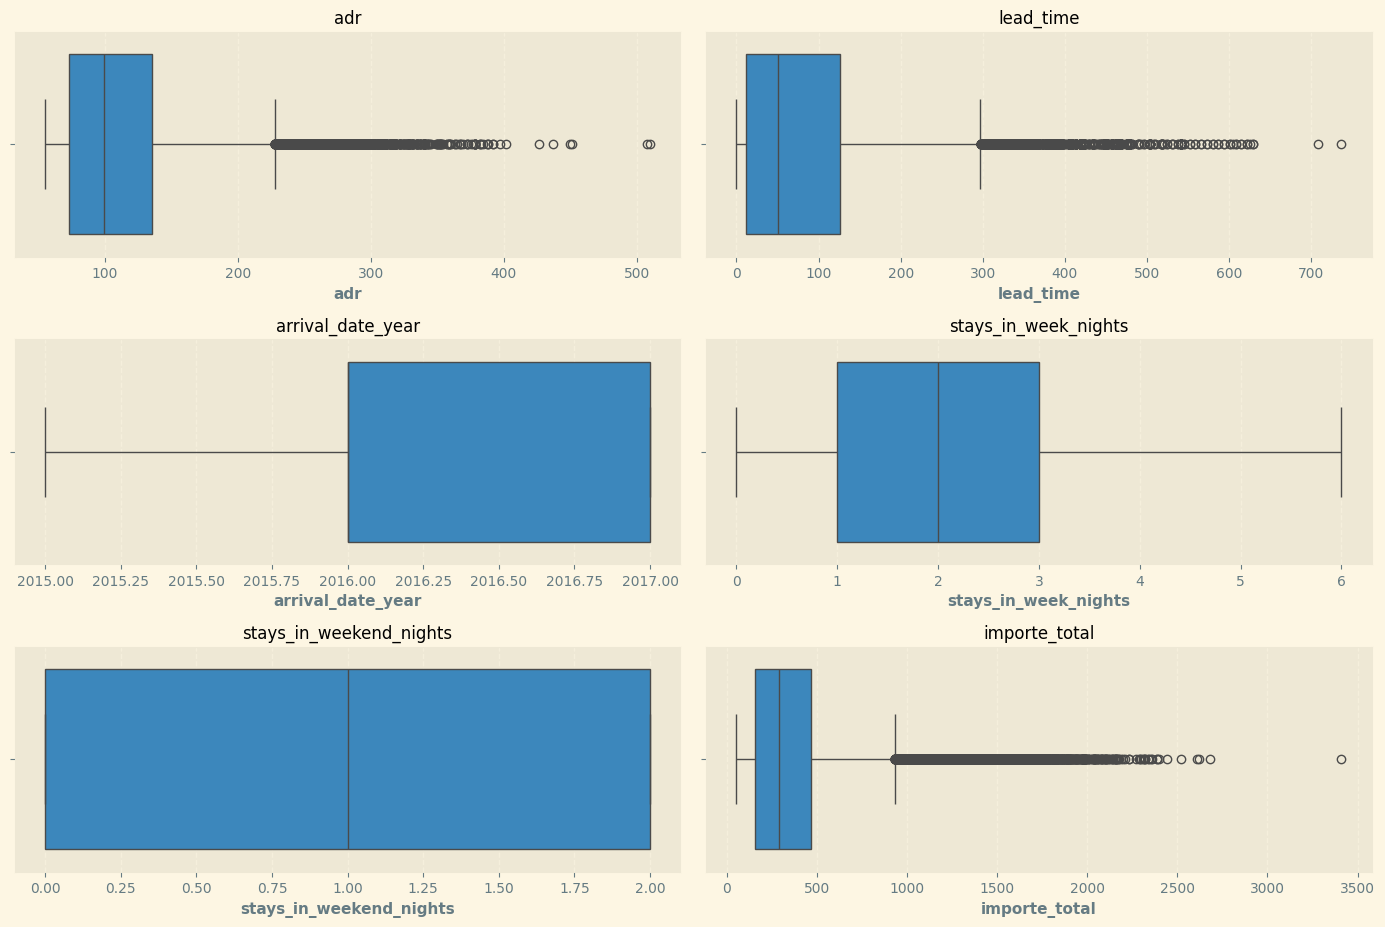

In [88]:
# Realiza un grafico boxplot de algunas las características
plt.figure(figsize=(14, 12))

# Iterar sobre las columnas seleccionadas y sus índices
for i, j in enumerate(['adr', 'lead_time', 'arrival_date_year',
                       'stays_in_week_nights', 'stays_in_weekend_nights',
                       'importe_total']):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df_reservas[j])
    plt.title(j)

plt.tight_layout()
plt.show()

Análisis multivariado

Busca identificar los outliers existen entre la característica '**importe_total**' y la nueva característica '**total_pasajeros**'


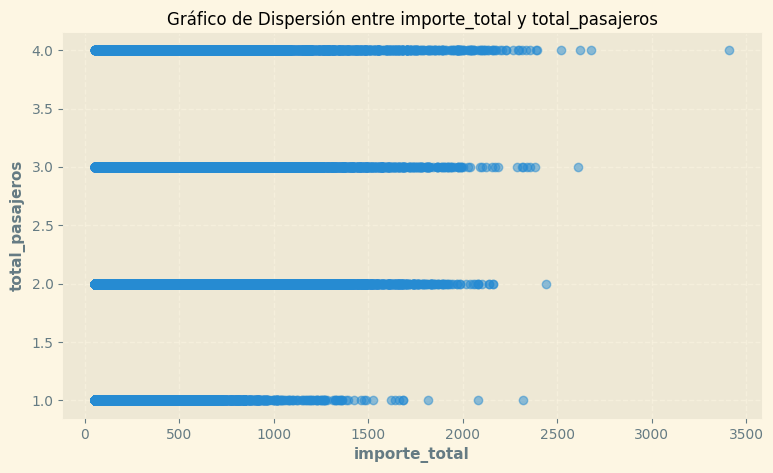

In [89]:
graficar_scatter_plot(df_reservas, 'importe_total', 'total_pasajeros', tamano_grafico=(figsize_default))

Se detectan valores atípicos fuera del rango cuando el número de huéspedes en una reserva supera los 10. Estos valores, aunque pueden ser válidos en circunstancias excepcionales, probablemente no reflejan la práctica comercial típica y podrían distorsionar el análisis de datos si se dejan sin corregir.

In [90]:
# Busca aquellas reservas que contienen valores atípicos asociados.
df_reservas[['hotel', 'is_canceled', 'total_pasajeros', 'total_estadia', 'adr', 'importe_total']][(df_reservas['total_pasajeros'] >= 5)
& (df_reservas['importe_total'] < 100)]

,hotel,is_canceled,total_pasajeros,total_estadia,adr,importe_total


In [91]:
# Elimina los registros dado que son pocos y no distorcinaran el entrenamiento del modelo final.
df_reservas = df_reservas.drop(df_reservas[(df_reservas['total_pasajeros'] > 15)].index)

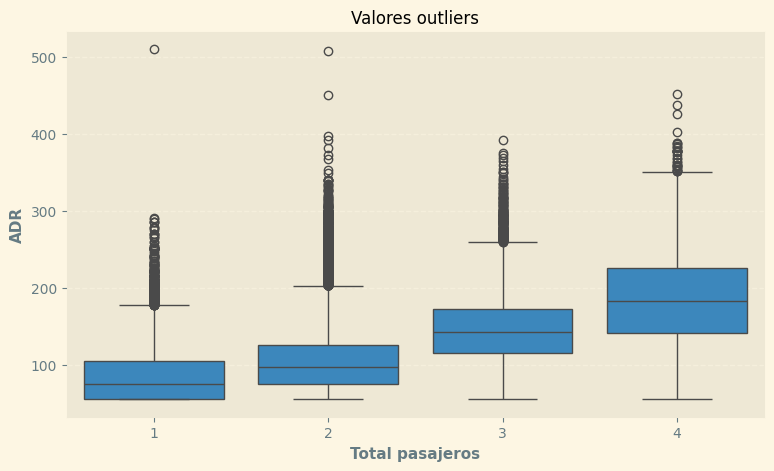

In [92]:
plt.figure(figsize=(figsize_default))
sns.boxplot(data = df_reservas, x='total_pasajeros', y='adr')
plt.xlabel('Total pasajeros')
plt.ylabel('ADR')
plt.title('Valores outliers')
plt.show()

La detección de valores atípicos basada en el número total de pasajeros y el Valor Promedio Diario (ADR) de la reserva es fundamental para garantizar la integridad de los datos y la precisión de los análisis subsiguientes en el contexto de la industria hotelera.

## Método z-score

In [93]:
# Convertir a z score
datos_z = df_reservas.select_dtypes(include='number')

for j in datos_z.columns[1:]:
    std_dev = datos_z[j].std()
    if std_dev != 0:
        datos_z[j] = (datos_z[j] - datos_z[j].mean()) / std_dev
    else:
        datos_z[j] = 0

datos_z.head(5)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,distribution_channel_le,market_segment_le,reserved_room_type_le,assigned_room_type_le,customer_type_le,mes_arribo_numero,total_pasajeros,total_estadia,es_grupo_familiar,importe_total
0,0,1.469336,1.149614,-1.351976,0.925539,-1.022569,-0.238462,0.177435,-0.306508,-0.10148,...,0.48764,0.68736,0.245849,0.315185,-0.103177,-1.447279,-0.046789,-0.653798,-0.331378,-0.698565
1,0,-0.634610,-0.308206,1.369105,-0.998031,0.153339,-0.909501,-1.453176,-0.306508,-0.10148,...,0.48764,0.68736,0.245849,0.315185,-0.103177,1.464260,-1.486904,-0.653798,-0.331378,-0.188133
2,1,-0.843842,1.149614,-0.248835,-0.771728,-1.022569,-0.909501,0.177435,-0.306508,-0.10148,...,0.48764,0.68736,0.245849,0.315185,-0.103177,-0.153261,-0.046789,-1.187528,-0.331378,-0.761998
3,0,-0.797346,1.149614,-1.057805,0.812388,-1.022569,0.432578,0.177435,-0.306508,-0.10148,...,0.48764,0.68736,-2.732808,-2.261926,-0.103177,-1.123774,-0.046789,-0.120068,-0.331378,0.906575
4,0,0.248815,-0.308206,0.192421,0.812388,1.329248,1.774656,0.177435,-0.306508,-0.10148,...,0.48764,0.68736,0.245849,0.315185,-0.103177,0.170243,-0.046789,2.014851,-0.331378,1.513674


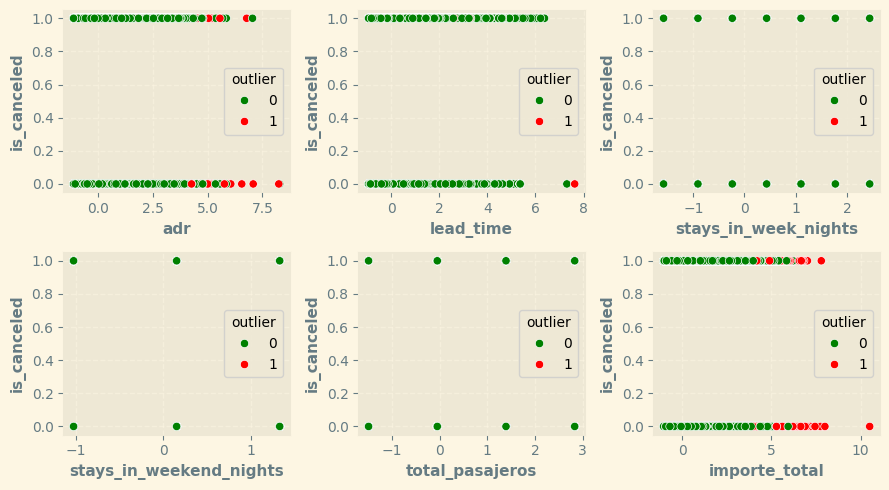

In [94]:
# Restablecer los índices
datos_z.reset_index(drop=True, inplace=True)

# Aplicar la funcion
datos_z['outlier'] = outlier_euclideano(datos_z, 3)

# Llamada a la función con las variables deseadas
scatterplot_outliers(datos_z, ["adr", "lead_time", "stays_in_week_nights",
                               "stays_in_weekend_nights", "total_pasajeros", "importe_total"],
                               "is_canceled", "outlier", {0: "green", 1: "red"}, figsize_default)


Tras un análisis exhaustivo utilizando el método z-score, se han detectado deficiencias significativas en los datos, especialmente en las características cruciales bajo examen. Para garantizar la integridad y la fiabilidad de nuestro análisis, se llevará a cabo un proceso de imputación para abordar estas ausencias de datos.

## Método IQR

In [95]:
# Lista con las características que se modificaran los valores atípicos.
cols_atipicos = ["adr", "lead_time", "stays_in_week_nights", "stays_in_weekend_nights",
                 "total_pasajeros", "importe_total"]

for columna in cols_atipicos:
    try:
        # llama a la función propia
        reemplazar_atipicos(df_reservas[columna], estrategia='moda')
        print(f"Valores reemplazados en la característica: {columna}")
    except Exception as e:
        print(f"Error al reemplazar valores atípicos en la característica '{columna}': {e}")

Valores reemplazados en la característica: adr
Valores reemplazados en la característica: lead_time
Valores reemplazados en la característica: stays_in_week_nights
Valores reemplazados en la característica: stays_in_weekend_nights
Valores reemplazados en la característica: total_pasajeros
Valores reemplazados en la característica: importe_total


Buscamos el comportamiento de los valores perdidos entre '**lead_time**' y '**hotel**', según el tipo de hotel.

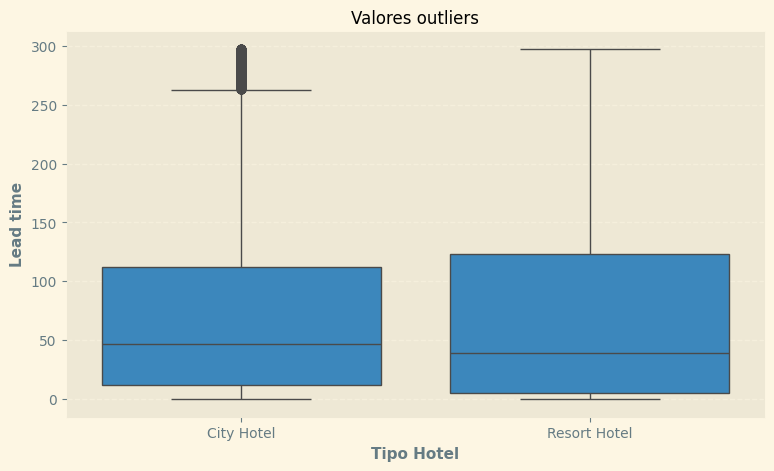

In [96]:
plt.figure(figsize=(figsize_default))
sns.boxplot(data = df_reservas, x='hotel', y='lead_time')
plt.xlabel('Tipo Hotel')
plt.ylabel('Lead time')
plt.title('Valores outliers')
plt.show()

Validar el procesamiento de los valores outliers.

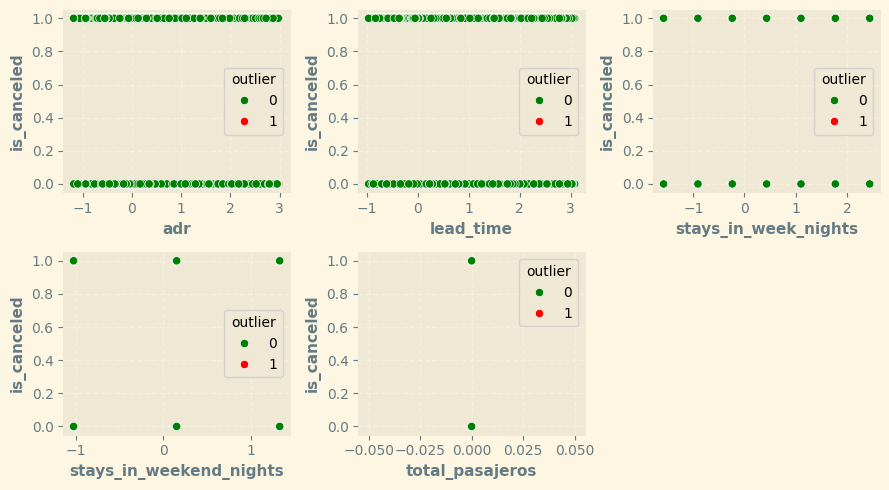

In [97]:
# Convertir a z score
datos_z = df_reservas.select_dtypes(include='number')

for j in datos_z.columns[1:]:
    std_dev = datos_z[j].std()
    if std_dev != 0:
        datos_z[j] = (datos_z[j] - datos_z[j].mean()) / std_dev
    else:
        datos_z[j] = 0


# Restablecer los índices
datos_z.reset_index(drop=True, inplace=True)

# Aplicar la funcion
datos_z['outlier'] = outlier_euclideano(datos_z, 3)

# Llamada a la función con las variables deseadas
scatterplot_outliers(datos_z, ["adr", "lead_time", "stays_in_week_nights",
                               "stays_in_weekend_nights", "total_pasajeros"],
                              "is_canceled", "outlier", {0: "green", 1: "red"}, figsize_default)

Tras un riguroso análisis y procesamiento de las características, se ha logrado reducir significativamente la presencia de valores atípicos. Este refinamiento posibilitará una predicción más precisa y robusta en los modelos de machine learning seleccionados para el análisis de datos.

## Países

Trabajamos con los datos obtenidos de la API, con el fin de enriquecer los graficos y análisis futuros.

In [98]:
analizar_dataframe(df_paises_coordenadas, porcentaje_tolerancia=0)

,Tipo de dato,Total No Nulos,Total Nulos,% Nulos,Borrar?,Total Ceros,Columna con Espacios,count,mean,std,min,25%,50%,75%,max
country,object,176,0,0.000000,,0,False,nan,nan,nan,nan,nan,nan,nan,nan
name,object,176,0,0.000000,,0,False,nan,nan,nan,nan,nan,nan,nan,nan
region,object,176,0,0.000000,,0,False,nan,nan,nan,nan,nan,nan,nan,nan
lat,float64,176,0,0.000000,,0,False,176.000000,20.310000,25.700000,-90.000000,7.000000,20.000000,41.000000,65.000000
lon,float64,176,0,0.000000,,1,False,176.000000,19.220000,63.160000,-170.000000,-5.090000,19.750000,46.060000,178.060000


Limpia los países que no tienen código de país.

In [99]:
df_paises_coordenadas = df_paises_coordenadas[df_paises_coordenadas['country'] != 0]
df_paises_coordenadas.head()

,country,name,region,lat,lon
0,PRT,Portugal,Europe,39.5,-8.0
1,GBR,United Kingdom,Europe,54.0,-2.0
2,USA,United States,Americas,38.0,-97.0
3,ESP,Spain,Europe,40.0,-4.0
4,IRL,Ireland,Europe,53.0,-8.0


Busca los posibles países duplicados basado en las coordenadas.

In [100]:
duplicados = df_paises_coordenadas[df_paises_coordenadas.duplicated('name', keep=False)]
print(duplicados[['name','country', 'lat','lon']])

     name country   lat    lon
14  China      CN  35.0  105.0
32  China     CHN  35.0  105.0


Busca los valores para cada código de país cuando se trata del mismo.

In [101]:
resultado_lista = df_paises_coordenadas[df_paises_coordenadas.duplicated('name', keep=False)]['country'].tolist()
total = df_reservas[df_reservas['country'].isin(resultado_lista)]['country'].value_counts()
print(total)

CN     1087
CHN     813
Name: country, dtype: int64


Unifica los códigos de país del país duplicado.

In [102]:
df_reservas = df_reservas.replace({'country': {'CN': 'CHN'}})

total = df_reservas[df_reservas['country'] == 'CHN']['country'].value_counts()
print(total)

CHN    1900
Name: country, dtype: int64


In [103]:
df_paises_coordenadas.drop(df_paises_coordenadas[df_paises_coordenadas['country'] == 'CN'].index, inplace=True)

Junta los dataframe en uno solo para luego utilizarlo en las vizualizaciones y demás.

In [104]:
# Calcular el total de pasajeros por país
df_total_pasajeros_pais = df_reservas.groupby('country')['total_pasajeros'].sum().reset_index()

# Calcular el total de reservas canceladas y confirmadas por país
df_totales = df_reservas.groupby(['country', 'is_canceled']).size().unstack(fill_value=0).reset_index()
df_totales.columns = ['country', 'confirmadas', 'canceladas']

# Ordenar por reservas canceladas
df_totales = df_totales.sort_values(by='canceladas', ascending=False)

# Combinar DataFrames
df_paises_reservas = pd.merge(left=df_paises_coordenadas, right=df_totales, on='country', how='left')
df_paises_reservas = pd.merge(left=df_total_pasajeros_pais, right=df_paises_reservas, on='country', how='left')

# Eliminar países sin nombre
df_paises_reservas = df_paises_reservas.dropna(subset=['name'])

# Sumar las columnas 'canceladas' y 'confirmadas'
df_paises_reservas['total_reservas'] = df_paises_reservas[['canceladas', 'confirmadas']].sum(axis=1)

# Ordenar por reservas confirmadas
df_paises_reservas = df_paises_reservas.sort_values(by='confirmadas', ascending=False)
df_paises_reservas.head()

,country,total_pasajeros,name,region,lat,lon,confirmadas,canceladas,total_reservas
134,PRT,53796,Portugal,Europe,39.5,-8.0,17242.0,9656.0,26898.0
58,GBR,20618,United Kingdom,Europe,54.0,-2.0,8326.0,1983.0,10309.0
55,FRA,17598,France,Europe,46.0,2.0,7068.0,1731.0,8799.0
50,ESP,14406,Spain,Europe,40.0,-4.0,5347.0,1856.0,7203.0
42,DEU,10726,Germany,Europe,51.0,9.0,4312.0,1051.0,5363.0


Analiza los DataFrames para ver el resultado del Data Wrangling y comprobar las tareas realizadas.

In [105]:
analizar_dataframe(df_paises_reservas, porcentaje_tolerancia=0)

,Tipo de dato,Total No Nulos,Total Nulos,% Nulos,Borrar?,Total Ceros,Columna con Espacios,count,mean,std,min,25%,50%,75%,max
country,object,175,0,0.000000,,0,False,nan,nan,nan,nan,nan,nan,nan,nan
total_pasajeros,int64,175,0,0.000000,,0,False,175.000000,982.080000,4768.620000,2.000000,4.000000,22.000000,128.000000,53796.000000
name,object,175,0,0.000000,,0,False,nan,nan,nan,nan,nan,nan,nan,nan
region,object,175,0,0.000000,,0,False,nan,nan,nan,nan,nan,nan,nan,nan
lat,float64,175,0,0.000000,,0,False,175.000000,20.230000,25.750000,-90.000000,7.000000,20.000000,41.000000,65.000000
lon,float64,175,0,0.000000,,1,False,175.000000,18.730000,63.000000,-170.000000,-5.180000,19.500000,45.460000,178.060000
confirmadas,float64,175,0,0.000000,,12,False,175.000000,354.890000,1634.730000,0.000000,2.000000,7.000000,48.500000,17242.000000
canceladas,float64,175,0,0.000000,,50,False,175.000000,136.150000,776.520000,0.000000,0.000000,3.000000,18.500000,9656.000000
total_reservas,float64,175,0,0.000000,,0,False,175.000000,491.040000,2384.310000,1.000000,2.000000,11.000000,64.000000,26898.000000


## Grabar archivo
Almacena físicamente en un archivo CSV los datos procesados.

In [106]:
grabar_csv("df_reservas_ya_procesado", df_reservas)

Fecha y hora: 2024-03-14 10:31:05
Los datos se han guardado en el archivo CSV: df_reservas_ya_procesado_2024-03-14 10:31:05.csv


Después de haber realizado los cambios en el DataFrame, vuelve a realizar un análisis del DataFrame para evaluar la calidad y coherencia de los datos transformados. Esto implica verificar la integridad de las transformaciones aplicadas y asegurarse de que los datos resultantes sean coherentes con las expectativas y los requisitos del análisis posterior.


In [107]:
analizar_dataframe(df_reservas, 0)

,Tipo de dato,Total No Nulos,Total Nulos,% Nulos,Borrar?,Total Ceros,Columna con Espacios,count,mean,std,min,25%,50%,75%,max
hotel,object,85935,0,0.000000,,0,False,nan,nan,nan,nan,nan,nan,nan,nan
is_canceled,int64,85935,0,0.000000,,62108,False,85935.000000,0.280000,0.450000,0.000000,0.000000,0.000000,1.000000,1.000000
lead_time,int64,85935,0,0.000000,,7962,False,85935.000000,71.030000,73.430000,0.000000,9.000000,45.000000,115.000000,297.000000
arrival_date_year,int64,85935,0,0.000000,,0,False,85935.000000,2016.210000,0.690000,2015.000000,2016.000000,2016.000000,2017.000000,2017.000000
arrival_date_month,object,85935,0,0.000000,,0,False,nan,nan,nan,nan,nan,nan,nan,nan
arrival_date_week_number,int64,85935,0,0.000000,,0,False,85935.000000,26.380000,13.600000,1.000000,15.000000,27.000000,37.000000,53.000000
arrival_date_day_of_month,int64,85935,0,0.000000,,0,False,85935.000000,15.820000,8.840000,1.000000,8.000000,16.000000,24.000000,31.000000
stays_in_weekend_nights,int64,85935,0,0.000000,,37407,False,85935.000000,0.870000,0.850000,0.000000,0.000000,1.000000,2.000000,2.000000
stays_in_week_nights,int64,85935,0,0.000000,,5384,False,85935.000000,2.360000,1.490000,0.000000,1.000000,2.000000,3.000000,6.000000
adults,int64,85935,0,0.000000,,0,False,85935.000000,1.890000,0.610000,1.000000,2.000000,2.000000,2.000000,55.000000


# **Análisis exploratorio de datos (EDA)**

---

El Análisis Exploratorio de Datos es una fase fundamental en el proceso de análisis de datos que se centra en comprender y explorar un conjunto de datos antes de realizar análisis más avanzados o tomar decisiones basadas en los datos.

In [108]:
# Volvemos a ver los datos principales, luego de los cambios aplicados en la fase previa.
principales_datos_dataset()

El dataframe contiene un total de 42 características y 85935 observaciones.

Los principales datos de interés son:

Total de reservas confirmadas: 62108
Total de reservas canceladas: 23827

Total observaciones del tipo hotel resort: 33504
Total observaciones del tipo hotel de ciudad: 52431

Distribución poblacional:

Total adultos: 162519
Total bebes: 905
Total menores: 12039

El promedio de pasajeros por observación es: 2.04
El valor promedio de ADR por observación es: 103.73


### KPI Reservas por año

Se análizan las observaciones correspondientes a los meses de julio y agosto, por ser los meses con datos para los tres años incluidos en el dataset.

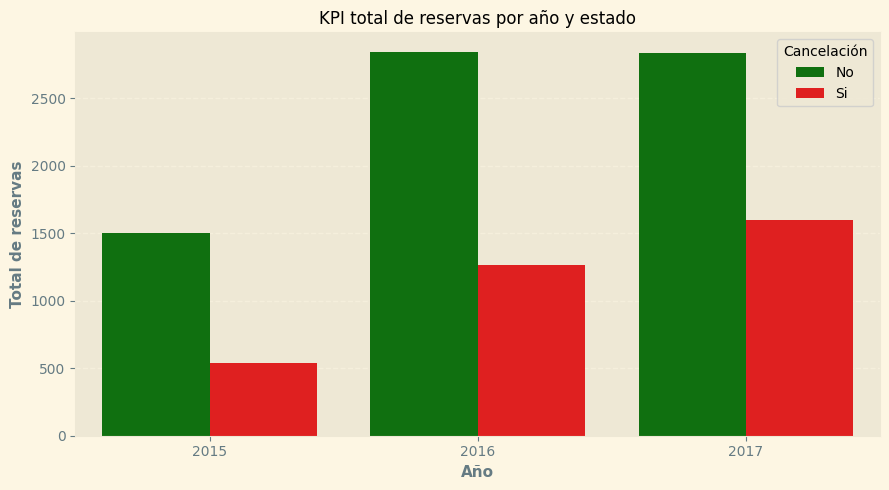

In [109]:
# Filtrar el DataFrame original df_reservas para incluir solo los meses de 'July' y 'August'
df_filt = df_reservas[df_reservas['arrival_date_month'].isin(['July', 'August'])]

# Calcular el total agrupando por año, mes de llegada y si la reserva fue cancelada o no
kpi_years = df_filt.groupby(['arrival_date_year', 'arrival_date_month', 'is_canceled']).size().reset_index(name='total')
kpi_years = kpi_years[kpi_years['total'] !=0].dropna()
kpi_years['is_canceled'].replace({1: 'Si', 0: 'No'}, inplace=True)

# Crear el gráfico
plt.figure(figsize=(figsize_default))
sns.barplot(x='arrival_date_year', y='total', hue='is_canceled',
            data=kpi_years, ci=None, palette = colores_no_si)

# Personalizar el gráfico
plt.title('KPI total de reservas por año y estado')
plt.xlabel('Año')
plt.ylabel('Total de reservas')
plt.legend(title='Cancelación', loc='upper right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

El análisis del indicador clave de rendimiento (KPI) de reservas revela un crecimiento significativo en el año 2016, donde se logró duplicar el número total de reservas concretadas, manteniendo este nivel en el año 2017 en comparación con el año base de 2015. Sin embargo, es importante destacar que las cancelaciones han experimentado un aumento constante a lo largo de los años. Este fenómeno merece una investigación más detallada para comprender sus causas subyacentes y tomar medidas correctivas adecuadas.

## Reservas

Exploración de las reservas, diferenciando entre cancelaciones, y examinando el país y región de origen de los huéspedes.

Clasificación de los 10 países con la mayor cantidad de reservas confirmadas por los huéspedes.

In [110]:
df = df_paises_reservas.sort_values(by='confirmadas', ascending=False).head(10)[['name', 'canceladas',
                                                                                'confirmadas','total_reservas']]
df.head(10).style.hide_index().background_gradient(cmap='Blues', subset=['confirmadas'])

name,canceladas,confirmadas,total_reservas
Portugal,9656.000000,17242.000000,26898.000000
United Kingdom,1983.000000,8326.000000,10309.000000
France,1731.000000,7068.000000,8799.000000
Spain,1856.000000,5347.000000,7203.000000
Germany,1051.000000,4312.000000,5363.000000
Ireland,663.000000,2321.000000,2984.000000
Italy,1073.000000,1962.000000,3035.000000
Belgium,409.000000,1646.000000,2055.000000
Netherlands,350.000000,1553.000000,1903.000000
United States,458.000000,1407.000000,1865.000000


Según los datos obtenidos del DataFrame, Portugal es el país con mayor número de reservas confirmadas. La mayoría de los demás países que se encuentran entre los 10 primeros con mayor número de reservas confirmadas son países de Europa occidental, con excepción de Brasil en el septimo lugar, China en el noveno y Estados Unidos en la decima posición.

Una forma diferente de comprender los resultados, es observar el mapa mundial de reservas por total de pasajeros. Este mapa muestra que la mayor cantidad de pasajeros provienen de Europa occidental, con Portugal a la cabeza como el principal generador de turistas de salida.


In [111]:
fig = px.scatter_mapbox(df_paises_reservas, lat="lat", lon="lon", hover_name="name",
                        zoom=1, height=300, size='total_pasajeros')

fig.update_layout(mapbox_style="open-street-map",
                  margin={"r": 0, "t": 0, "l": 0, "b": 0})

fig.show()

**Conclusión**: El gráfico permite ver la concentración del origen de los pasajeros, la misma permite identificar a Europa como el principal emisor de reservas en hoteles.

Distribución del total de reservas agrupadas por región geográfica, contemplando la diferenciación entre canceladas y confirmadas.

In [112]:
df_paises_reservas.groupby('region')[['total_reservas',
                                      'canceladas',
                                      'confirmadas']].sum().reset_index().sort_values(by='total_reservas',
                                                                                      ascending=False)

,region,total_reservas,canceladas,confirmadas
4,Europe,76415.0,20710.0,55705.0
1,Americas,4459.0,1326.0,3133.0
3,Asia,3598.0,1242.0,2356.0
0,Africa,1012.0,451.0,561.0
5,Oceania,445.0,97.0,348.0
2,Antarctic,3.0,0.0,3.0


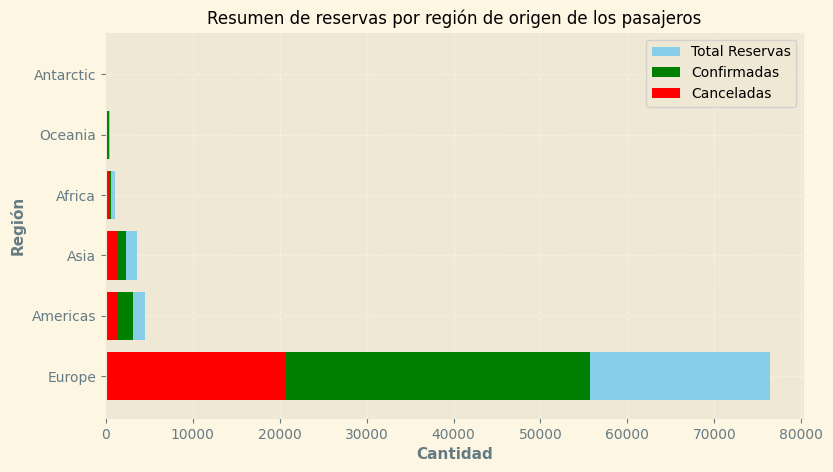

In [113]:
# Agrupar por región y sumar las reservas
df_resumen = df_paises_reservas.groupby('region')[['total_reservas', 'canceladas', 'confirmadas']].sum().reset_index().sort_values(by='total_reservas', ascending=False)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(figsize_default))
plt.barh(df_resumen['region'], df_resumen['total_reservas'], color='skyblue', label='Total Reservas')
plt.barh(df_resumen['region'], df_resumen['confirmadas'], color='green', label='Confirmadas')
plt.barh(df_resumen['region'], df_resumen['canceladas'], color='red', label='Canceladas')

plt.xlabel('Cantidad')
plt.ylabel('Región')
plt.title('Resumen de reservas por región de origen de los pasajeros')
plt.legend()
plt.show()

Utilizando este último gráfico de barras, se ha podido discernir la necesidad de enfocar esfuerzos en la penetración de los mercados asiáticos y americanos con miras a incrementar su presencia en futuras estrategias. De manera reveladora, se constata una equitativa proporción de indicadores entre reservas concretadas y canceladas en estos dos continentes, evidenciando la complejidad y la igualdad de oportunidades en dichos mercados.

**Conclusiones**

1. A pesar de que los europeos lideran en número de reservas, es importante destacar que también son los responsables de una proporción significativa de cancelaciones.

2. Europa se posiciona como el principal mercado emisor de turistas, dominando el ranking con una abrumadora representación del 90%.

3. Existe una brecha considerable entre el país líder en emisión de turistas y el segundo clasificado, con el líder triplicando la cantidad de visitantes.

4. El análisis del Average Daily Rate (ADR) en relación con el Total de Pasajeros revela la presencia de valores atípicos. A pesar de ello, se observa una estabilidad en el valor cuando el número de pasajeros por reserva es inferior a 10. Se sugiere investigar más a fondo las razones detrás de estas fluctuaciones.

## Cancelaciones

Ranking Top 10 de paises con mayor número de cancelaciones


In [114]:
df = df_paises_reservas.sort_values(by='canceladas', ascending=False).head(10)[['name', 'canceladas',
                                                                                'confirmadas','total_reservas']]
df.head(10).style.hide_index().background_gradient(cmap='Reds', subset=['canceladas'])

name,canceladas,confirmadas,total_reservas
Portugal,9656.000000,17242.000000,26898.000000
United Kingdom,1983.000000,8326.000000,10309.000000
Spain,1856.000000,5347.000000,7203.000000
France,1731.000000,7068.000000,8799.000000
Italy,1073.000000,1962.000000,3035.000000
Germany,1051.000000,4312.000000,5363.000000
Brazil,726.000000,1258.000000,1984.000000
Ireland,663.000000,2321.000000,2984.000000
China,617.000000,1283.000000,1900.000000
United States,458.000000,1407.000000,1865.000000


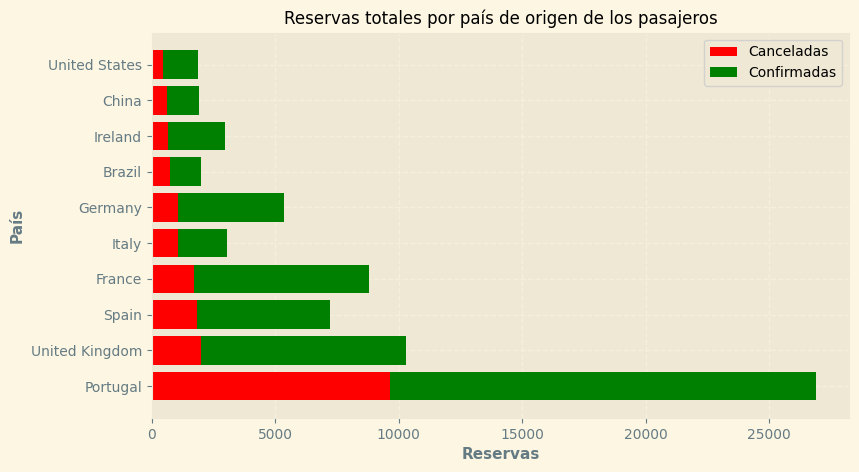

In [115]:
plt.figure(figsize=(figsize_default))
plt.barh(df['name'], df['canceladas'], label='Canceladas', color='red')
plt.barh(df['name'], df['confirmadas'], left=df['canceladas'], label='Confirmadas', color='green')

plt.xlabel('Reservas')
plt.ylabel('País')
plt.title('Reservas totales por país de origen de los pasajeros')
plt.legend()
plt.show()

Se identifican países con una tasa negativa de confirmación de reservas, indicando una proporción en la que las cancelaciones superan a las reservas confirmadas por los huéspedes.

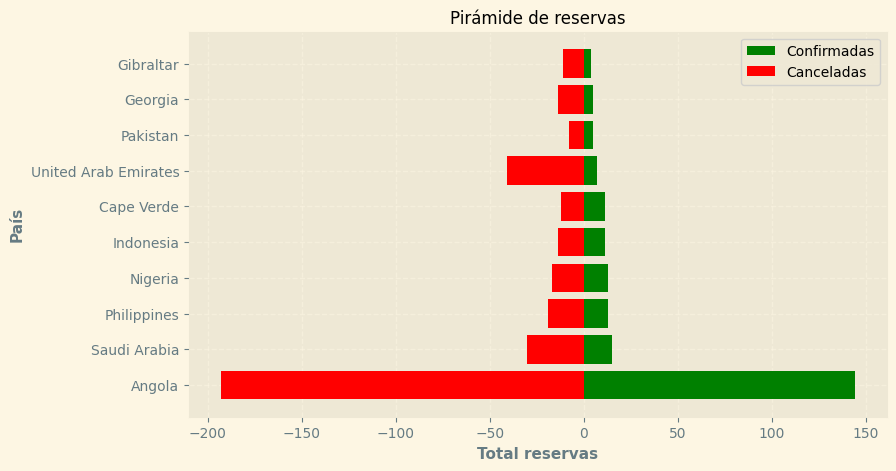

In [116]:
df_ratio =  df_paises_reservas[df_paises_reservas['canceladas'] - df_paises_reservas['confirmadas'] >0].head(10)

paises = df_ratio['name']
confirmadas = df_ratio['confirmadas']
cancelaciones = df_ratio['canceladas']

# Crear el gráfico de pirámide de población
plt.figure(figsize=(figsize_default))

plt.barh(paises, confirmadas, color='green', label='Confirmadas')
plt.barh(paises, [-x for x in cancelaciones], color='red', label='Canceladas')

# Personalización del gráfico
plt.xlabel('Total reservas')
plt.ylabel('País')
plt.title('Pirámide de reservas')
plt.legend()
plt.grid(True)
plt.show()

Se identifican países con una tasa negativa de confirmación de reservas, indicando una proporción en la que las cancelaciones superan a las reservas confirmadas por los huéspedes.

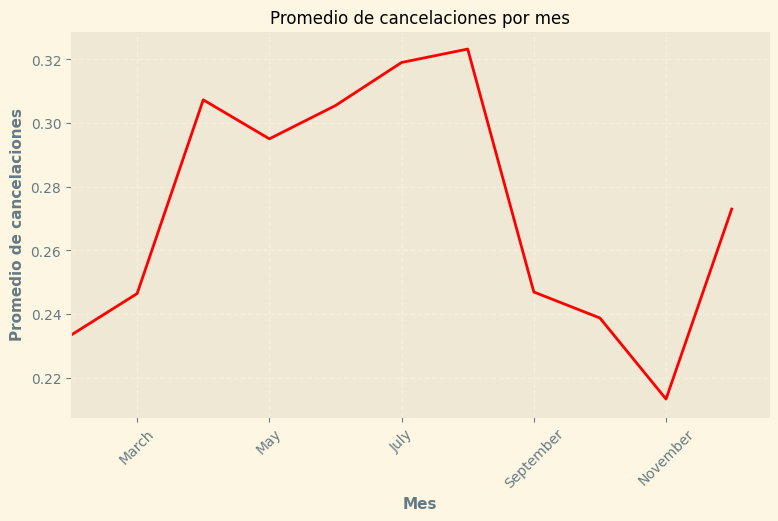

In [117]:
df_reservas['arrival_date_month'] = pd.Categorical(df_reservas['arrival_date_month'],
                                                   categories=orden_meses.keys(),
                                                   ordered=True)
df_reservas = df_reservas.sort_values('arrival_date_month')

df_cancelaciones_por_mes = df_reservas.groupby('arrival_date_month')['is_canceled'].mean().copy()

plt.figure(figsize=(figsize_default))
df_cancelaciones_por_mes.plot(kind='line', color='red')
plt.title('Promedio de cancelaciones por mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de cancelaciones')
plt.xticks(rotation=45)
plt.xlim(left=1)
plt.show()

Si bien la disponibilidad de datos se limita a años calendario incompletos, se seleccionaron los meses de julio y agosto para realizar un análisis comparativo. Esta elección se basa en que estos meses presentan características comparables en términos de observaciones completas.



**Conclusiones**


* Considerando que la muestra no abarca años calendario completos, es fundamental reconocer que este análisis es puramente descriptivo y no puede extrapolarse como un reflejo absoluto de la realidad.

* Se observa que, en promedio, la mayor cantidad de cancelaciones ocurre durante los meses de abril a agosto, señalando un período de mayor volatilidad en las reservas.

* Por otro lado, entre los meses de septiembre y noviembre, se aprecia una disminución en el número de cancelaciones, evidenciando una tendencia a la estabilidad durante este período.


## Tiempo de demora

Relación entre la variable '**lead_time**' y la variable '**is_canceled**' cuando no es una cancelación.

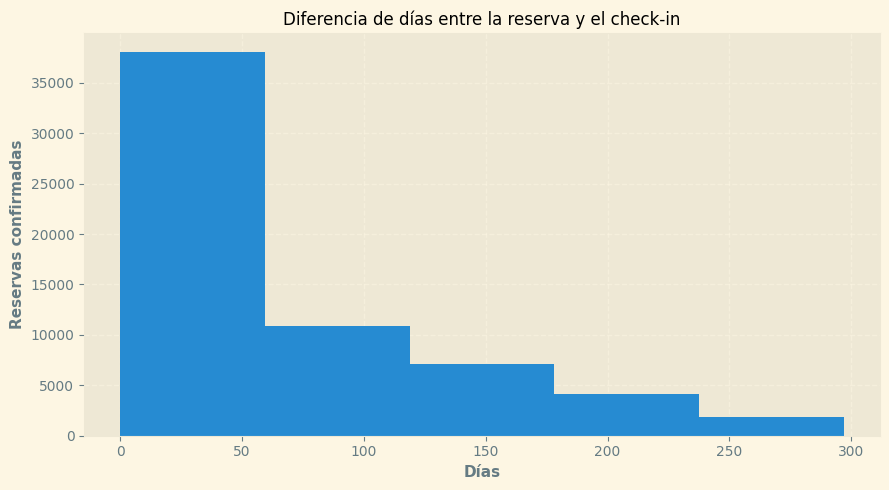

In [118]:
df_histograma = df_reservas[df_reservas['is_canceled'] == 0][['is_canceled', 'lead_time']].copy()

fig, ax = plt.subplots(figsize=(figsize_default))
ax.hist(x= df_histograma['lead_time'], bins= 5, density=False, orientation='vertical')
ax.set_xlabel('Días')
ax.set_ylabel('Reservas confirmadas')
ax.set_title('Diferencia de días entre la reserva y el check-in')
plt.tight_layout()
plt.show()

**Conclusiones**

El análisis del DataFrame muestra que el 75% de las reservas se utilizan dentro de los 112 días posteriores a su creación. La media de días para efectivizar una reserva es de 71. Podemos determinar que la mayor cantidad de reservas, son para viajes espontaneos o con escasa planificación de largo plazo.


*   Más de la mitad de las reservas tienen un tiempo de espera menor a los 90 días.
*   Pocas reservas que se ejecutan, superan el año de antelación, por lo cual se infiere que pocas personas planifican sus reservas con más de seis meses de antelación.
*   Se detectan valores outliers cuando el tiempo de arribo supera los 300 días de diferencia entre la reserva y el check-in.

## Distribución de adultos-mes de reserva

Determinar la relación entre las variables '**mes_arribo_numero**', '**adults**' y '**adr**'.


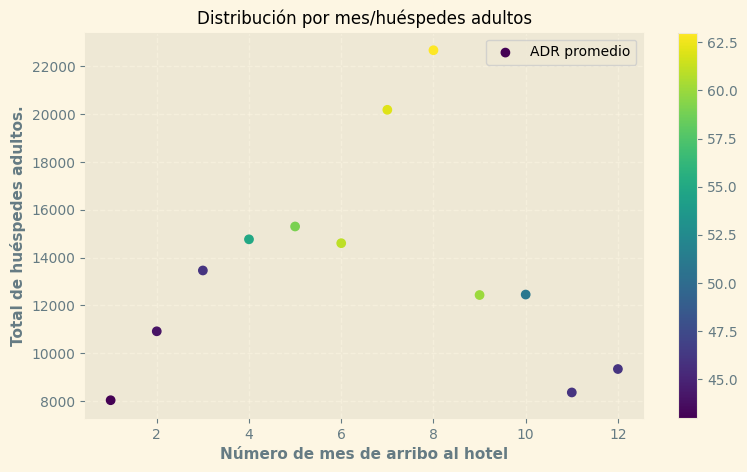

In [119]:
fig, ax = plt.subplots(figsize=(figsize_default))

# Agrupar por 'mes_arribo_numero' y sumar 'adults' y calcular la media de 'adr'
df_distribucion = df_reservas.groupby('mes_arribo_numero')[['adults', 'adr']].sum().reset_index()
df_distribucion['promedio'] = (df_distribucion['adr'] / df_distribucion['adults']).round(0)

# Graficar la dispersión y asignar el mapeo de colores
mapeo_colores = ax.scatter(df_distribucion['mes_arribo_numero'], df_distribucion['adults'],
                           c=df_distribucion['promedio'], alpha=1, label="ADR promedio")
fig.colorbar(mapeo_colores, ax=ax)

# Mostrar la leyenda
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))

# Establecer título y etiquetas de los ejes
ax.set_title('Distribución por mes/huéspedes adultos')
ax.set_xlabel('Número de mes de arribo al hotel')
ax.set_ylabel('Total de huéspedes adultos.')

plt.show()


**Conclusiones**

* Al analizar la distribución del total de adultos por mes de arribo y valor del ADR, se observa que los importes más bajos se registran durante el fin del otoño europeo y el comienzo del invierno, comprendiendo los meses entre **noviembre** y **enero**.

* En febrero comienza a subir el valor promedio del ADR, ya que comienza la primavera en **Europa**.

*   El ADR se ve influenciado dado el mayor número de huéspedes, pero aún más cuando se trata de los meses de **julio** y **agosto**, especialmente.
*   Los meses septiembre y octubre, parecen ser meses en donde se realizan reservas para grupos mayores a 20 huspedes por reserva.


## Relación ADR-Mes/Año de arribo

Busca la relación entre el promedio de la característica 'ADR' y las características '**arrival_date_year**' y '**arrival_date_month**'.


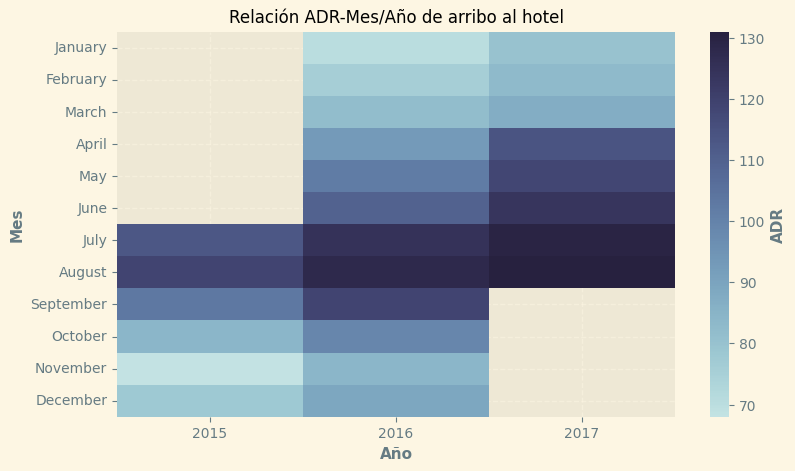

In [120]:
# Calcular el promedio de adr por año y mes
df_totales_year_month = df_reservas.groupby(['arrival_date_year', 'arrival_date_month'])['adr'].mean().reset_index()
df_totales_year_month['adr'] = df_totales_year_month['adr'].round(0)

# Pivotear los datos para el gráfico de calor
df_totales_year_month = df_totales_year_month.pivot(index="arrival_date_month",
                                                    columns="arrival_date_year",
                                                    values="adr")

plt.figure(figsize=(figsize_default))
sns.heatmap(df_totales_year_month, cmap=sns.color_palette("ch:start=.2,rot=-.3",
                                                          as_cmap=True))

plt.xlabel("Año")
plt.ylabel("Mes")
plt.title("Relación ADR-Mes/Año de arribo al hotel")

colorbar = plt.gca().collections[0].colorbar
colorbar.set_label('ADR')

plt.show()

Gracias a este análisis, se logra apreciar que existen datos acotados en el dataframe para ser comparados en mayor detalle, pudiendo ser por mes, día o semana. Los meses de julio y agosto tienen tres períodos de datos completos.

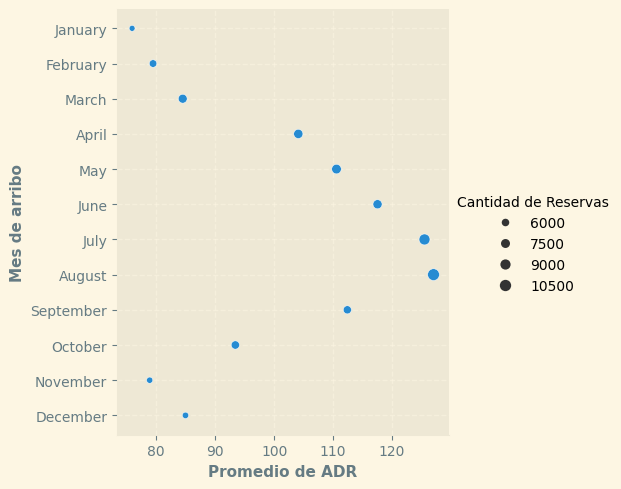

In [121]:
# Agrupar por mes de llegada y calcular cantidad de reservas y promedio de ADR
df_agrupado = df_reservas.groupby('arrival_date_month').agg({'hotel': 'count', 'adr': 'mean'}).reset_index()
df_agrupado = df_agrupado.rename(columns={'hotel': 'Cantidad de Reservas', 'adr': 'Promedio de ADR'})

g = sns.relplot(data=df_agrupado, x="Promedio de ADR", y="arrival_date_month",
                size="Cantidad de Reservas", legend="auto", height=5)

g.set_axis_labels("Promedio de ADR", "Mes de arribo")
plt.show()

Se asume una relación causal entre el aumento de las reservas y los valores de ADR (Average Daily Rate) abonados por los huéspedes en el mes de agosto, así como entre la temporada de noviembre a enero y la menor cantidad de reservas totales. Se comprueban los meses de julio y agosto como los de mayor ADR-total reservas.

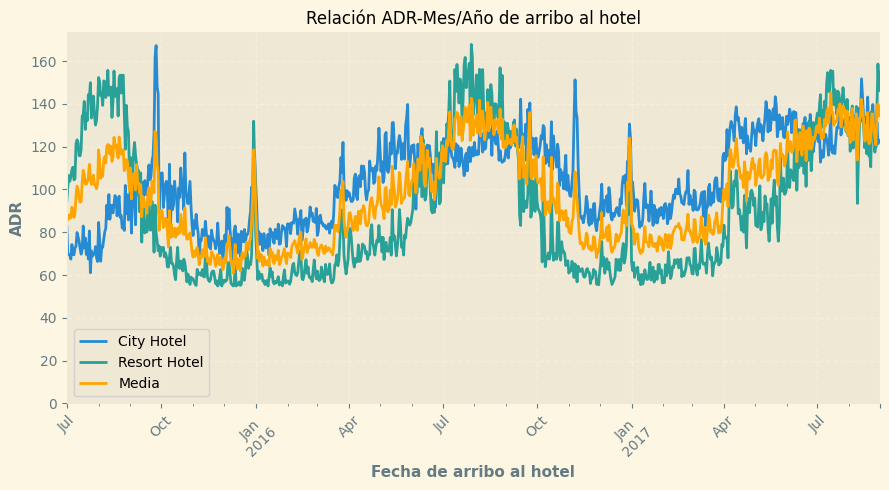

In [122]:
# Calcular la media por fecha
df_arribo_hoteles = df_reservas.pivot_table(index=['fecha_arribo'],
                                            columns='hotel', values='adr',
                                            aggfunc='mean')
media_por_fecha = df_arribo_hoteles.mean(axis=1)

# Crear el gráfico de línea
ax = df_arribo_hoteles.plot(kind='line', figsize=(figsize_default),
                            title='Relación ADR-Mes/Año de arribo al hotel')

# Graficar la línea de media
media_por_fecha.plot(ax=ax, color='orange', linestyle='-',
                     label='Media')

# Ocultar las espinas superior y derecha
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Establecer el límite inferior del eje Y en cero
plt.ylim(0, plt.ylim()[1])

plt.xlabel("Fecha de arribo al hotel")
plt.ylabel("ADR")

# Ajustar las etiquetas
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico con leyenda
plt.legend()
plt.show()

Los valores promedio de ADR abonados en hoteles resorts, suelen ser más altos durante julio, mientras que los valores más altos para hoteles de ciudad se encuentran destacados al alza entre abril-mayo. Quienes dispongan de tiempo de vacaciones durante enero hasta abril, podrán disfrutar de hoteles resorts con valores por debajo de la media.

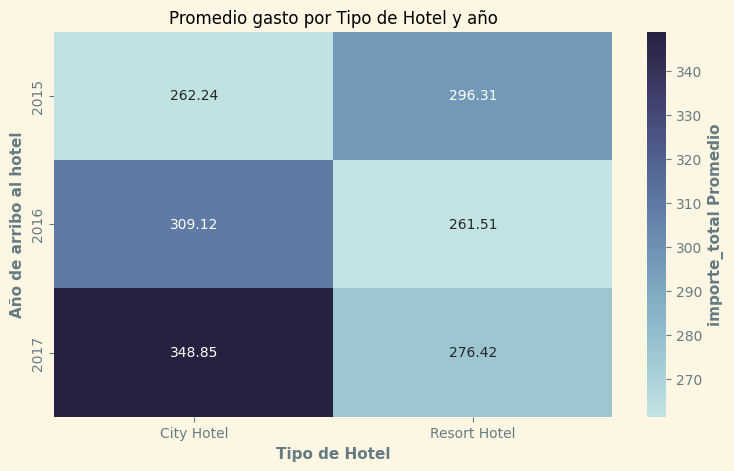

In [123]:
# Calcular el promedio del gasto total por combinación de tipo de hotel
df_adr_avg = df_reservas.groupby(['hotel', 'arrival_date_year']).mean()['importe_total'].unstack()

# Invertir el DataFrame
df_adr_avg = df_adr_avg.T

# Plotear el heatmap
plt.subplots(figsize=(figsize_default))
sns.heatmap(df_adr_avg,  cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True),
            annot=True, fmt=".2f", cbar_kws={'label': 'importe_total Promedio'})


plt.xlabel('Tipo de Hotel')
plt.ylabel('Año de arribo al hotel')
plt.title('Promedio gasto por Tipo de Hotel y año')
plt.show()

Las reservas realizadas con el tipo de depósito 'no reembolsable' muestran un ahorro significativo en el presupuesto de alojamiento. En promedio, estas reservas son un 18% más económicas para los hoteles en la ciudad y un 41.3% más económicas para los hoteles resort. Esto representa una oportunidad valiosa para aquellos que tienen certeza sobre su plan de viaje y desean optimizar sus gastos en hospedaje.

## Noches de estadía y servicio de comida

Se analiza la relación entre la características '**grupo_pasajeros**', '**total_pasajeros**', '**mes_arribo_numero**' y '**total_estadia**'.

Además, se busca establecer la relación entre '**meal**' y '**customer_type**'.

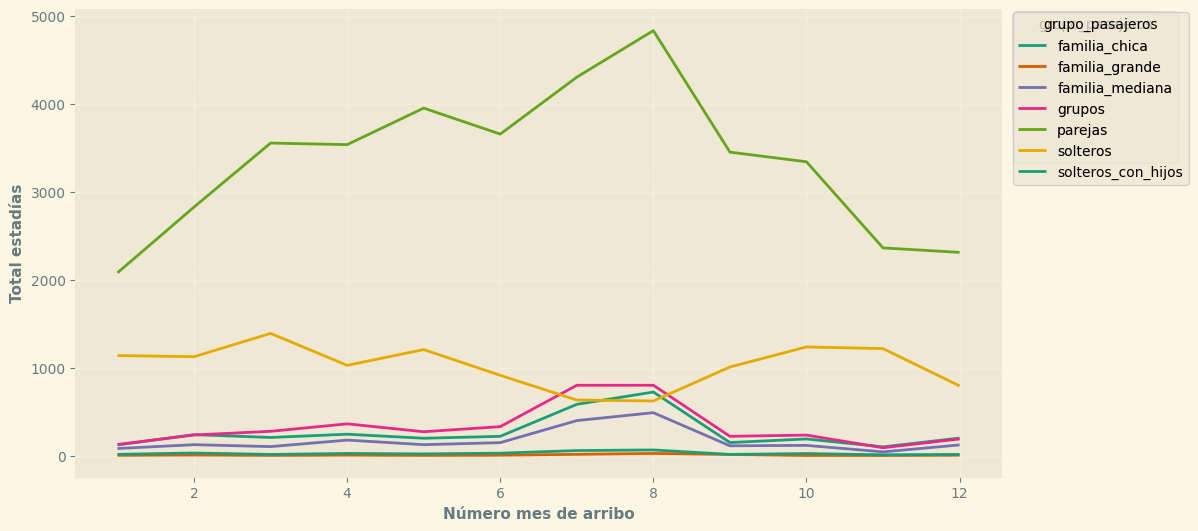

In [124]:
# Busca que sean reservas confirmadas
df_noches = df_reservas[df_reservas['is_canceled'] == 0][['mes_arribo_numero', 'total_estadia',
                                                           'total_pasajeros' , 'grupo_pasajeros']]

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['mes_arribo_numero']
                .value_counts()
              .reset_index(name='Total estadías')
              .rename({'index': 'mes_arribo_numero'}, axis=1)
              .sort_values('mes_arribo_numero', ascending=True))
  xs = counted['mes_arribo_numero']
  ys = counted['Total estadías']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_noches.sort_values('mes_arribo_numero', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('grupo_pasajeros')):
  _plot_series(series, series_name, i)
  fig.legend(title='grupo_pasajeros', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Número mes de arribo')
_ = plt.ylabel('Total estadías')

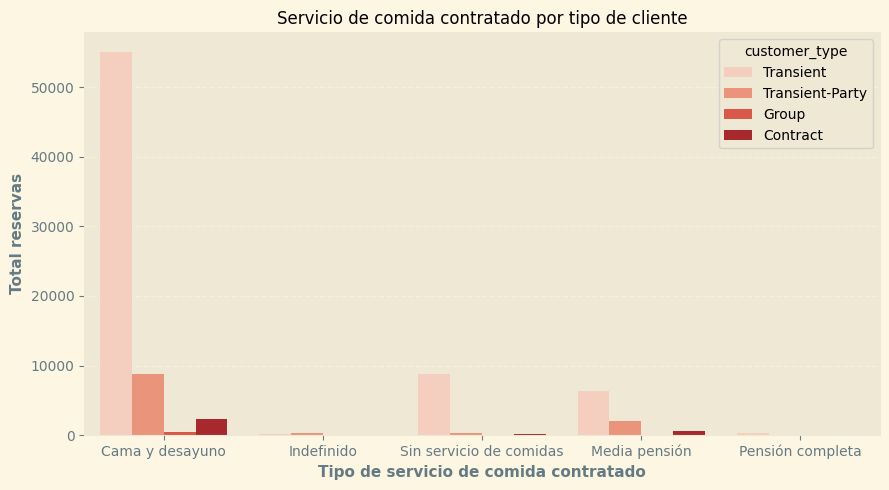

In [125]:
df_meals = df_reservas[['customer_type', 'meal']].copy()

sns.countplot(data= df_meals, x="meal", hue="customer_type", palette="Reds")
plt.xlabel("Tipo de servicio de comida contratado")
plt.ylabel("Total reservas")
plt.title('Servicio de comida contratado por tipo de cliente')
plt.tight_layout()
plt.show()

"Busca calcular el valor promedio pagado por los huéspedes según el tipo de habitación asignada y el ADR (Average Daily Rate) promedio."

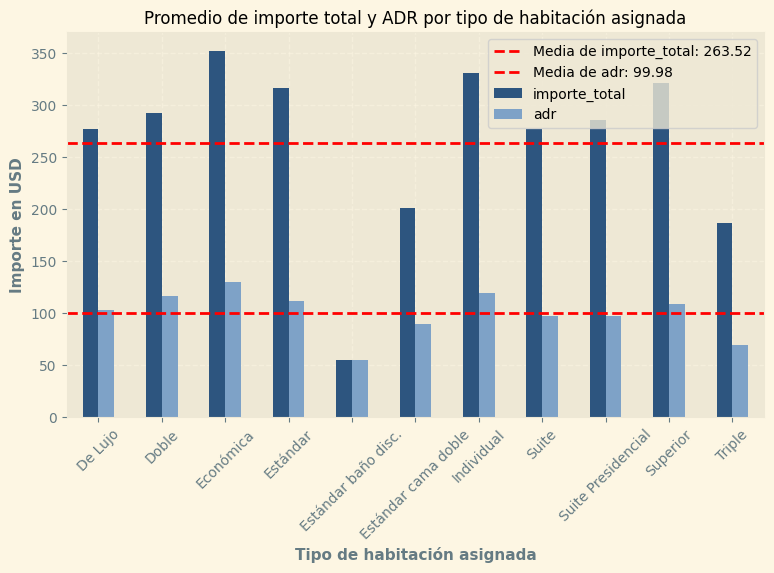

In [126]:
# Calcular la media para importe_total y adr
df_rooms = df_reservas[['assigned_room_type', 'importe_total', 'adr', 'total_pasajeros']]\
.groupby(['assigned_room_type']).agg({'importe_total': 'mean', 'adr': 'mean'}).reset_index()

# Definir colores personalizados
colors = [color_barra_city, color_barra_resort]

# Graficar los datos con colores personalizados y líneas de media
ax = df_rooms.plot(kind='bar', x='assigned_room_type', y=['importe_total', 'adr'],
                   stacked=False, figsize=(figsize_default), color=colors)

# Agregar líneas de media
for col in ['importe_total', 'adr']:
    mean_value = df_rooms[col].mean()
    ax.axhline(mean_value, color='r', linestyle='--', label=f'Media de {col}: {mean_value:.2f}')

plt.title('Promedio de importe total y ADR por tipo de habitación asignada')
plt.xlabel('Tipo de habitación asignada')
plt.ylabel('Importe en USD')
plt.xticks(rotation=45)
plt.legend()

plt.show()


El valor de una habitación económica, se encuentra por encima de la media, pero resulta ser la que genera mayores ingresos.

Los pasajeros en tránsito, es decir, aquellos que se hospedarán por períodos cortos, muestran una clara preferencia por un servicio económico, optando principalmente por el desayuno únicamente. La pensión completa no parece ser una elección muy común en ninguno de los grupos analizados.

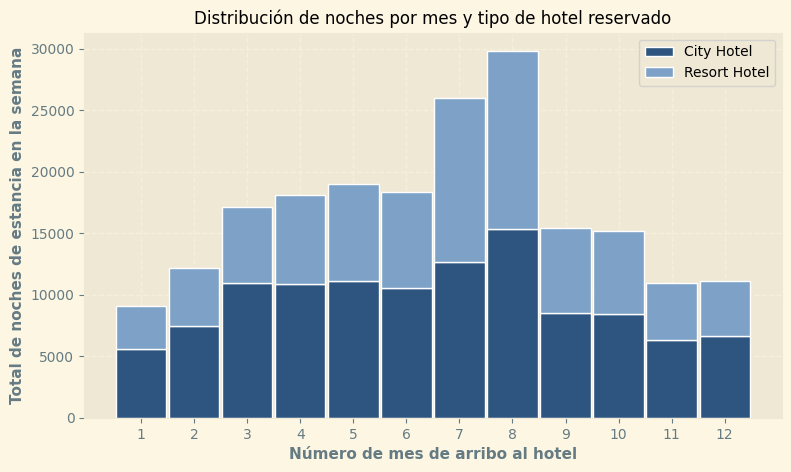

In [127]:
# Agrupar por mes de arribo y tipo de hotel, y sumar las noches de estancia en días de semana
df_agrupado = df_reservas.groupby(['mes_arribo_numero', 'hotel'])['stays_in_week_nights'].sum().reset_index()

# Pivotar los datos para tener un formato adecuado para el gráfico de barras
df_pivotado = df_agrupado.pivot(index='mes_arribo_numero',
                                columns='hotel',
                                values='stays_in_week_nights').reset_index()

fig, ax = plt.subplots()
plt.rcParams['axes.labelweight'] = 'bold'

# Definir las variables para las barras
bars1 = df_pivotado['City Hotel']
bars2 = df_pivotado['Resort Hotel']
r = df_pivotado['mes_arribo_numero']
barWidth = 0.95

plt.bar(r, bars1, color= color_barra_city, edgecolor='white', width=barWidth, label='City Hotel')
plt.bar(r, bars2, bottom=bars1, color= color_barra_resort, edgecolor='white', width=barWidth, label='Resort Hotel')

plt.xlabel("Número de mes de arribo al hotel")
plt.ylabel("Total de noches de estancia en la semana")
plt.xticks(r, df_pivotado['mes_arribo_numero'])
plt.legend()
plt.title('Distribución de noches por mes y tipo de hotel reservado')
plt.show()

Dado que existe una falta de datos completos para los años analizados, es importante destacar que los meses correspondientes al verano europeo muestran la mayor demanda de noches en ambos tipos de hoteles.

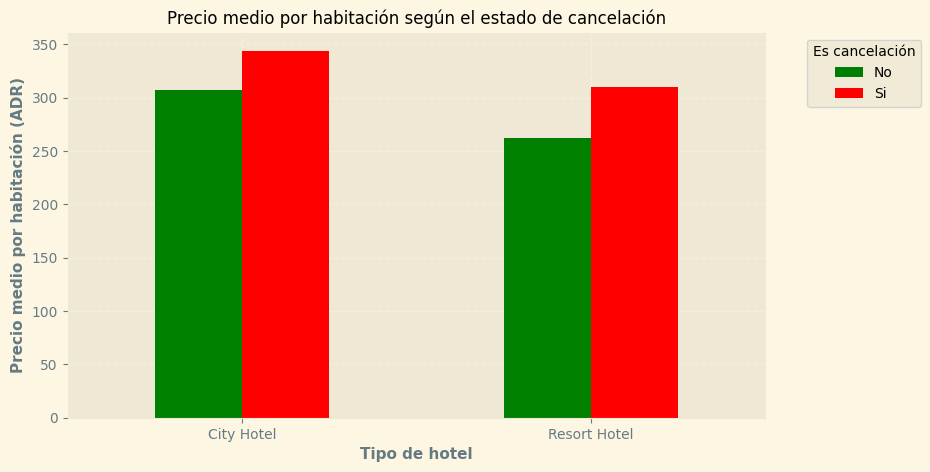

In [128]:
df_adr = df_reservas[['is_canceled', 'importe_total','hotel']]

df_adr_grouped = df_adr.groupby(['is_canceled', 'hotel'])['importe_total'].mean().unstack()
df_adr_grouped.rename(index={0: 'No', 1: 'Si'}, inplace=True)

# Transponer los datos
df_adr_grouped = df_adr_grouped.T

# Graficar los datos con colores personalizados
ax = df_adr_grouped.plot(kind='bar', stacked=False, figsize=(figsize_default), color = colores_no_si)

plt.xlabel('Tipo de hotel')
plt.ylabel('Precio medio por habitación (ADR)')
plt.title('Precio medio por habitación según el estado de cancelación')
plt.xticks(rotation=0)

# Mover la leyenda fuera del gráfico
plt.legend(title='Es cancelación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [129]:
# Calculo la linea base del valor promedio de cada tipo de habitación
df_mean_rooms =df_rooms.groupby(['assigned_room_type'])['adr'].mean().reset_index()
df_mean_rooms.sort_values(by='adr', ascending=False)

,assigned_room_type,adr
2,Económica,130.436456
6,Individual,119.154147
1,Doble,116.604846
3,Estándar,111.903104
9,Superior,108.884970
0,De Lujo,103.348634
7,Suite,97.859859
8,Suite Presidencial,97.428126
5,Estándar cama doble,89.656825
10,Triple,69.648275


**Conclusiones**

*   Cuando la reserva se realiza sin deposito inicial, el valor promedio de ADR es mayor en las cancelaciones, al igual que si realiza con la opción de reembolso.
*   Julio y agosto son los meses donde más noches de semana del tipo hotel resort se realizan.
*   El servicio de comida más solicitado por el tipo de cliente en tránsito (eventual), es el servicio que únicamente incluye desayuno (BB).

## Pasajeros

Realiza un análisis de los pasajeros de las reservas, utilizando las nuevas características que fueron generadas durante el proceso de ingeniería de características para identificar la segmentación en grupos de pasajeros.

In [130]:
df_pasajeros = df_reservas.groupby('grupo_pasajeros').size().apply(lambda x: 100 * x / len(df_reservas))
df_pasajeros.sort_values(ascending=False)

grupo_pasajeros
parejas               65.302845
solteros              17.826264
grupos                 6.976203
familia_chica          5.202770
familia_mediana        4.070518
solteros_con_hijos     0.502706
familia_grande         0.118694
dtype: float64

Vemos que dos grupos componen el ~84 % de todas las reservas del dataframe.

Calcula el porcentaje de reservas por grupo de pasajeros y tipo de hotel.

In [131]:
# Agrupa las reservas por tipo de hotel y calcula el porcentaje correspondiente a cada uno.
df_pasajeros_hoteles = df_reservas.groupby('grupo_pasajeros').agg(
    hotel_Resort_Hotel=pd.NamedAgg(column='hotel', aggfunc=lambda x: 100 * len(x[x == 'Resort Hotel']) / len(x)),
    hotel_City_Hotel=pd.NamedAgg(column='hotel', aggfunc=lambda x: 100 * len(x[x == 'City Hotel']) / len(x)),
)
df_pasajeros_hoteles

,hotel_Resort_Hotel,hotel_City_Hotel
grupo_pasajeros,,
familia_chica,37.396556,62.603444
familia_grande,25.490196,74.509804
familia_mediana,46.397942,53.602058
grupos,23.636364,76.363636
parejas,40.912007,59.087993
solteros,37.038971,62.961029
solteros_con_hijos,30.787037,69.212963


Realiza un gráfico de barras agrupadas mostrando como se distribuyen (en porcentajes) las reservas según el tipo de hotel y el grupo de pasajeros.

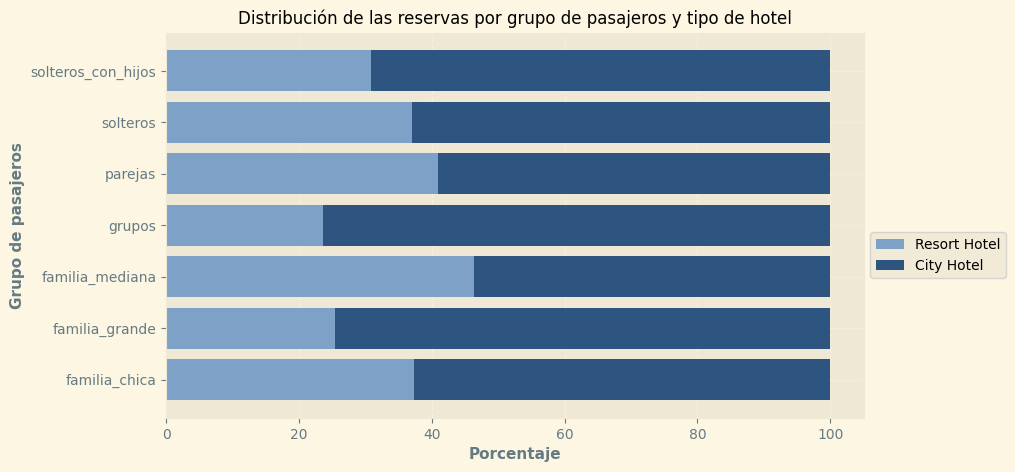

In [132]:
plt.barh(df_pasajeros_hoteles.index, df_pasajeros_hoteles['hotel_Resort_Hotel'],
         color= color_barra_resort, label='Resort Hotel')
plt.barh(df_pasajeros_hoteles.index, df_pasajeros_hoteles['hotel_City_Hotel'],
         left=df_pasajeros_hoteles['hotel_Resort_Hotel'],
         color= color_barra_city, label='City Hotel')

plt.xlabel('Porcentaje')
plt.ylabel('Grupo de pasajeros')
plt.title('Distribución de las reservas por grupo de pasajeros y tipo de hotel')

# Mostrar la leyenda fuera del gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

Se observa una tendencia predominante de reservas en hoteles tipo 'ciudad' en la mayoría de los grupos de pasajeros, destacándose un equilibrio particularmente en el grupo de 'familias medianas'.

Se busca establecer la relación entre el valor ADR (Average Daily Rate) y el importe total abonado por cada grupo de pasajeros, con el fin de identificar patrones y tendencias en el gasto por alojamiento según las características de los pasajeros.

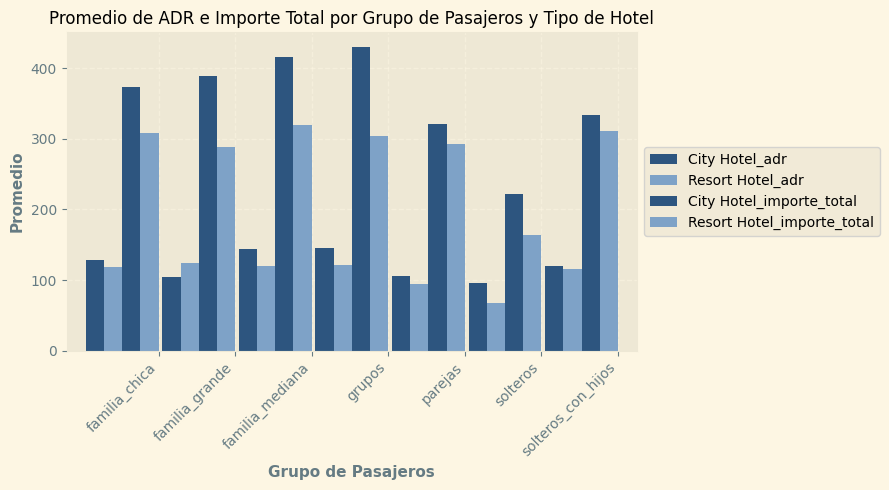

In [133]:
# Definir el ancho de las barras
bar_width = 0.95

# Crear tablas pivote para promedio de ADR y importe total por grupo de pasajeros y tipo de hotel
df_pasajeros = df_reservas.pivot_table(index='grupo_pasajeros', columns='hotel', values=['adr', 'importe_total'], aggfunc='mean')

# Renombrar columnas para mayor claridad
df_pasajeros.columns = ['{}_{}'.format(col[1], col[0]) for col in df_pasajeros.columns]

# Resetear el índice para que 'grupo_pasajeros' sea una columna
df_pasajeros = df_pasajeros.reset_index()

# Configurar los colores de las barras para cada tipo de hotel
colores = [color_barra_city, color_barra_resort]

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(figsize_default))

# Graficar las barras agrupadas con colores personalizados
df_pasajeros.plot(kind='bar', ax=ax, width=bar_width, color=colores)

# Añadir etiquetas y título
ax.set_xlabel('Grupo de Pasajeros')
ax.set_ylabel('Promedio')
ax.set_title('Promedio de ADR e Importe Total por Grupo de Pasajeros y Tipo de Hotel')

# Establecer las marcas y etiquetas del eje x
index = [pos + bar_width / 2 for pos in range(len(df_pasajeros))]
ax.set_xticks(index)
ax.set_xticklabels(df_pasajeros['grupo_pasajeros'])

# Mostrar la leyenda fuera del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Rotar las etiquetas del eje X para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


* Tras completar este análisis, se evidencia que el segmento '**solteros**' es el que más se beneficia al seleccionar hoteles de tipo resort, ya que registran el valor promedio de ADR más bajo, a pesar de gastar en promedio menos que cuando eligen un hotel de ciudad.
* Dentro de la categoría de '**solteros**', aquellos sin hijos presentan un promedio de gasto aproximadamente la mitad en comparación con su estadía en hoteles resort.

Muestra como están distribuidas las reservas, según la nueva característica '**grupo_pasajeros**'.

In [134]:
# Calcular el total de cancelaciones por segmento de mercado
df_cancelaciones_por_grupo = df_reservas.groupby(['grupo_pasajeros', 'is_canceled']).size().unstack()
df_cancelaciones_por_grupo['total']  = df_cancelaciones_por_grupo[0] + df_cancelaciones_por_grupo[1]

df_cancelaciones_por_grupo["%_no_canceladas"] = round((df_cancelaciones_por_grupo[0] * 100) / df_cancelaciones_por_grupo['total'],0)
df_cancelaciones_por_grupo["%_canceladas"] = round((df_cancelaciones_por_grupo[1] * 100) / df_cancelaciones_por_grupo['total'], 0)

# Reorganizar las columnas y resetear el índice
df_cancelaciones_por_grupo = df_cancelaciones_por_grupo.reset_index()[['grupo_pasajeros', '%_canceladas', '%_no_canceladas']]

df_cancelaciones_por_grupo

is_canceled,grupo_pasajeros,%_canceladas,%_no_canceladas
0,familia_chica,29.0,71.0
1,familia_grande,25.0,75.0
2,familia_mediana,42.0,58.0
3,grupos,34.0,66.0
4,parejas,28.0,72.0
5,solteros,20.0,80.0
6,solteros_con_hijos,27.0,73.0


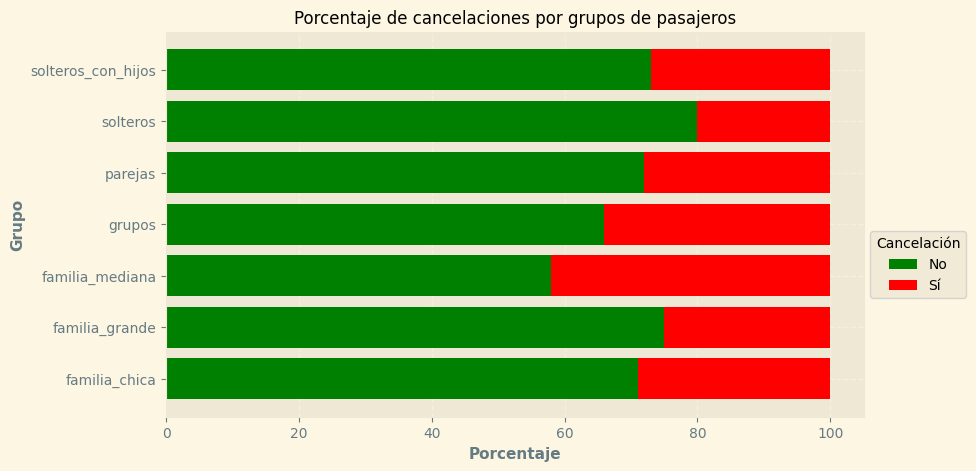

In [135]:
# Muestra el porcentaje de distribución de las reservas según estado y segmento de mercado
# Crear el gráfico de pirámide de población
plt.figure(figsize=(figsize_default))

plt.barh(df_cancelaciones_por_grupo.grupo_pasajeros, df_cancelaciones_por_grupo['%_no_canceladas'],
         color= 'green', label='No')

plt.barh(df_cancelaciones_por_grupo.grupo_pasajeros, df_cancelaciones_por_grupo['%_canceladas'],
         left=df_cancelaciones_por_grupo['%_no_canceladas'],
         color= 'red', label='Sí')

# Añadir título y etiquetas de los ejes
plt.title('Porcentaje de cancelaciones por grupos de pasajeros')
plt.xlabel('Porcentaje')
plt.ylabel('Grupo')

# Mostrar la leyenda fuera del gráfico
plt.legend(title='Cancelación' ,loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

Observaciones

## Segmento de mercado

Según el segmento de mercado al que pertenecen las observaciones, como están distribuidas las cancelaciones y las reservas confirmadas.

In [136]:
# Calcular el total de cancelaciones por segmento de mercado
df_cancelaciones_por_segmento = df_reservas.groupby(['market_segment', 'is_canceled']).size().unstack()
df_cancelaciones_por_segmento['total']  = df_cancelaciones_por_segmento[0] + df_cancelaciones_por_segmento[1]

df_cancelaciones_por_segmento["%_no_canceladas"] = round((df_cancelaciones_por_segmento[0] * 100) / df_cancelaciones_por_segmento['total'],0)
df_cancelaciones_por_segmento["%_canceladas"] = round((df_cancelaciones_por_segmento[1] * 100) / df_cancelaciones_por_segmento['total'], 0)

# Reorganizar las columnas y resetear el índice
df_cancelaciones_por_segmento = df_cancelaciones_por_segmento.reset_index()[['market_segment', '%_canceladas', '%_no_canceladas']]

df_cancelaciones_por_segmento

is_canceled,market_segment,%_canceladas,%_no_canceladas
0,Corporate,12.0,88.0
1,Direct,15.0,85.0
2,Groups,27.0,73.0
3,Offline TA/TO,15.0,85.0
4,Online TA,35.0,65.0


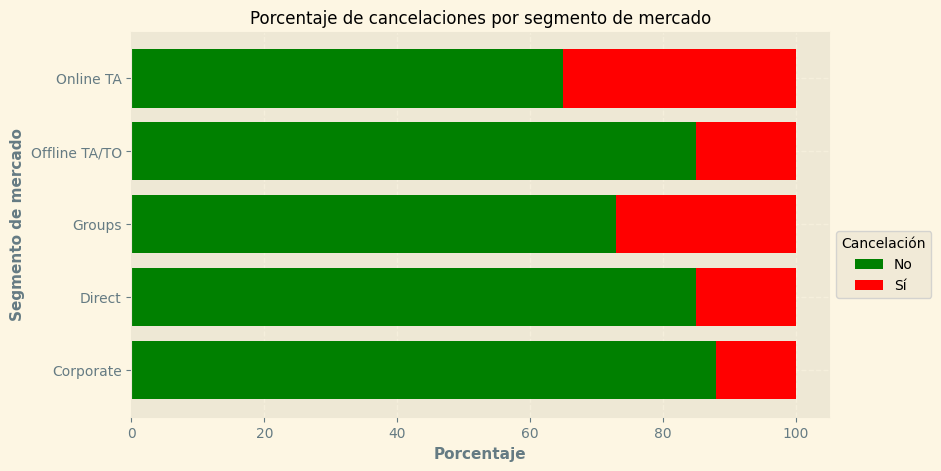

In [137]:
# Muestra el porcentaje de distribución de las reservas según estado y segmento de mercado
plt.barh(df_cancelaciones_por_segmento.market_segment, df_cancelaciones_por_segmento['%_no_canceladas'],
         color= 'green', label='No')

plt.barh(df_cancelaciones_por_segmento.market_segment, df_cancelaciones_por_segmento['%_canceladas'],
         left=df_cancelaciones_por_segmento['%_no_canceladas'],
         color= 'red', label='Sí')

# Añadir título y etiquetas de los ejes
plt.title('Porcentaje de cancelaciones por segmento de mercado')
plt.xlabel('Porcentaje')
plt.ylabel('Segmento de mercado')

# Mostrar la leyenda fuera del gráfico
plt.legend(title='Cancelación' ,loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

* Las TA Online (agencias de viajes) tienen la mayor tasa de cancelaciones de todos los segmentos analizados.
* El grupo '**parejas**' es el que mayor número de reservas realiza, superando ampliamente al segundo, siendo este '**solteros**'.
* Se determina que las reservas están muy concentradas en dos grupos que representan ~84 % de todas las reservas del dataframe. Ambos grupos tienen en común que no tienen menores de edad.
* Las familias del tipo 'mediana', prefieren los hoteles del tipo Resort. Este segmente es en el único en donde se superan las reservas del tipo hotel de ciudad.

## Conclusiones del análisis exploratorio de datos.


* La información recolectada se concentra en los valores del ADR desde julio de 2015 hasta agosto de 2017, sin embargo, solo se disponen de datos para estos tres años en los meses de julio y agosto. Esta limitación ha tenido un impacto significativo en numerosos análisis llevados a cabo.

* Los precios alcanzan su punto máximo durante los meses de julio y agosto, mientras que los intervalos de precios más bajos se registran entre noviembre y febrero.

* Se destaca un patrón de alta demanda de reservas durante el mes de agosto, lo que se traduce en un ADR más elevado en comparación con enero, donde se registra el menor valor promedio por reserva.

* Al realizar la reserva durante el mes de septiembre, se consigue un ahorro promedio de 35 dólares en comparación con el mes de agosto.

# **Selección de características**

---

El proceso de elegir un subconjunto de las características (variables o atributos) disponibles en un conjunto de datos que son más relevantes para el problema en cuestión. La selección de características tiene como objetivo mejorar la precisión y la eficiencia de los modelos de aprendizaje automático al eliminar características redundantes, irrelevantes o ruidosas.

Los métodos que a continuación aplicaremos al análisis son:
* Forward Selection
* Backward Selection
* Stepwise

Calcula la correlación de la característica target con todas las demás características

In [138]:
# Metodos de correlación utilizados
metodos_correlacion = ['pearson', 'kendall', 'spearman']

# Filtrar las correlaciones con valores absolutos mayores
threshold = 0.15

for metodo in metodos_correlacion:
    # Calcular la correlación de la característica target con todas las demás características
    target_correlation = df_reservas.corrwith(df_reservas[variable_objetivo], method = metodo)

    high_correlation = target_correlation[(target_correlation.abs() > threshold) & (target_correlation.index != variable_objetivo)]

    # Mostrar las correlaciones filtradas
    if (len(high_correlation)):
      print("Correlaciones de {} con valores absolutos mayores a {} utilizando el método de {} \n".format(variable_objetivo, threshold, metodo))
      high_correlation = high_correlation.sort_values(ascending=False)
      print(round(high_correlation,2))
      print()
    else:
      print("No existen correlaciones para los parametros ingresados: {} {} {} .".format(variable_objetivo, threshold, metodo))

Correlaciones de is_canceled con valores absolutos mayores a 0.15 utilizando el método de pearson 

market_segment_le              0.18
lead_time                      0.16
required_car_parking_spaces   -0.19
dtype: float64

Correlaciones de is_canceled con valores absolutos mayores a 0.15 utilizando el método de kendall 

market_segment_le              0.19
lead_time                      0.15
required_car_parking_spaces   -0.19
dtype: float64

Correlaciones de is_canceled con valores absolutos mayores a 0.15 utilizando el método de spearman 

market_segment_le              0.20
lead_time                      0.19
required_car_parking_spaces   -0.19
dtype: float64



### Matriz de correlación

Una forma de cuantificar la relación entre dos variables es utilizar el coeficiente de correlación. Cuanto más lejos esté el coeficiente de correlación de cero, más fuerte será la relación entre las dos variables.


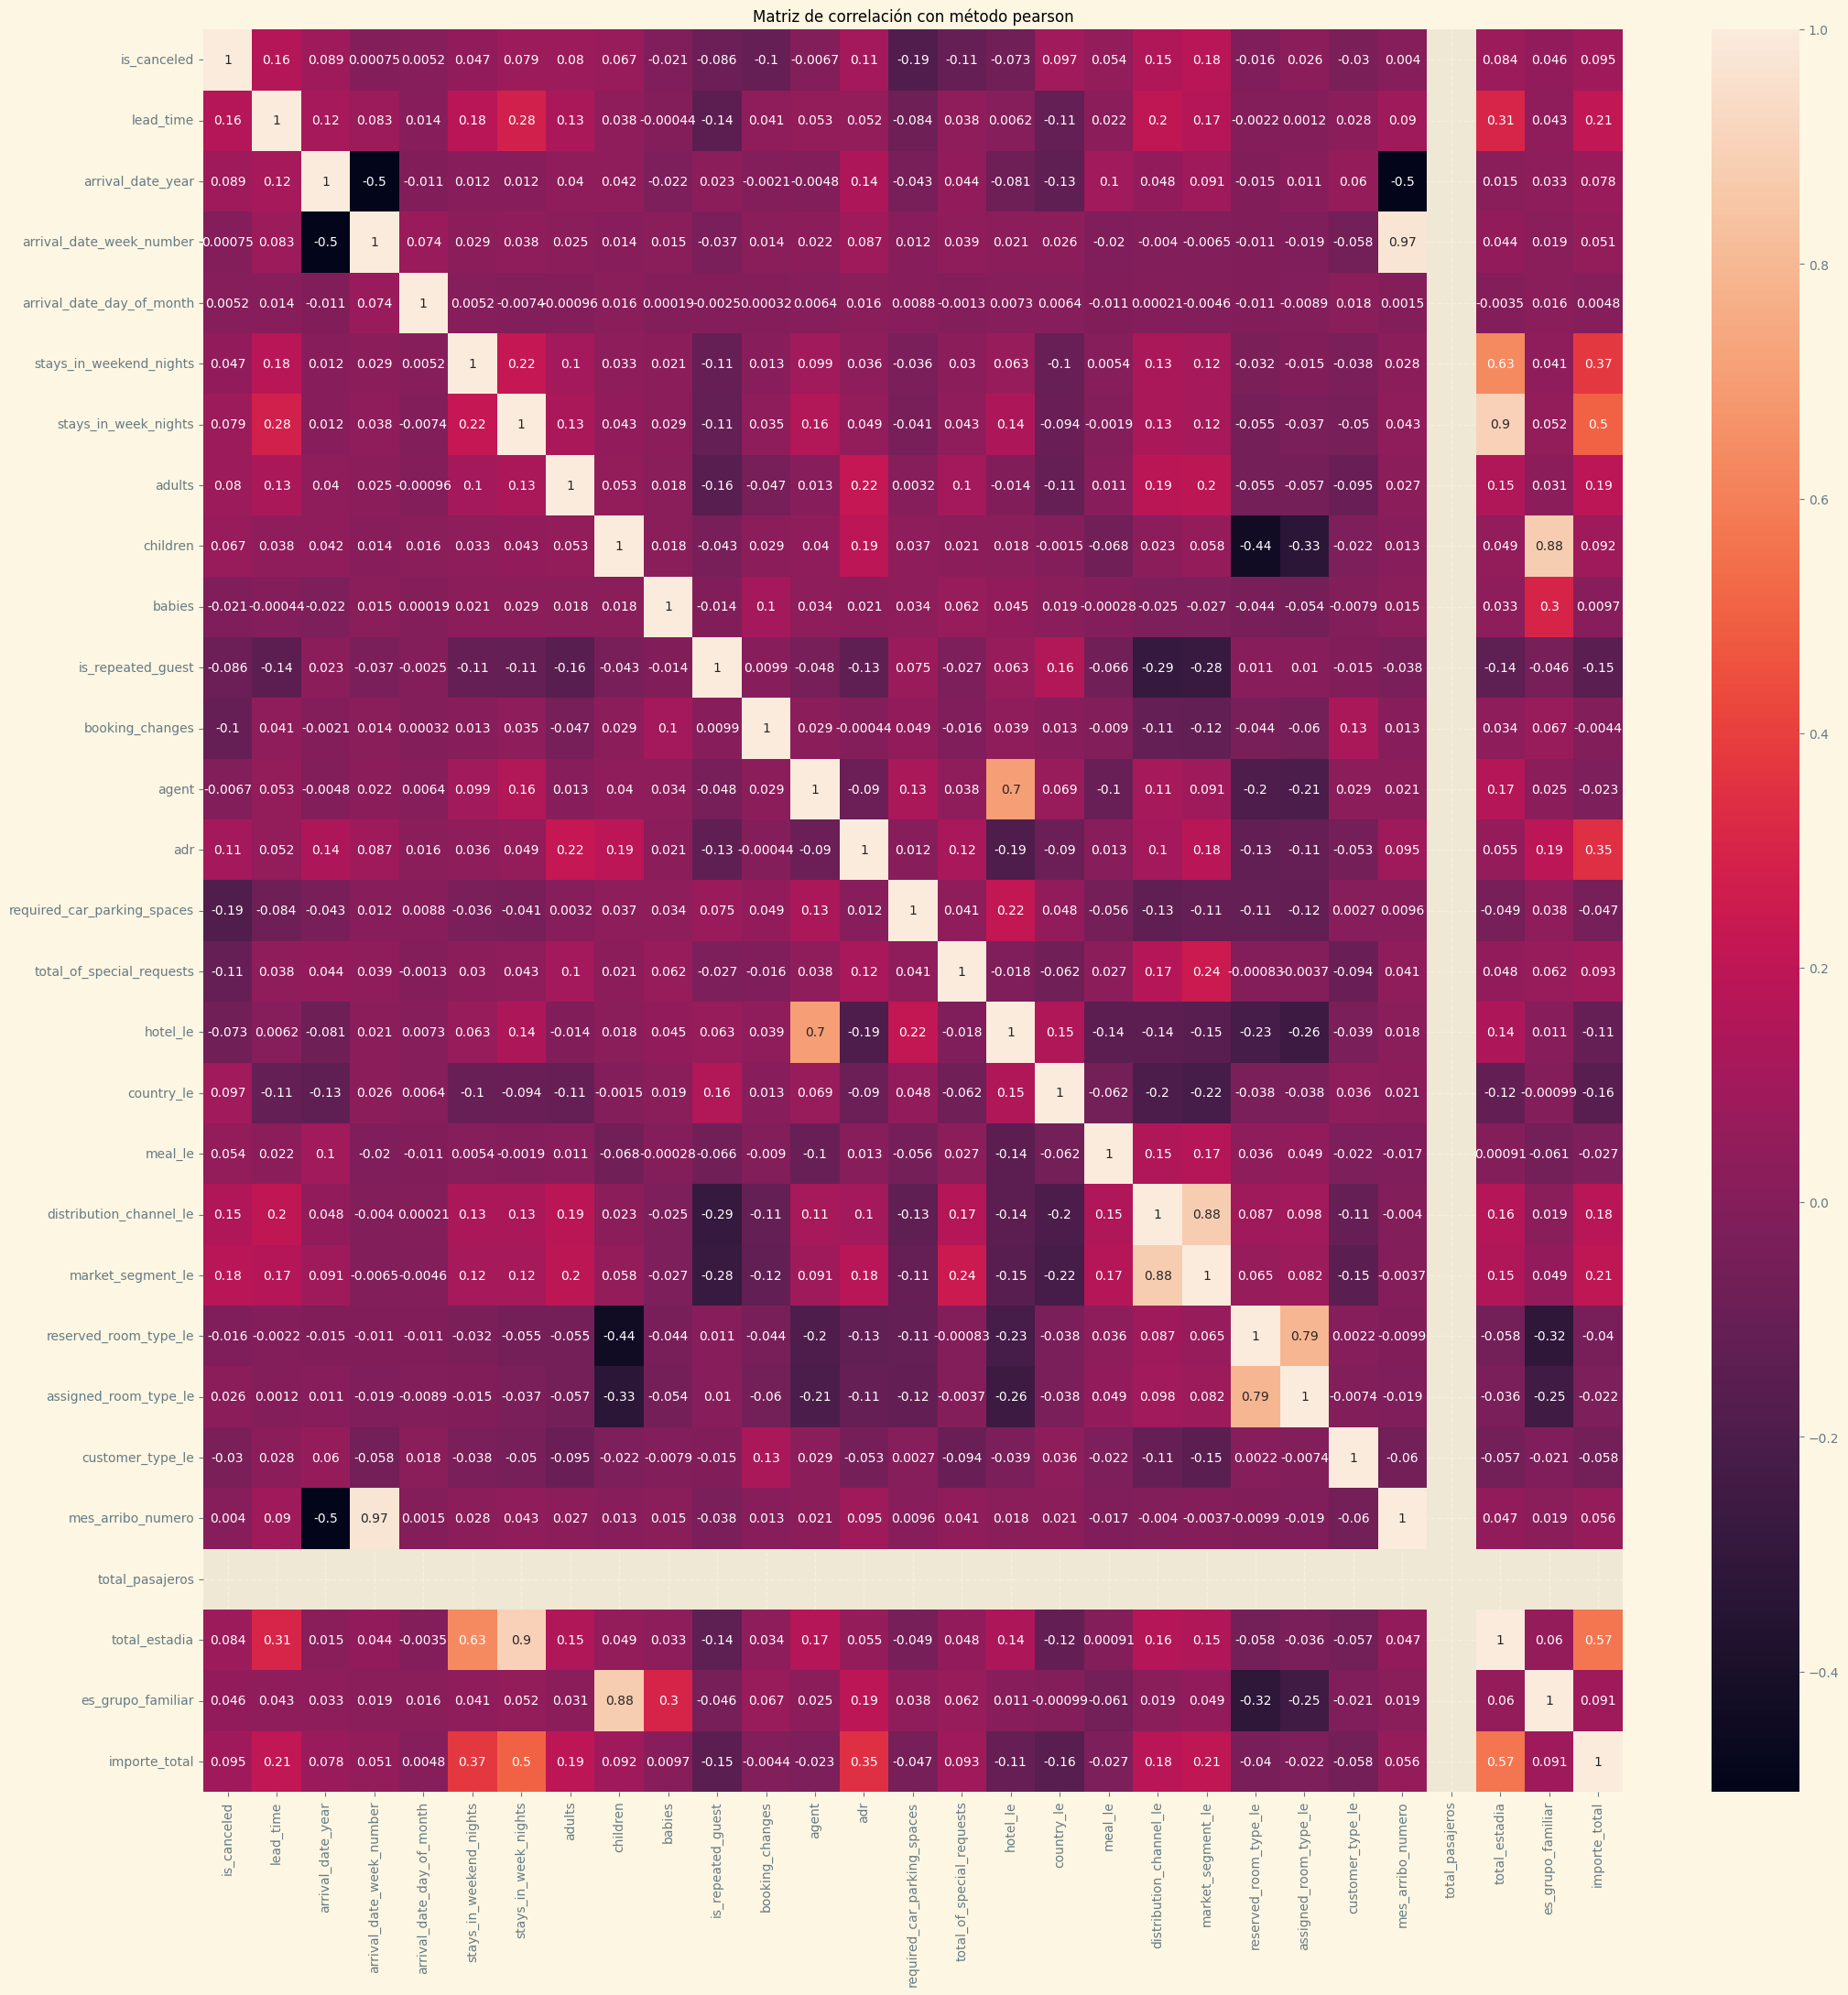

In [139]:
# Calcular la matriz de correlación de Pearson
calcular_matriz_correlacion(df_reservas, metodo= 'pearson', tamano_grafico=(25,25))

Conclusiones

Luego de analizar la matriz de correlación, estás son las conclusiones obtenidas:

Utilizando el método Pearson:
* La característica *'lead_time'* está algo correlacionado con *'is_canceled'*.
* *'stays_in_weekend_nights'* está altamente correlacionado con *'stays_in_week_nights'*.
* También se detecto que *'is_repeated_guest'* está  correlacionado la característica *'previous_bookings_not_canceled'*.
* *'adr'* está correlacionado con *'children'* y *'adults'*.

Método Spearman
* La caracterista *'is_canceled'* tiene alta correlación con la característica *'deposit_type'*.
* La característica *'lead_time'* sigue estando correlacionada con *'is_canceled'*.
* Se detecto que *'is_canceled'* tiene correlación con la característica *'previous_cancellations'*.
* *'stays_in_weekend_nights'* está correlacionada con *'stays_in_week_nights'*.
* También se detecto que *'is_repeated_guest'* continua siendo altamente correlacionado con la característica *'previous_bookings_not_canceled'*.
* *'adr'* está correlacionado con *'children'* y *'adults'*.
* *distribution_channel* y *market_segment* tienen alta correlatividad.


Método Kendall
* La característica *'lead_time'* está algo correlacionado con *'is_canceled'*.
* *'is_canceled'* tiene correlación con la característica *'previous_cancellations'*.
* También se detecto que *'is_repeated_guest'* continua siendo altamente correlacionado con la característica *'previous_bookings_not_canceled'*.
* *'adr'* está correlacionado con *'children'* y *'adults'*.


**Resumen**: se contemplan las características 'market_segment_le', 'lead_time', 'distribution_channel_le', 'adr', 'total_of_special_requests', 'booking_changes' y 'required_car_parking_spaces' como las más correlacionadas.


In [140]:
# Deja únicamente las características númericas y toma una muestra de los datos
limite_rows = int(df_reservas.shape[0] * 0.10)

df_reservas_numerico = df_reservas.select_dtypes(include='number').sample(limite_rows)

# X, y
X = df_reservas_numerico.drop(variable_objetivo, axis=1)

y = df_reservas_numerico[variable_objetivo]

# División de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = my_random_state)

In [141]:
print(X.shape)
print(y.shape)

(8593, 28)
(8593,)


### Forward Selection

* Proceso: Comienza con un modelo que no tiene variables predictoras y gradualmente agrega una a la vez, evaluando la contribución de cada variable en términos de mejora del ajuste del modelo.
* Criterio: En cada paso, se selecciona la variable que proporciona la mayor mejora en el ajuste del modelo, según algún criterio predefinido (como el criterio de información bayesiano o el criterio de Akaike).
* Detalles: Este proceso continúa hasta que agregar más variables no mejora significativamente el rendimiento del modelo.

In [142]:
# Función para determinar las mejores características con el método Foward
def forward_selection(data, target, significance_level = 0.05):
    initial_features = data.columns.tolist()
    best_features = []

    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)

        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

# Crear una lista para almacenar las características seleccionadas
forward_list = []

forward_list  = forward_selection(X,y)
print("Características seleccionadas por el método Foward Selection:\n")
forward_list

Características seleccionadas por el método Foward Selection:



['total_pasajeros',
 'required_car_parking_spaces',
 'market_segment_le',
 'total_of_special_requests',
 'country_le',
 'lead_time',
 'adr',
 'booking_changes',
 'distribution_channel_le',
 'arrival_date_year',
 'stays_in_week_nights',
 'adults',
 'hotel_le',
 'reserved_room_type_le',
 'assigned_room_type_le',
 'mes_arribo_numero',
 'is_repeated_guest',
 'customer_type_le']

Selección hacia adelante (forward selection) de características utilizando el método de eliminación de características paso a paso basado en valores p (p-value). La idea es comenzar con un conjunto vacío de características y agregar iterativamente la característica que más mejora el modelo según el valor p.

El código 2 utiliza el método de selección hacia adelante basado en valores p (p-values) con la regresión lineal de statsmodels. Este enfoque es más fundamentado desde el punto de vista estadístico y puede proporcionar resultados más interpretables.

### Backward Selection

* Proceso: Comienza con un modelo que incluye todas las variables predictoras y elimina una a la vez, evaluando la contribución de cada variable en términos de la mejora del ajuste del modelo.
* Criterio: En cada paso, se elimina la variable que tiene la menor contribución al modelo, según algún criterio predefinido.
* Detalles: Este proceso continúa hasta que eliminar más variables no mejora significativamente el rendimiento del modelo.

In [143]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

backward_selects = []
#Lista final de features con el método aplicado
backward_selects = backward_elimination(X,y)

print("Características seleccionadas por el método Backward Selection:\n")
backward_selects

Características seleccionadas por el método Backward Selection:



['lead_time',
 'arrival_date_year',
 'stays_in_week_nights',
 'adults',
 'is_repeated_guest',
 'booking_changes',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'hotel_le',
 'country_le',
 'distribution_channel_le',
 'market_segment_le',
 'reserved_room_type_le',
 'assigned_room_type_le',
 'customer_type_le',
 'mes_arribo_numero',
 'total_pasajeros']

### Eliminación bidireccional (stepwise)

* Proceso: Combina Forward Selection y Backward Selection, comenzando con un modelo sin variables predictoras y agregando o eliminando variables en cada paso según algún criterio.
* Criterio: En cada paso, se evalúa tanto la adición como la eliminación de variables y se realiza la acción que maximiza la mejora del ajuste del modelo.
* Detalles: Este proceso continúa hasta que ninguna adición o eliminación de variables mejore significativamente el rendimiento del modelo.

In [144]:
def stepwise_selection(data, target, SL_in=0.05, SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(dtype='float64', index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return best_features

features_stepwise = []
# Lista final de features con el método aplicado
features_stepwise = stepwise_selection(X,y)

print("Características seleccionadas para el método Stepwise:\n")
features_stepwise

Características seleccionadas para el método Stepwise:



['total_pasajeros',
 'required_car_parking_spaces',
 'market_segment_le',
 'total_of_special_requests',
 'country_le',
 'lead_time',
 'adr',
 'booking_changes',
 'distribution_channel_le',
 'arrival_date_year',
 'stays_in_week_nights',
 'adults',
 'hotel_le',
 'reserved_room_type_le',
 'assigned_room_type_le',
 'mes_arribo_numero',
 'is_repeated_guest',
 'customer_type_le']

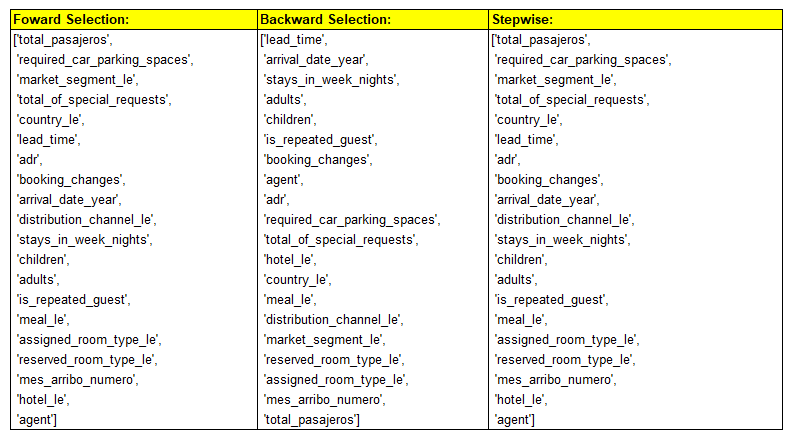

# **Entrenaniento de modelos individuales**


---

En esta sección, se dispone el código python para el entrenamiento de los modelos de machine learnig.

* Random Forest Classifier
* SelectKBest + Random Forest Classifier
* XGBoost
* XGBoost + Kflod
* Support Vector Machines (SVM)

### Dividir el dataframe

Divide el dataframe númerico para realizar los entrenamientos y testeos correspondientes.

In [145]:
# Utilizar las carásteristicas del método
features_selects = forward_list

# Utiliza las características seleccionadas para entrenar los modelos
features_selects.append(variable_objetivo)
features_selects

['total_pasajeros',
 'required_car_parking_spaces',
 'market_segment_le',
 'total_of_special_requests',
 'country_le',
 'lead_time',
 'adr',
 'booking_changes',
 'distribution_channel_le',
 'arrival_date_year',
 'stays_in_week_nights',
 'adults',
 'hotel_le',
 'reserved_room_type_le',
 'assigned_room_type_le',
 'mes_arribo_numero',
 'is_repeated_guest',
 'customer_type_le',
 'is_canceled']

In [146]:
# Deja únicamente las características númericas y toma una muestra de los datos
limite_rows = int(df_reservas.shape[0] * 0.10)

##df_reservas_numerico = df_reservas.select_dtypes(include='number').sample(limite_rows)
df_reservas_numerico = df_reservas[features_selects].sample(limite_rows)

# X, y
X = df_reservas_numerico.drop(variable_objetivo, axis=1)

y = df_reservas_numerico[variable_objetivo]

# División de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = my_random_state)

In [147]:
print(X.shape)
print(y.shape)

(8593, 18)
(8593,)


### SMOTE

Considerando la disparidad significativa en la variable objetivo, se emplea el método Smote para equilibrar las clases y, de este modo, obtener métricas de entrenamiento más robustas para los diversos modelos de Machine Learning preseleccionados, alineándonos con el objetivo del proyecto.

In [148]:
# uso SMOTE debido a los resultados desbalanceados

# Crear el modelo
mysmote = SMOTE(random_state = my_random_state)

# Entrenando
X_mysmote, y_mysmote = mysmote.fit_resample(X, y)

print(f'''Set X antes del Oversampling: {X.shape}
Set X despues del Oversampling: {X_mysmote.shape}''')

print('\nNuevo % de la variable Target:')
print(y_mysmote.value_counts(normalize=True) * 100)

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_mysmote, y_mysmote,
                                                    test_size = 0.3,
                                                    random_state= my_random_state)


Set X antes del Oversampling: (8593, 18)
Set X despues del Oversampling: (12520, 18)

Nuevo % de la variable Target:
0    50.0
1    50.0
Name: is_canceled, dtype: float64


Al detectar un desequilibrio en la variable objetivo al pricipio del notebook, se decidió aplicar el método SMOTE para equilibrar las clases y mejorar el rendimiento de los modelos entrenados.

## Random Forest Classifier


Se utiliza para problemas de clasificación, donde la variable objetivo es categórica (por ejemplo, "sí" o "no", "gato" o "perro", etc.). Este modelo primero se lo entrena para que busque los mejores hiperparámetros y luego se entrenara con estos.

In [149]:
# Crear el modelo RandomForestClassifier
model_rfc = RandomForestClassifier(n_jobs = -1, random_state = my_random_state,
                                   criterion='gini')

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [5, 10, 20, 40],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Realizar la búsqueda en la cuadrícula
grid = GridSearchCV(model_rfc,
                    param_grid,
                    cv = 5,
                    scoring = 'roc_auc')

# Entrenar el modelo
grid.fit(X_train, y_train)

# Obtener los mejores parámetros
best_max_features = grid.best_params_['max_features']
best_estimators = grid.best_params_['n_estimators']
print("Mejores parámetros para el modelo RandomForestClassifier:", grid.best_params_)

# Crear el modelo RandomForestClassifier con los mejores parámetros encontrados
model_rfc_optimo = RandomForestClassifier(n_estimators = best_estimators,
                                          n_jobs = -1,
                                          max_features = best_max_features,
                                          random_state = my_random_state,
                                          criterion='gini')

# Entrenar el modelo con los datos de entrenamiento y mejores parámetros
model_rfc_optimo.fit(X_train, y_train)

# Predecir valores
y_pred= model_rfc_optimo.predict(X_test)

# Obtener la importancia de las características
feature_importances = model_rfc_optimo.feature_importances_

Mejores parámetros para el modelo RandomForestClassifier: {'max_features': 'auto', 'n_estimators': 40}


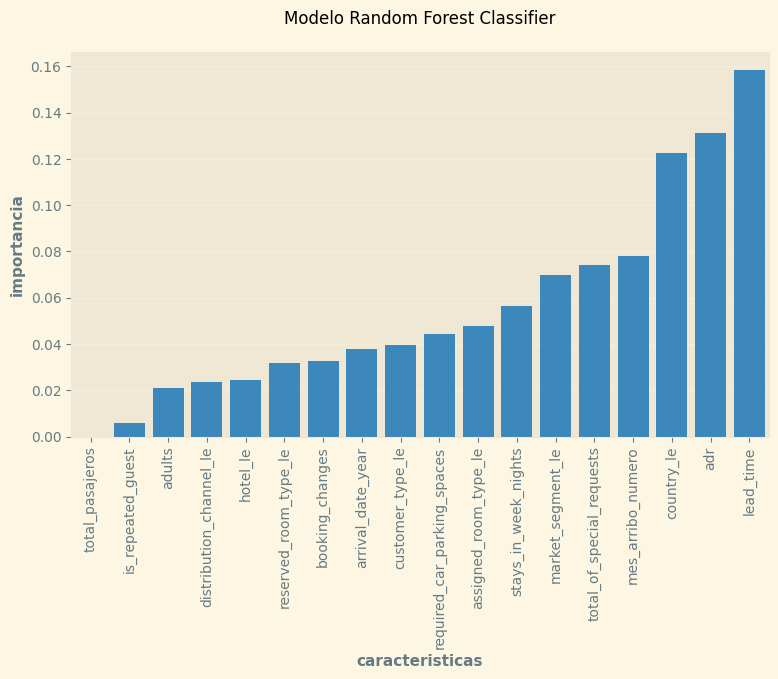

In [150]:
# Crear un DataFrame con las características y sus importancias
df_randomforest = pd.DataFrame({'caracteristicas': X.columns, 'importancia': feature_importances})

# Ordenar el DataFrame por importancias
df_randomforest.sort_values('importancia', inplace=True)

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize = figsize_default)

# Crear el gráfico de barras
bp = sns.barplot(x ='caracteristicas', y ='importancia', data = df_randomforest, ax = ax)
bp.set_title("Modelo Random Forest Classifier", pad=20)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)

# Mostrar el gráfico
plt.show()

Precisión del modelo: 0.8397
El modelo podría necesitar mejoras para lograr un rendimiento más alto.


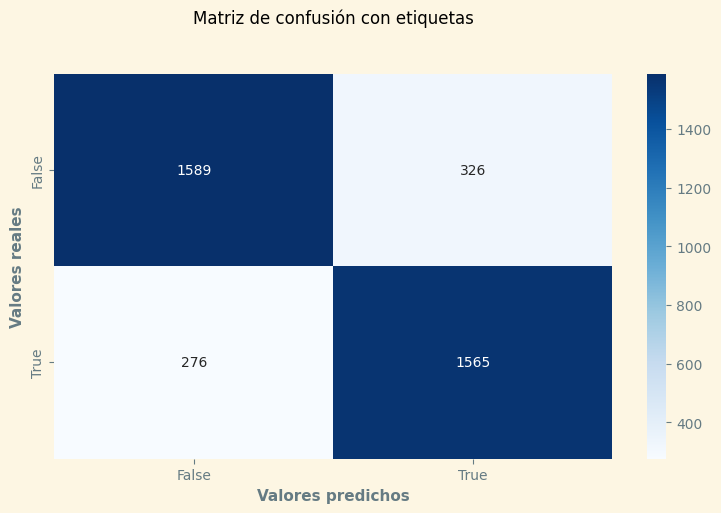



              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1915
           1       0.83      0.85      0.84      1841

    accuracy                           0.84      3756
   macro avg       0.84      0.84      0.84      3756
weighted avg       0.84      0.84      0.84      3756



In [151]:
# Llama a la función para calcular la precisión del modelo
calcular_precision_modelo(y_test, y_pred )

# Llama a la función de graficar la matriz de confución
graficar_matriz_confusion(y_test, y_pred, style='Blues', labels=['False', 'True'])

F1 Score

Esta es una métrica muy utilizada en problemas en los que el conjunto de datos a analizar está desbalanceado. Esta métrica combina el precision y el recall, para obtener un valor mucho más objetivo.

F1 = 2 * ((recall * precision)/(recall + precision))

Realizar validación cruzada contra XGBoost

In [152]:
# Define los parámetros del modelo XGBoost
params = {
          'objective': 'binary:logistic',
          'max_depth': 6,
          'learning_rate': 0.1
}
# Crea un clasificador XGBoost
model_xgb = xgb.XGBClassifier(**params)

# Realiza la validación cruzada
cv_scores = cross_val_score(model_xgb, X, y, cv = 5, scoring='accuracy')

# Imprime los resultados de la validación cruzada
print("Precisión de la validación cruzada:", cv_scores.mean())

Precisión de la validación cruzada: 0.8047234869340203


**Conclusión**:



---



## SelectKBest + RandomForestClassifier

SelectKBest y RandomForestClassifier son dos componentes comúnmente utilizados en el proceso de selección de características y clasificación, respectivamente, en el contexto de aprendizaje automático.

* SelectKBest se utiliza para seleccionar las k mejores características (variables) basadas en diversas funciones de puntuación. Puede ser utilizado con varios métodos de puntuación, como la correlación, la información mutua o las pruebas estadísticas.

* RandomForestClassifier es un clasificador basado en la técnica de ensamblado de árboles de decisión, conocido como Bosque Aleatorio.

Precisión del modelo: 0.8392
El modelo podría necesitar mejoras para lograr un rendimiento más alto.


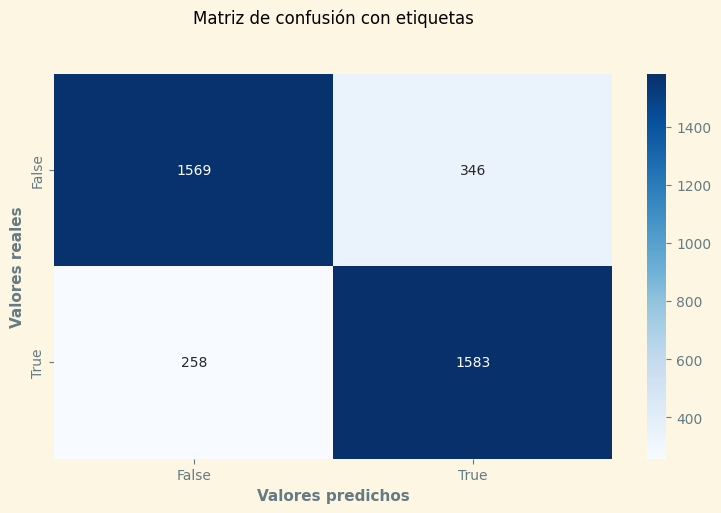



              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1915
           1       0.82      0.86      0.84      1841

    accuracy                           0.84      3756
   macro avg       0.84      0.84      0.84      3756
weighted avg       0.84      0.84      0.84      3756



In [153]:
# Aplica SelectKBest para seleccionar las K mejores características
X_new = SelectKBest(k = 5).fit_transform(X_train, y_train)

# Crear un modelo de clasificación usando Random Forest
model = RandomForestClassifier(n_estimators = 100)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Llama a la función para calcular la precisión del modelo
calcular_precision_modelo(y_test, y_pred )

# Llama a la función de graficar la matriz de confución
graficar_matriz_confusion(y_test, y_pred, style='Blues', labels=['False', 'True'])

## XGBoost

XGBoost (Extreme Gradient Boosting) es un algoritmo de aprendizaje automático supervisado que se utiliza en problemas de regresión y clasificación.

Precisión del modelo: 0.8344
El modelo podría necesitar mejoras para lograr un rendimiento más alto.


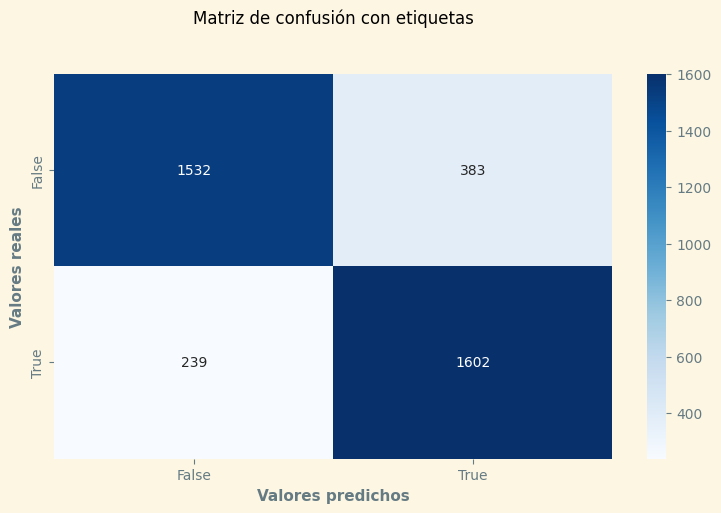



              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1915
           1       0.81      0.87      0.84      1841

    accuracy                           0.83      3756
   macro avg       0.84      0.84      0.83      3756
weighted avg       0.84      0.83      0.83      3756



In [154]:
# Crea un objeto DMatrix para los datos de entrenamiento y prueba
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

# Define los parámetros del modelo XGBoost
params = {
          'objective': 'binary:logistic',
          'max_depth': 6,
          'learning_rate': 0.1
}

# Entrena el modelo XGBoost
model_xgb = xgb.train(params, dtrain, num_boost_round = 100)

# Realiza predicciones en el conjunto de prueba
y_pred = model_xgb.predict(dtest)

# Convierte las predicciones a etiquetas binarias
# Explicación: utiliza una comprensión de lista para iterar sobre las predicciones y_pred
# y asignar una etiqueta binaria según el valor de la predicción. Si el valor predicho (p)
# es mayor que 0.5, se clasifica como 1, de lo contrario, se clasifica como 0.
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

# Llama a la función para calcular la precisión del modelo
calcular_precision_modelo(y_test, y_pred_binary)

# Llama a la función de graficar la matriz de confución
graficar_matriz_confusion(y_test, y_pred_binary, style='Blues', labels=['False', 'True'])

In [155]:
# Realizar validación cruzada

# Crea un clasificador XGBoost
model_xgb = xgb.XGBClassifier(**params)

# Realiza la validación cruzada
cv_scores = cross_val_score(model_xgb, X, y, cv=5, scoring='accuracy')

# Imprime los resultados de la validación cruzada
print("Precisión de la validación cruzada:", cv_scores.mean())


Precisión de la validación cruzada: 0.8047234869340203


In [156]:
f1_positivo = metrics.f1_score(y_test, y_pred_binary, pos_label=1)
f1_negativo = metrics.f1_score(y_test, y_pred_binary, pos_label=0)

print("Precisión de f1_positivo: {:.2f}%".format(f1_positivo * 100))
print("Precisión de f1_negativo: {:.2f}%".format(f1_negativo * 100))

Precisión de f1_positivo: 83.74%
Precisión de f1_negativo: 83.13%


**Conclusión**: Los resultados de la validación cruzada muestran una precisión media del 83.3% para el modelo de **Random Forest Classifier** en la clasificación del conjunto de datos utilizado. Esto sugiere un buen desempeño del modelo en este conjunto de datos específico. Sin embargo, se necesita precaución al generalizar estos resultados a otros conjuntos de datos, y se recomienda realizar un análisis más detallado, incluyendo la evaluación de otras métricas de rendimiento y la optimización de los hiperparámetros, para una evaluación completa del modelo.

## XGBoost + kfold



La combinación de XGBoost y la validación cruzada K-fold es una práctica común para evaluar y entrenar modelos de aprendizaje automático de manera robusta.

In [157]:
def train_model_with_cross_validation(X, y, params, num_folds=5, random_state=None):
    # Configura la validación cruzada con K-Fold
    kf = KFold(n_splits=num_folds, shuffle=True, random_state = random_state)

    # Lista para almacenar las puntuaciones de precisión de cada pliegue
    scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        dtrain = xgb.DMatrix(X_train, label=y_train)
        dtest = xgb.DMatrix(X_test, label=y_test)

        # Entrenar el modelo
        model = xgb.train(params, dtrain, num_boost_round=100)

        # Predecir
        y_pred = model.predict(dtest)
        y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

        # Medir
        accuracy = accuracy_score(y_test, y_pred_binary)
        scores.append(accuracy)

    # Calcula el promedio de las puntuaciones de precisión de los pliegues
    average_accuracy = sum(scores) / num_folds

    return average_accuracy

In [158]:
param_combinations = [
    {'objective': 'binary:logistic', 'max_depth': 5, 'learning_rate': 0.1},
    {'objective': 'binary:logistic', 'max_depth': 3, 'learning_rate': 0.05},
    {'objective': 'binary:logistic', 'max_depth': 6, 'learning_rate': 0.05},
]

param_folds = {3,5,7,10}

# Combina todos los hiperparámetros
for myfold in param_folds:
  for params in param_combinations:
      avg_accuracy = train_model_with_cross_validation(X, y, params, myfold, my_random_state)
      print("Para los parámetros:", params)
      print("Precisión promedio con {}-fold cross-validation: {:.2f}%".format(myfold, avg_accuracy * 100))


Para los parámetros: {'objective': 'binary:logistic', 'max_depth': 5, 'learning_rate': 0.1}
Precisión promedio con 10-fold cross-validation: 80.50%
Para los parámetros: {'objective': 'binary:logistic', 'max_depth': 3, 'learning_rate': 0.05}
Precisión promedio con 10-fold cross-validation: 78.82%
Para los parámetros: {'objective': 'binary:logistic', 'max_depth': 6, 'learning_rate': 0.05}
Precisión promedio con 10-fold cross-validation: 80.32%
Para los parámetros: {'objective': 'binary:logistic', 'max_depth': 5, 'learning_rate': 0.1}
Precisión promedio con 3-fold cross-validation: 80.73%
Para los parámetros: {'objective': 'binary:logistic', 'max_depth': 3, 'learning_rate': 0.05}
Precisión promedio con 3-fold cross-validation: 78.56%
Para los parámetros: {'objective': 'binary:logistic', 'max_depth': 6, 'learning_rate': 0.05}
Precisión promedio con 3-fold cross-validation: 80.18%
Para los parámetros: {'objective': 'binary:logistic', 'max_depth': 5, 'learning_rate': 0.1}
Precisión promedio 

No se visualiza una mejora en el rendimiento en cuanto a la versión XGBOOST

Conclusión


Otros modelos entrenados:

Se probó entrenar el modelo **Support Vector Machines (SVM)** con combinaciones de parámetros, pero los resultados estuvieron por debajo de los obtenidos con Radom Forest Classifier y XGBoost.

Luego de haber entrenado el modelo utilizando cuatro configuraciones diferentes de kernels, con entrenamientos entre 10.000 y 30.000 observaciones, y con variación del tamaño del DataFrame de testing entre el 25 y 35%, se concluye que siempre el mejor porcentaje de acierto se logra utilizando: SVC(C=0.1, kernel='linear',random_state= my_random_state)



---



# Entrenamiento masivo de modelos

Validamos 10 modelos distintos en busca de los mejores.

In [159]:
features_selects = list(set(features_selects))
features_selects

['total_pasajeros',
 'distribution_channel_le',
 'mes_arribo_numero',
 'assigned_room_type_le',
 'is_canceled',
 'adr',
 'total_of_special_requests',
 'reserved_room_type_le',
 'booking_changes',
 'country_le',
 'stays_in_week_nights',
 'required_car_parking_spaces',
 'adults',
 'market_segment_le',
 'hotel_le',
 'is_repeated_guest',
 'lead_time',
 'customer_type_le',
 'arrival_date_year']

In [160]:
# Deja únicamente las características númericas y toma una muestra de los datos
limite_rows = int(df_reservas.shape[0] * 1)

##df_reservas_numerico = df_reservas.select_dtypes(include='number').sample(limite_rows)
df_reservas_numerico = df_reservas[features_selects].sample(limite_rows)

# X, y
X = df_reservas_numerico.drop(variable_objetivo, axis=1)

y = df_reservas_numerico[variable_objetivo]

# División de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = my_random_state)

In [161]:
print(X.shape)
print(y.shape)

(85935, 18)
(85935,)


In [162]:
# MOVER A FUNCIONES
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def guardar_resultados_modelo(modelo, cv: int, scoring_roc_auc: float, X_train, y_train, X_test, y_test, nombre_modelo: str):
    # Ajustar el modelo
    modelo.fit(X_train, y_train)

    # Hacer predicciones en el conjunto de prueba
    y_pred = modelo.predict(X_test)

    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Crear un DataFrame con los resultados
    resultados_df = pd.DataFrame({
        'Modelo': [nombre_modelo],
        'CV-folds': [cv],
        'roc_auc': [scoring_roc_auc],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1]
    })

    return resultados_df

## Modelos: configuración

Configura todos los modelos que serán puestos a prueba con algunos hiperparámetros.

In [163]:
# Define la configuración inicial para cada modelo
# Mejores hiperparámetros obtenidos

model_1 = AdaBoostClassifier(algorithm= "SAMME", learning_rate= 0.1, n_estimators=50, random_state= my_random_state )

#model_2 = SVC(random_state = my_random_state)

model_2 = XGBClassifier(random_state = my_random_state,
                        subsample= 1.0,
                        min_child_weight= 1,
                        max_depth= 5,
                        gamma= 1,
                        criterion= "gini",
                        colsample_bytree= 0.8)

model_3 = GaussianNB()

model_4 = MLPClassifier(random_state = my_random_state, max_iter = 500)

model_5 = SGDClassifier(random_state = my_random_state)

model_6 = KNeighborsClassifier(n_neighbors=5, algorithm='auto', metric='minkowski')

model_7 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state = my_random_state)

model_8 = RandomForestClassifier(random_state = my_random_state,
                                class_weight = "balanced",
                                max_features = "auto", n_estimators= 40)

model_9 = GradientBoostingClassifier(learning_rate=0.1,
                                    max_depth= 7,
                                    n_estimators= 200,
                                    random_state = my_random_state)


# Mejores parametro para XGBClassifier con Grid Search
model_10 = XGBClassifier(random_state = my_random_state,
                        colsample_bytree = 0.6,
                        criterion= "entropy",
                        gamma= 0.5,
                        max_depth= 5,
                        min_child_weight= 1,
                        subsample= 0.6) #use_label_encoder = False)

#model_11 = XGBClassifier(random_state = my_random_state, use_label_encoder = False)

models = []
# Agrupa los modelos en una lista
models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8, model_9, model_10]

In [164]:
# Dataframe para almacenar resultados del procesamiento
resultados_modelo = pd.DataFrame()

# Folds
lista_cv = [3, 5, 8, 10]

# Iterar sobre los valores de la lista de parámetros de CV
for cv in lista_cv:
    # Iterar sobre cada modelo
    for modelo in models:
        modelo_nombre = modelo.__class__.__name__  # Obtener el nombre de la clase del modelo

        #print(modelo_nombre, cv)

        try:
            scores = cross_val_score(modelo, X, y, scoring='roc_auc', cv= cv)  # Curva Roc
            promedio = np.mean(scores)
        except Exception as e:
            print(f"Error al evaluar el modelo {modelo_nombre} con cv {cv}: {e}")
            continue  # Pasar a la siguiente iteración si hay un error durante la validación cruzada

        print(f"Para el modelo {modelo_nombre} y cv {cv}: {promedio} ")

        # Almacena los resultados de las mediciones
        resultados_modelo = resultados_modelo.append(guardar_resultados_modelo(modelo, cv, promedio, X_train, y_train, X_test, y_test, modelo_nombre), ignore_index=True)

print("\nFinalizó el entrenamiento de los modelos.")
print(fecha_hora_local())


Para el modelo AdaBoostClassifier y cv 3: 0.6584286909018756 
Para el modelo XGBClassifier y cv 3: 0.8829940162395057 
Para el modelo GaussianNB y cv 3: 0.7236195462321812 
Para el modelo MLPClassifier y cv 3: 0.7777392240224649 
Para el modelo SGDClassifier y cv 3: 0.7181722326021537 
Para el modelo KNeighborsClassifier y cv 3: 0.6972798993085959 
Para el modelo DecisionTreeClassifier y cv 3: 0.8059583866822034 
Para el modelo RandomForestClassifier y cv 3: 0.8761570396454932 
Para el modelo GradientBoostingClassifier y cv 3: 0.8902966706132935 
Para el modelo XGBClassifier y cv 3: 0.8827086560333944 
Para el modelo AdaBoostClassifier y cv 5: 0.6584338090912861 
Para el modelo XGBClassifier y cv 5: 0.8849428647205386 
Para el modelo GaussianNB y cv 5: 0.7225092677336249 
Para el modelo MLPClassifier y cv 5: 0.7824212919547036 
Para el modelo SGDClassifier y cv 5: 0.7229361896825229 
Para el modelo KNeighborsClassifier y cv 5: 0.7039067356025976 
Para el modelo DecisionTreeClassifier y

In [165]:
#resultados_modelo.sort(key=lambda x: x[2], reverse=True)
resultados_modelo.sort_values(by='roc_auc', ascending=False, inplace=True)

# Guarda el modelo con la mejor puntuación ROC AUC
mejor_modelo = resultados_modelo[:1].index[0]

print("Ranking de los 10 mejores modelos por Curva Roc:\n")
resultados_modelo[:19]

Ranking de los 10 mejores modelos por Curva Roc:



,Modelo,CV-folds,roc_auc,Accuracy,Precision,Recall,F1-Score
38,GradientBoostingClassifier,10,0.893037,0.823319,0.704417,0.627634,0.663813
28,GradientBoostingClassifier,8,0.892475,0.823319,0.704417,0.627634,0.663813
18,GradientBoostingClassifier,5,0.892223,0.823319,0.704417,0.627634,0.663813
8,GradientBoostingClassifier,3,0.890297,0.823319,0.704417,0.627634,0.663813
21,XGBClassifier,8,0.885283,0.819363,0.697979,0.617027,0.655011
31,XGBClassifier,10,0.885147,0.819363,0.697979,0.617027,0.655011
29,XGBClassifier,8,0.885117,0.820410,0.699701,0.619819,0.657342
39,XGBClassifier,10,0.885097,0.820410,0.699701,0.619819,0.657342
11,XGBClassifier,5,0.884943,0.819363,0.697979,0.617027,0.655011
19,XGBClassifier,5,0.884211,0.820410,0.699701,0.619819,0.657342


Este conjunto de resultados proviene del entrenamiento de varios modelos de aprendizaje automático utilizando diferentes algoritmos de clasificación (GradientBoostingClassifier y XGBClassifier) en varios pliegues de validación cruzada (CV-folds).

Observaciones:

- Todos los modelos parecen tener un rendimiento bastante similar en términos de las métricas reportadas.
- El área bajo la curva ROC es alto en todos los modelos, lo que indica que tienen una buena capacidad de discriminación.
- La precisión, el recall y el F1-score son consistentes entre los modelos y los pliegues de validación cruzada.
- No hay una gran variación entre los resultados de los diferentes pliegues de validación cruzada, lo que sugiere que los modelos son estables con respecto a la selección de los datos de entrenamiento y prueba.

En resumen, los modelos parecen tener un rendimiento sólido y consistente en términos de las métricas evaluadas. Sin embargo, para obtener una evaluación más completa, sería importante considerar otras métricas y realizar una validación adicional en un conjunto de datos de prueba independiente.

## Comparativa

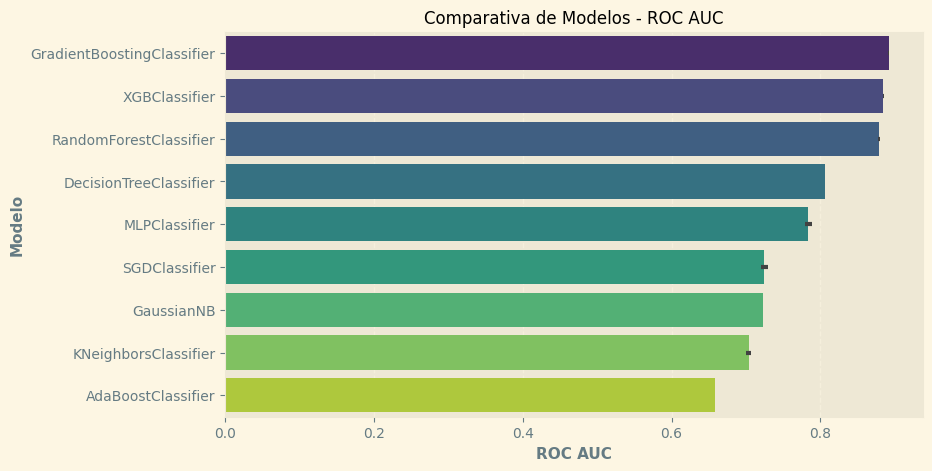

In [166]:
# Ordenar el DataFrame por la columna 'roc_auc' en orden descendente
df_sorted = resultados_modelo.sort_values(by='roc_auc', ascending=False)

# Obtener los valores de 'roc_auc' ordenados
valores_promedio = df_sorted['roc_auc'].values

# Obtener las etiquetas de los modelos ordenados
etiquetas_modelos = df_sorted['Modelo'].values


# Crear el gráfico de barras horizontal con seaborn
plt.figure(figsize=(figsize_default))
sns.barplot(y = etiquetas_modelos,
            x = valores_promedio,
            palette="viridis")

plt.xlabel('ROC AUC')
plt.ylabel('Modelo')
plt.title('Comparativa de Modelos - ROC AUC')
plt.show()

Observación:

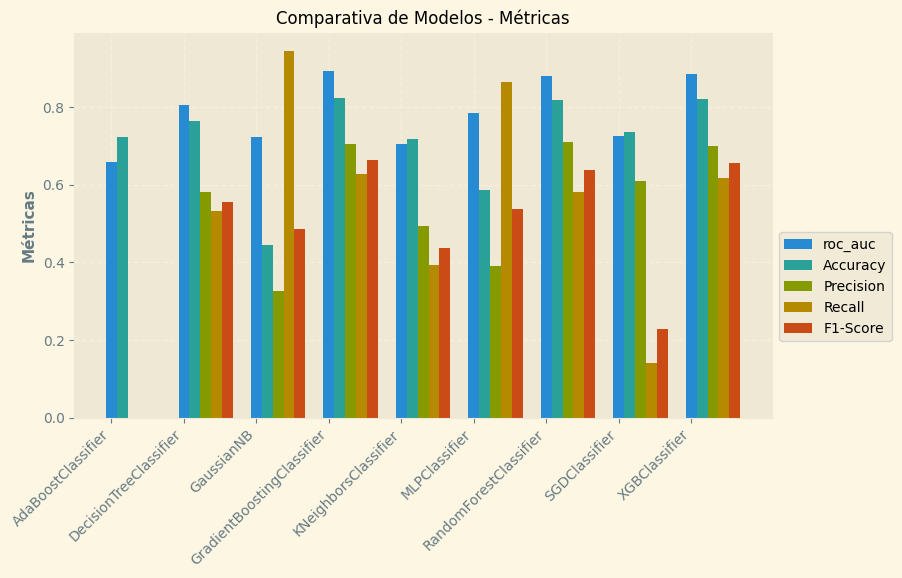

In [167]:
# Agrupar el DataFrame por 'Modelo' y calcular la media de las métricas
df_grouped = resultados_modelo.groupby('Modelo').mean()

# Obtener las métricas de 'roc_auc', 'Accuracy', 'Precision', 'Recall' y 'F1-Score'
roc_auc = df_grouped['roc_auc']
accuracy = df_grouped['Accuracy']
precision = df_grouped['Precision']
recall = df_grouped['Recall']
f1_score = df_grouped['F1-Score']

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(figsize_default))
width = 0.15

ax.bar(np.arange(len(roc_auc)), roc_auc, width, label='roc_auc')
ax.bar(np.arange(len(accuracy)) + width, accuracy, width, label='Accuracy')
ax.bar(np.arange(len(precision)) + width * 2, precision, width, label='Precision')
ax.bar(np.arange(len(recall)) + width * 3, recall, width, label='Recall')
ax.bar(np.arange(len(f1_score)) + width * 4, f1_score, width, label='F1-Score')

# Establecer el título y las etiquetas de los ejes
ax.set_title('Comparativa de Modelos - Métricas')
ax.set_ylabel('Métricas')

# Definir las etiquetas del eje X con los nombres de los modelos
ax.set_xticks(np.arange(len(df_grouped)))
ax.set_xticklabels(df_grouped.index, rotation=45, ha='right')

# Añadir leyenda
ax.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()


Observación:

In [168]:
#resultados_modelo.sort(key=lambda x: x[2], reverse=True)
resultados_modelo.sort_values(by='roc_auc', ascending=False, inplace=True)

# Guarda el modelo con la mejor puntuación ROC AUC
mejor_modelo = resultados_modelo[:1].index[0]

print("Ranking de los 10 mejores modelos por Curva Roc:\n")
resultados_modelo[:10]

Ranking de los 10 mejores modelos por Curva Roc:



,Modelo,CV-folds,roc_auc,Accuracy,Precision,Recall,F1-Score
38,GradientBoostingClassifier,10,0.893037,0.823319,0.704417,0.627634,0.663813
28,GradientBoostingClassifier,8,0.892475,0.823319,0.704417,0.627634,0.663813
18,GradientBoostingClassifier,5,0.892223,0.823319,0.704417,0.627634,0.663813
8,GradientBoostingClassifier,3,0.890297,0.823319,0.704417,0.627634,0.663813
21,XGBClassifier,8,0.885283,0.819363,0.697979,0.617027,0.655011
31,XGBClassifier,10,0.885147,0.819363,0.697979,0.617027,0.655011
29,XGBClassifier,8,0.885117,0.820410,0.699701,0.619819,0.657342
39,XGBClassifier,10,0.885097,0.820410,0.699701,0.619819,0.657342
11,XGBClassifier,5,0.884943,0.819363,0.697979,0.617027,0.655011
19,XGBClassifier,5,0.884211,0.820410,0.699701,0.619819,0.657342


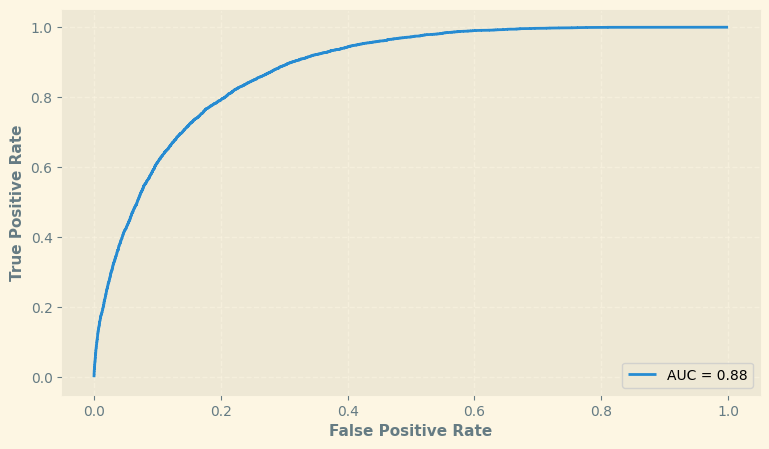

AUC: 0.88


In [170]:
# calcular la curva de roc del mejor modelo entrenado

# Obtener las probabilidades predichas para la clase positiva
y_pred_prob = model_10.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Crear una instancia de RocCurveDisplay
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Mostrar el gráfico
plt.show()

# Imprimir el valor del AUC
print(f"AUC: {roc_auc:.2f}")


## Bias y Varianza

In [171]:
def evaluar_bias_varianza(modelo, X, y, num_folds=5):
    # Define un objeto para la validación cruzada de k-fold
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Realiza la validación cruzada y obtiene los puntajes de rendimiento
    puntajes = cross_val_score(modelo, X, y, scoring='roc_auc', cv = kfold)

    # Calcula la media y la desviación estándar de los puntajes
    media_puntajes = puntajes.mean()
    std_puntajes = puntajes.std()

    # Calcula la varianza como la desviación estándar al cuadrado
    varianza = std_puntajes ** 2

    # Calcula la bias como 1 - la media de los puntajes
    bias = 1 - media_puntajes

    return media_puntajes, varianza, bias

In [172]:
media_puntajes, varianza, bias = evaluar_bias_varianza(model_10, X, y)

print(f"Media de puntajes: {media_puntajes}")
print(f"Varianza: {varianza}")
print(f"Bias: {bias}")

Media de puntajes: 0.8842964655445448
Varianza: 6.095900077367147e-06
Bias: 0.11570353445545523


Conclusiones: Considerando la desbalanceada distribución de la variable objetivo ('is_canceled'), hemos empleado el método SMOTE para abordar esta situación y lograr un modelo equilibrado. A pesar de este desafío, nuestro modelo de machine learning ha demostrado una excelente precisión, con una media de puntajes de 0.88 y una varianza muy baja, indicando estabilidad en las predicciones. El sesgo, aunque presente, sugiere una leve inclinación hacia ciertos patrones en los datos. En general, el uso de SMOTE ha permitido que nuestro modelo capture de manera efectiva las relaciones subyacentes en los datos, ofreciendo resultados sólidos y fiables en aplicaciones del mundo real.

## Hypertuning

La optimización de hiper parámetros tiene como objetivo encontrar una combinación que devuelve un modelo óptimo, reduciendo una función de pérdida predefinida y a su vez aumentando la performance del mismo.

Nuevo entremaniento con los hiperpárametros detectados

In [ ]:
# Predecir en el conjunto de prueba
y_pred = random_forest_nuevo.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {round(mse, 2)}")

# Calcular el coeficiente de determinación (R-squared)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R-squared): {round(r2, 2)}")

**Conclusión**: Se observa una mejora en el MSE el cual disminuyó de 0.24 a .022 luego de utilizar los hiperparámtros obtenidos por el gridsearch.


Conclusiones

Aunque la precisión media es moderada, podría ser beneficioso explorar otras estrategias de modelado, probar diferentes algoritmos o ajustar aún más los hiperparámetros para mejorar el rendimiento. Además, es importante considerar la calidad y la cantidad de datos disponibles para el entrenamiento.

En resumen, los resultados indican un rendimiento aceptable del modelo, pero hay margen para la mejora. La eficacia de las estrategias de ajuste de hiperparámetros y la elección del algoritmo son aspectos clave a considerar en futuras iteraciones del proceso de modelado.

**RE-ESCRIBIR**

Conclusiones

Para un total de ~85.000 observaciones, se entrenaron 10 modelos, utilizando un 20% del DataFrame para pruebas. El orden de los mejores modelos, es el siguiente:

* XGBClassifier = 85.4 %
* RandomForestClassifier = 84.8 %
* GradientBoostingClassifier = 84.2 %
* MLPClassifier = 81.6 %
* LogisticRegression = 79.4 %
* KNeighborsClassifier = 77.8
* GaussianNB = 76.6 %
* DecisionTreeClassifier = 74.6 %
* SVC = 72.6 %
* SGDClassifier = 72.4 %


# **Resultados finales del proyecto**


---

**Establecer si una reserva será cancelada.**
Para garantizar mejores resultados durante el análisis y posterior entrenamiento de los modelos seleccionados, fue necesario hacer enfasis en la limpieza y validación de los datos obtenidos, dado que los mismos se presentaron con muchas falencias e inconsistencias.

Después de entrenar varios modelos utilizando diversas técnicas de selección de características, hemos logrado desarrollar un modelo que ofrece una precisión del 89%. Este logro se ha alcanzado al combinar SelectKBest con RandomForestClassifier.

Nuestro modelo es capaz de predecir con una precisión del 8*% si una reserva será cancelada o no, tal como se mencionó anteriormente.

# **Conclusiones y recomendaciones finales**

---


Luego de completar el procesamiento y transformación de los datos, generar las matrices de correlación, entrenar los modelos de aprendizaje y generar las respuestas a las preguntas, podemos presentar las conclusiones obtenidas, y las recomendaciones propuestas:

*   El modelo de aprendizaje obtuvo buenos resultados con una variable etiquetada ('deposit_type'), dado que el 100% de las observaciones cuenta con este dato. Se logró una presición del 86.99%.

*   Más del 50% de las reservas se realizan con un tiempo de anticipación inferior a 90 días. Con esta información, es posible generar campañas de marketing dirigidas a captar huéspedes espontáneos, dispuestos a viajar con mayor frecuencia y con menor planificación.

*   Los países europeos dominan el ranking de los principales emisores de turistas, representando nueve de cada diez visitantes. Esto puede tratarse de una carencia en los datos. Se recomienda ampliar la búsqueda de observaciones para ampliar la característica 'country' y poder comprobar este resultado obtenido.

*   Se infiere que pocas personas planifican sus reservas con más de seis meses de antelación. Poder contar mayor tiempo entre la reserva y el check-in, permite a los hoteles una mejor gestión de los stocks de productos y servicios ofrecidos a los huéspedes en cada estación del año.

*   El ADR no se ve modificado en cuanto al mayor número de huéspedes, pero si en cuanto al mes arribo al hotel. Por el mapa de calor, se pudo inferir que en el mes de agosto, el valor del ADR es el más alto del año, seguido por el mes de julio.

*   El servicio de comida más solicitado por el tipo de cliente en transito (eventual), es el servicio que unicamente incluye desayuno (BB).

*   Agosto registra una alta demanda de reservas, por lo cual el precio ADR es más alto en comparación con el mes de enero, donde se abona el menor valor promedio por reserva.

*   Pudiendose realizar la reserva durante el mes de septiembre, el husped logra un ahorro promedio de 35 dólares versus el mes de agosto. Con este dato, es posible influir en la decisión del futuro huésped, generando campañas por medio de agencias de turismo asociadas.

*   Se recomienda implementar políticas de cancelación flexibles durante los meses de abril a junio para reducir las mismas.

*   Se sugiere para un proóimo análisis contar con las revisiones que hacen los huespedes sobre su estancia en los hoteles. Esto ayudaría a identificar los puntos de insactifacción más destactados.

# Referencias

---



Diccionario de hotelería y turismo:

https://lesroches.edu/es/diccionario-de-hoteleria-turismo/

Blog sobre hotelería:

https://chekin.com/blog/que-es-la-tarifa-promedio-diaria-adr-en-un-hotel/


Información estadística sobre precios de hoteles durante el año 2016:

https://es.statista.com/estadisticas/500744/euorpa-paises-con-las-tarifas-medias-diarias-de-hotel-mas-altas/

Librería seaborn:

https://seaborn.pydata.org/

Métricas de clasficiación:

https://www.themachinelearners.com/metricas-de-clasificacion/

Limpieza de datos con python:

https://www.kdnuggets.com/mastering-the-art-of-data-cleaning-in-python

The Mathematics of the ISO 8601 Calendar:

https://webspace.science.uu.nl/~gent0113/calendar/isocalendar.htm


# Change log


---





1.   20/08/2023 Versión inicial
2.   Desafío 1 - Elección de Datasets potenciales
3.   Desafío 2 - Práctica integradora: Visualizaciones en Python
4.   Desafío 3 - Estructurando un Proyecto de DS (parte I)
5.   Desafío 4 - Estructurando un Proyecto de DS (parte II)
6.   Desafío 5 - Práctica integradora / Evaluando modelos ML
7.   Pre-entrega - Primera entrega de tu Proyecto final
8.   Desafío 6 - Descarga de datos desde APIs públicas
9.   Desafío 7 - Data Wrangling
10.  Desafío 8 - Data Storytelling
11.  Desafío 9 - Análisis bivariado / Obtención de insights
12.  Pre-entrega - Obtención de insights a partir de visualizaciones
13.  Desafío 10 - Entrenando un algoritmo de Machine Learning
14.  Desafío 11 - Evaluando modelos de Machine Learning
15.  Desafío 12 - Ingeniería de atributos y selección de variables
16.  Desafío 13 - Crossvalidation y mejora de modelos de ML
17.  Entrega final



Fin